<style>
body {
    font-family: "Arial", Times, serif;
    font-size: 11pt;
    line-height: 1.2;
}

h1,h3,h3,h4 {
    font-family: "Arial", Times, serif;
    font-size: 14pt;
    font-weight: bold;
}

p {
    font-family: "Arial", Times, serif;
    text-align: justify;
    text-indent: 0.5cm;
}

/* Otros estilos que necesites */
</style>

# Índice

- [Introducción]()
- [Objetivos]()
- [Base de Datos]()
- [Análisis y Modelos]()
    - [Importación de paquetes]()
    - [Análisis descriptivo]()
    - [Correlaciones y selección de variables]()
    - [Modelos]()
    - [Simulaciones]()
- [Conclusiones]()
    

# Introducción
<a id="intro"></a>


A lo largo de las últimas décadas se ha popularizado entre las instituciones internacionales de diversos países el uso del salario mínimo como medida paliativa a los bajos salariados percibidos entre las clases menos pudientes. 


Estos actos parten de la premisa de que el establecimiento o incremento de un salario mínimo impulsará la capacidad adquisitiva de la clase afectada, produciendo así una mayor demanda de bienes y servicios por parte de la misma y en consecuencia impulsando el crecimiento económico. Si bien es cierto que la teoría económica respalda este argumento, los efectos negativos de estas políticas han sido ampliamente estudiados. Desde el lado crítico hacia estas políticas se argumenta que en determinadas circunstancias un incremento del salario mínimo puede fomentar el empleo informal o en última instancia destruir empleo.


El presente estudio no tendrá como objetivo específico afirmar o negar la efectividad del salario mínimo ni matizar los grupos más vulnerables a las bondades o daños del mismo, sino alcanzar un entendimiento relativo de las condicones adecuadas para aplicar el salario mínimo, así como entender qué efectos tiene este salario mínimo aplicado a nivel nacional sobre las diferentes regiones que componen el país considerando sus particularidades económicas.

# Objetivos
<a id="objetivos"></a>

Los objetivos del presente estudio será responder a las siguientes preguentas:

- ¿Cuáles son los efectos económicos generales de un incremento del salario mínimo en cada comunidad autónoma?
- ¿Existe un punto y ritmo óptimo de subida del salario mínimo con el que se puedan maximizar los beneficios que aporta el mismo?

Lo que se espera obtener con el presente trabajo respondiendo a estas preguntas no es tanto si es positivo o negativo aplicar un salario mínimo sino cuáles son los factores económicos que pueden permitir implementarlo con relativo éxito.

# Base de Datos
<a id="base_de_datos"></a>

Los datos utilizados para el presente análisis tienen como fuente principal el Instituto Nacional de Estadística, la Agencia Tributaria Española y el Ministerio de Seguridad Social. Los sets de datos empleados y sus respectivas variables son:


- **Encuestas de estructura salarial:** Proporciona información de los salarios por hora tanto a nivel nacional como a nivel autonómico hasta por 3 segmentaciones, siendo las utilizadas en este caso las segmentaciones por por sexo y servicio. También se ha obtenido de este dataset el salario medio mensual por decil, comunidad autónoma y tipo de jornada, así como la desigualdad medida por el índice de Gini e índice S80/S20.


- **Índices de precios de consumo:** Proporciona información sobre la evolución de los precios a nivel mensual, segmentado por tipo de índice y a nivel mensual.


- **Encuesta de presupuestos familiares:** Proporciona información sobre el gasto medio de los hogares a nivel autonómico y de concepto de gasto clasificados por grupo de producto.

- **Estadísticas de movilidad nacional y geografía:** Proporciona información acerca del número de parados, que incluye información también sobre los parados de larga duración.


- **Encuesta de condiciones de vida**: Contiene información sobre las condiciones de vida de personas y hogares en España, como puede ser la tasa de riesgo de pobreza por comunidad autónoma, personas con carencia material etc.


- **Estadística Estructural de Empresas**: Contiene información del número de empresas, así como del flujo de altas y bajas de las mismas.

- **Encuesta de Población Activa**: Contiene información sobre el número de parados y ocupados, así como su edad y tipo de trabajo entre otros.


Las variables de estos test a lo largo de las diferentes segmentaciones serán sometidas a análisis con el fin de obtener y justificar cuáles son las más útiles y relevantes para explicar los efectos del salario mínimo. El limpiado básico (correcciones de decimales, cambio de nombres de columnas para facilitar su uso y algunas fusiones de tablas) se han hecho previo al análisis que se va a realizar a continuación. 

# Análisis y Modelos
<a id="analisis-modelos"></a>


## Importación de paquetes
<a id="importacion_paquetes"></a>

Los análisis pertinentes así como la realización de los modelos se hará usando el lenguaje de programación python, en concreto usando las librerías de *pandas* para el análisis y *sklearn* y otros módulos más específicos para la creación y testeo de modelos. Para la creación de gráficos ilustrativos para el análisis se utilizará *matplotlib* y *seaborn*.

Además de estos paquetes, se incluye la importación de paquetes propios con funciones que tienen como objetivo mejorar la legibilidad del documento y cuyo contenido se puede revisar entrando en los siguientes ficheros adjuntos al presente documento:


- *plots.py*: Contiene funciones para hacer representaciones gráficas básicas.

- *data_format.py*: Contiene funciones para el formateado de datos, como puede ser la fusión de las tablas que se utilizarán.

- *seleccion_modelo.py*: Contiene funciones relacionadas con la importancia de las variables, útiles para seleccionar el modelo a usar.

- *evaluacion_modelo.py*: Contiene funciones para la selección del modelo, principalmente mediante grid search.

- *simulacion.py*: Contiene funciones para realizar simulaciones de incrementos del salario mínimo a través de unos modelos dados.

In [1]:
import pandas as pd
import numpy as np
import warnings
import data_format as dformat
import evaluacion_modelo as em
import plots as p
import simulacion as sim
import seleccion_modelo as smod
from pandas.errors import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.impute import KNNImputer




## Análisis descriptivo
<a id="analisis_descriptivo"></a>

La base de este análisis consistirá en considerar un grupo de variables de partida que nos permita describir un sistema económico a través de un determinado número de variables o ratios, y que, a través del salario mínimo, ver como ese sistema pasa del estado A al estado B. Esto implica que las variables predictoras también pueden ser utilizadas como resultados en el entrenamiento, ya que nos interesa ver cómo estas evolucionan como resultado de los cambios en el salario mínimo.


En última instancia nos interesa analizar qué pasaría si estando en el estado inicial A con un salario mínimo interprofesional (o una medida derivada del mismo) X que nos lleva al estado B, qué ocurriría si el SMI en su lugar fuese Y.

A continuación se presente el análisis general de variables. Dado que hay segmentaciones diversas y muchas comunidades autónomas para poder mostrar todo a la vez, se utilizará un set reducido escogiendo las tres comunidades autónomas más ricas para mostrar y las tres más pobres.

In [2]:
CCAA_mas_gasto = ['País Vasco', 'Madrid, Comunidad de', 'Navarra, Comunidad Foral de']
CCAA_menos_gasto = ['Extremadura', 'Canarias', 'Murcia, Región de']
CCAA_mostrar = CCAA_mas_gasto+CCAA_menos_gasto

### Salario Mínimo Inteprofesional
<a id="smi"></a>

La principal variable independiente y que será el principal input será el salario mínimo interprofesinal (SMI), que es fijado por ley y generalmente empieza aplicar todos los años en enero o, alternativamente se aprueba más adelante pero con efecto retroactivo desde enero.

In [3]:
smi = pd.read_csv("../../processed_data/salarios/salarios_smis_aeat.csv")[['periodo','smi_14']].drop_duplicates()

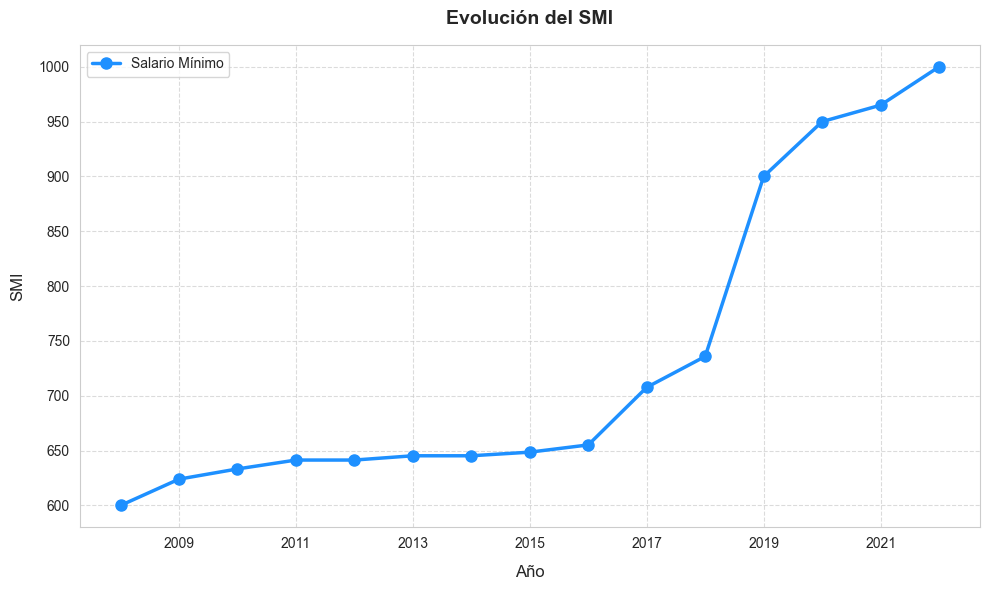

In [4]:
p.create_basic_plot(x=smi['periodo'], y=smi['smi_14'], xlabel="Año", ylabel="SMI", 
                    title="Evolución del SMI", xticks_rotation=0, style="whitegrid", 
                    color="dodgerblue", figsize=(10, 6))

La evolución del SMI nominal es bastante irregular, creciendo un 22.65% en 10 años y luego una cantidad muy similar (22.3%) en solo un año. Tengamos en cuenta que este SMI es en términos nominales y no tiene en cuenta la inflación, por ello es importante considerar el ipc dentro de la ecuación para obtener un resultado en relación de poder adquisitivo.

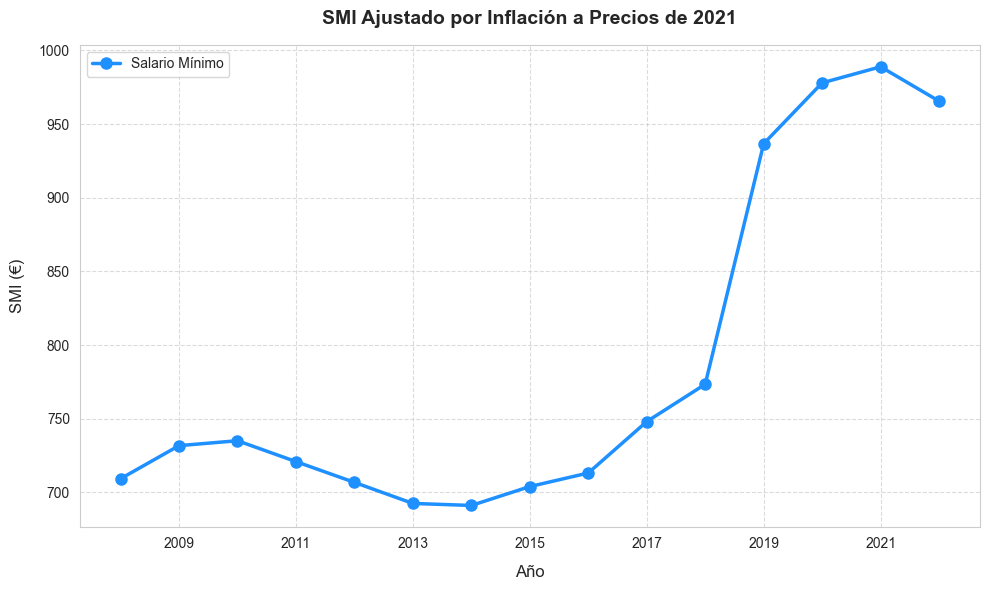

In [5]:
ipc = pd.read_csv("../../processed_data/gasto_ipc_ipri/ipc.csv")
ipc_nacional = ipc[(ipc['ccaa'] == "Nacional") & (ipc['grupo_indice'] == "Índice general")
                    & (ipc['tipo_dato'] == "Índice") & (ipc.mes==1) & (ipc.año>=2008)][['año', 'Total']]
smi = smi.merge(ipc_nacional, left_on = "periodo", right_on="año")
smi['smi_ajustado'] = smi['smi_14']/smi['Total']*100
p.create_basic_plot(x=smi['periodo'], y=smi['smi_ajustado'], xlabel="Año",
                     ylabel="SMI (€)", title="SMI Ajustado por Inflación a Precios de 2021",
                       xticks_rotation=0, style="whitegrid", color="dodgerblue", figsize=(10, 6))

Observamos ahora que la evolución del salario mínimo, pese a que conserva el gran incremento entre 2018 y 2019, tiene variaciones negativas en determinados años y la gamma de posibles incrementos que aporta es algo más amplia.

### IPC
<a id="IPC"></a>

El índice de precios de consumo (IPC) describe la evolución de los precios a lo largo del tiempo, tomando como base 100 un determinado año y calculando el resto de valores a partir de los incrementos que se producen año a año.


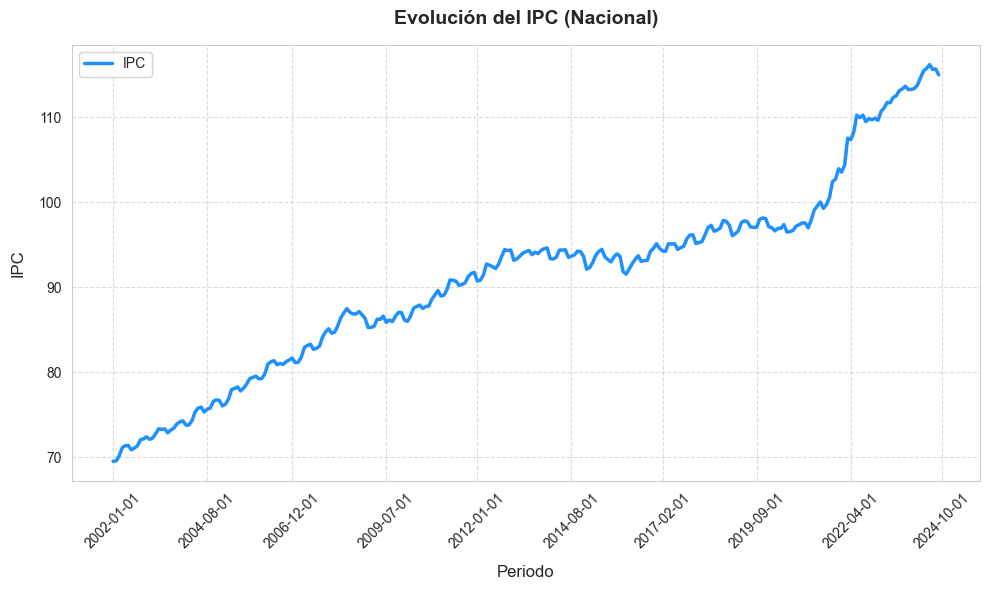

In [6]:
ipc_nacional_es = ipc[(ipc['ccaa'] == "Nacional") & 
                      (ipc['grupo_indice'] == "Índice general") & 
                      (ipc['tipo_dato'] == "Índice")][['periodo_fecha', 'Total']].sort_values('periodo_fecha', ascending = True)

p.create_basic_plot(ipc_nacional_es['periodo_fecha'], ipc_nacional_es['Total'], xlabel="Periodo", ylabel="IPC", 
                  title="Evolución del IPC (Nacional)", xticks_rotation=45,
                    style="whitegrid", color="dodgerblue", figsize=(10, 6),
                    marker = None , label = "IPC")

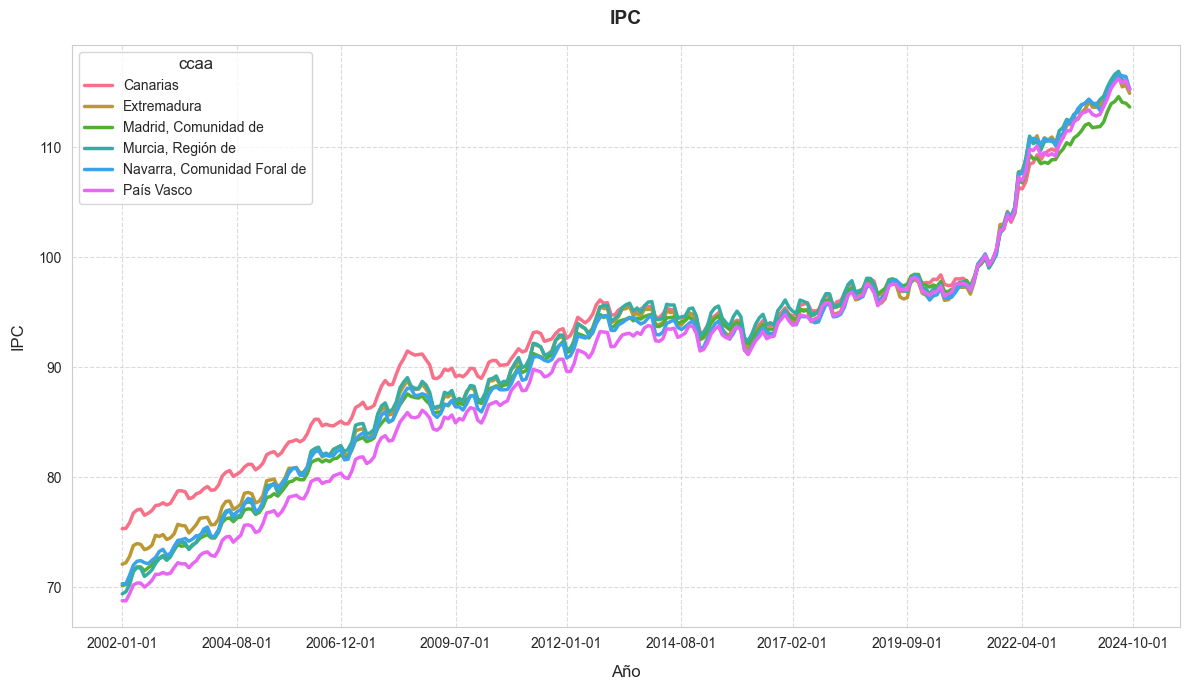

In [7]:
p.create_multi_category_plot(data = ipc[(ipc['ccaa'].isin(CCAA_mostrar)) & (ipc['tipo_dato'] == "Índice") & 
                                      (ipc["grupo_indice"] == "Índice general")].sort_values(['periodo_fecha', 'grupo_indice'],ascending=True),
                                        x_col="periodo_fecha", y_col="Total", category_col="ccaa", xlabel="Año", ylabel="IPC", 
                                        title="IPC", xticks_rotation=0, style="whitegrid", figsize=(12, 7))

Parece claro que la evolución se produce de manera conjunta, tanto en tendencia como en estacionalidad. Veamos cómo es la variación interanual.

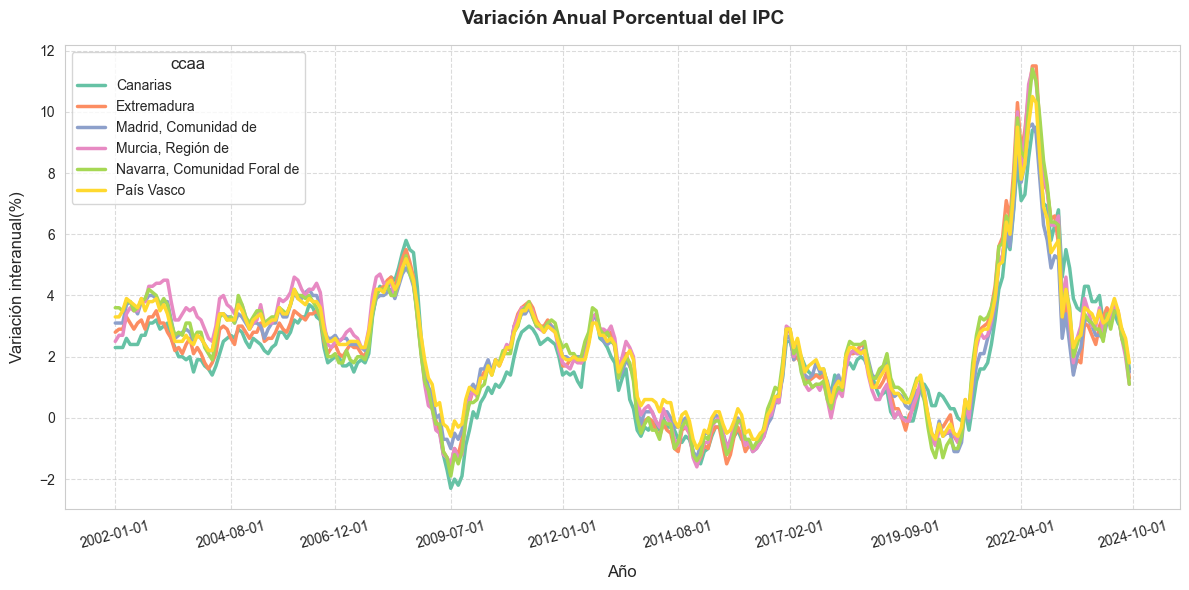

In [8]:
p.create_multi_category_plot(data = ipc[(ipc['ccaa'].isin(CCAA_mostrar)) & (ipc['tipo_dato'] == "Variación anual") & 
                                    (ipc["grupo_indice"] == "Índice general")].sort_values(['periodo_fecha', 'grupo_indice'], ascending=True), 
                                    x_col="periodo_fecha", y_col="Total", category_col="ccaa", xlabel="Año", ylabel="Variación interanual(%)", 
                                    title="Variación Anual Porcentual del IPC", style="whitegrid", palette="Set2", 
                                    figsize=(12, 6), xticks_rotation=15)

Se observa de manera clara que si bien en magnitud la variación puede diferir, el patrón es el mismo en todas las comunidades autónomas.

### Gasto Hogares
<a id="gasto_hogares"></a>

La *Encuesta de Presupuestos Familiares* del INE nos permite obtener información sobre el gasto medio por hogar y por familiar. Esto puede ser de gran utilidad, pues a diferencia del IPC por comunidad autónoma, que tiene un valor fijado en su respectivo territorio en un periodo dado, el gasto por hogar nos permite hacernos una idea de la variación de costes de vida entre las diferentes regiones del territorio Nacional.

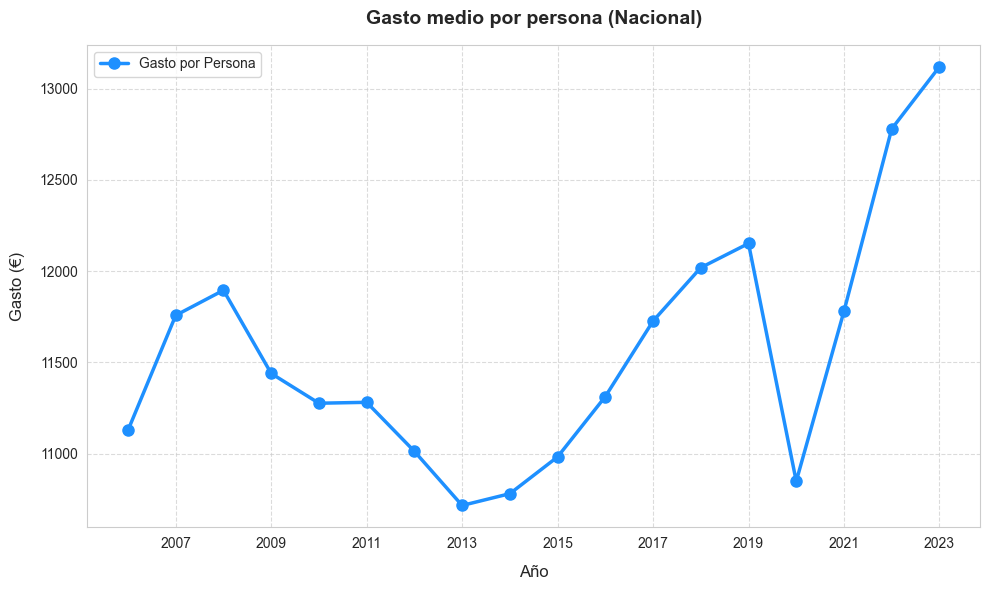

In [9]:
gasto_hogares = pd.read_csv("../../processed_data/gasto_ipc_ipri/gasto_hogar.csv")
gasto_persona = gasto_hogares[(gasto_hogares['grupo_gasto'] == "Índice general") & 
                              (gasto_hogares['tipo_gasto'] == "Gasto medio por persona") & 
                              (gasto_hogares['tipo_dato'] == "Dato base")]
gasto_persona_nacional = gasto_hogares[(gasto_hogares['ccaa'] == "Total Nacional") & 
                                       (gasto_hogares['tipo_dato'] == "Dato base") & 
                                       (gasto_hogares['grupo_gasto'] == "Índice general") & 
                                       (gasto_hogares['tipo_gasto'] == "Gasto medio por persona")][['periodo', 'Total']]
p.create_basic_plot(gasto_persona_nacional['periodo'], gasto_persona_nacional['Total'], xlabel="Año", ylabel="Gasto (€)", 
                  title="Gasto medio por persona (Nacional)", xticks_rotation=0, style="whitegrid", color="dodgerblue", 
                  figsize=(10, 6), label="Gasto por Persona")

El gasto total varía bastante a lo largo de los años, sufriendo una gran caída en 2020 por la pandemia y posteriorment un gran rebote, ya que se produjo un gran incremento del consumo. Es importante tener en cuenta que el gasto agregado, al tener incluidos gastos no necesarios para la subsistencia del individuo, no es tan indicativo del coste de vida en el país o en una determinada region.


Para tener un mejor entendimiento a este respecto, podemos focalizarnos en gastos específicos como alimentos, bebidas no alcohólicas, vivienda, gas, electricidad, agua y combustibles, que englobaremos bajo el manto de "gastos básicos".

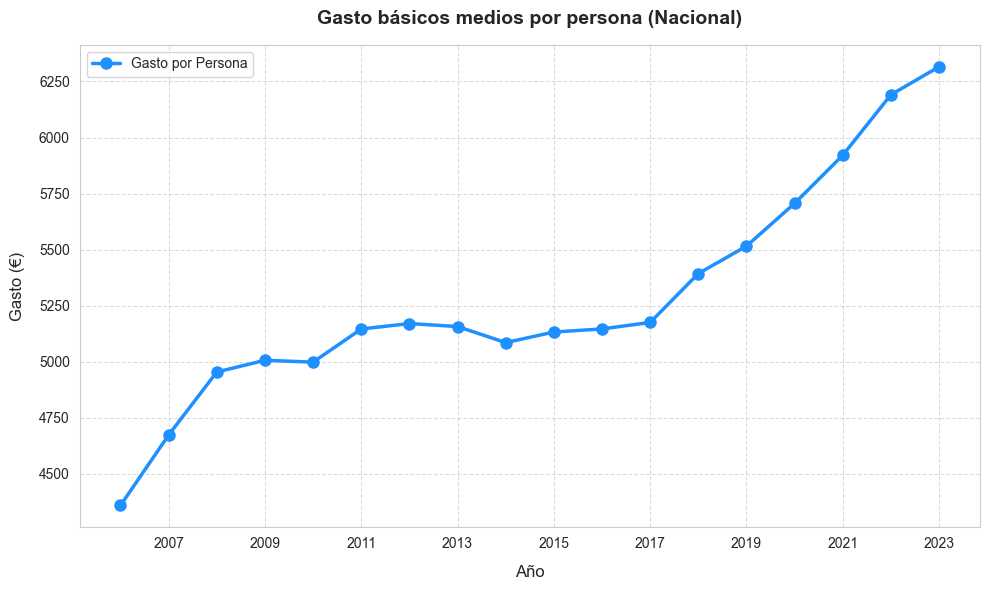

In [10]:
gastos_basicos = ['01 Alimentos y bebidas no alcohólicas',
                   '04 Vivienda, agua, electricidad, gas y otros combustibles']

gasto_basico = gasto_hogares[(gasto_hogares['tipo_gasto'] == "Gasto medio por persona") & 
                             (gasto_hogares['tipo_dato'] == "Dato base") & 
                             gasto_hogares.grupo_gasto.isin(gastos_basicos)].groupby(["ccaa", "periodo"], as_index=False).sum(numeric_only=True)
gasto_basico_nacional = gasto_basico[gasto_basico['ccaa'] == "Total Nacional"]
p.create_basic_plot(gasto_basico_nacional['periodo'], gasto_basico_nacional['Total'], xlabel="Año", 
                  ylabel="Gasto (€)", title="Gasto básicos medios por persona (Nacional)", 
                  xticks_rotation=0, style="whitegrid", color="dodgerblue", figsize=(10, 6), 
                  label="Gasto por Persona")

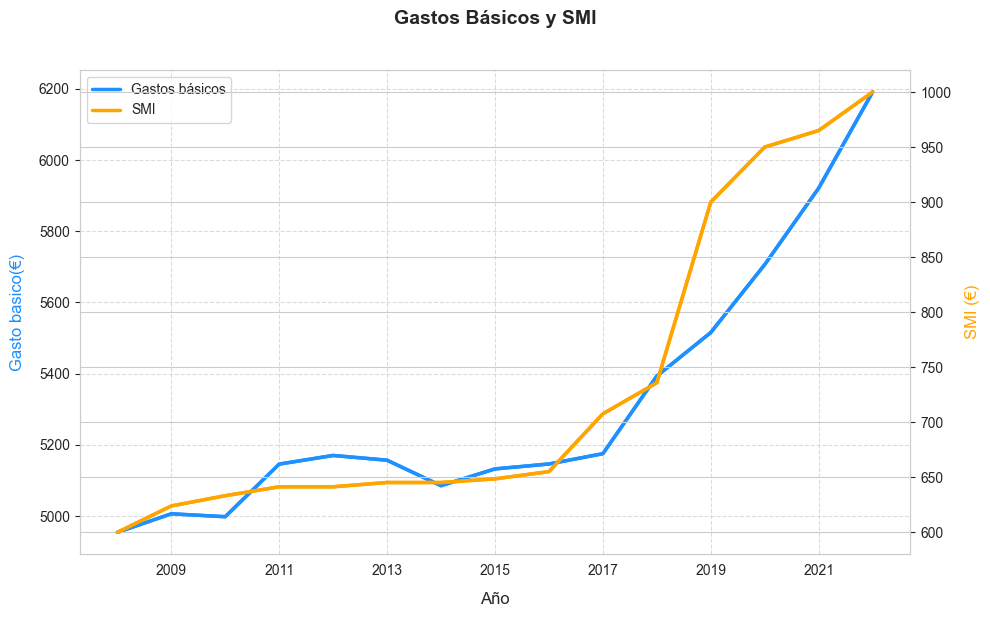

In [11]:
gasto_basico_nacional_smi = gasto_basico_nacional.rename(columns={'Total': 'gasto_basico'}).merge(smi, how='right', on="periodo")
p.create_dual_plot(gasto_basico_nacional_smi['periodo'], gasto_basico_nacional_smi['gasto_basico'], 
                 gasto_basico_nacional_smi['smi_14'], xlabel="Año", ylabel1="Gasto basico(€)", 
                 ylabel2="SMI (€)" ,label1= "Gastos básicos", label2="SMI", title="Gastos Básicos y SMI", 
                 xticks_rotation=0, style="whitegrid", figsize=(10, 6), marker1=None, marker2=None, 
                 secondary_y=True)

Vemos que ahora el gasto tiene una evolución algo menos volátil y de hecho sigue una evolución bastante más parecida al IPC general y también tiene una clara correlación con el SMI, aunque dada la baja proporción de trabajadores que percibe el salario mínimo, no necesariamente hablamos de una relación causal. Veamos ahora las diferencias entre comunidades autónomas.

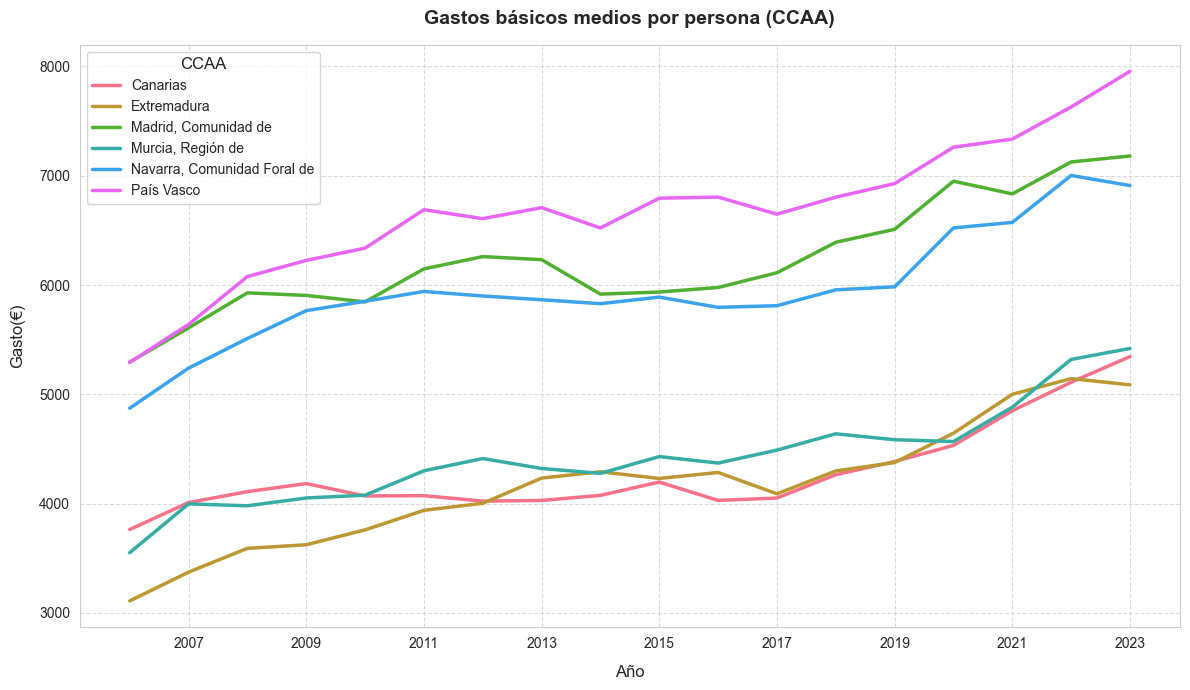

In [12]:
gasto_basico_ccaa = gasto_basico[(gasto_basico['ccaa'].isin(CCAA_mostrar))].groupby(['periodo','ccaa'], as_index=False).sum(numeric_only=True)
p.create_multi_category_plot(data = gasto_basico_ccaa, x_col="periodo", y_col="Total", label = "CCAA",category_col="ccaa", 
                           xlabel="Año", ylabel="Gasto(€)", title="Gastos básicos medios por persona (CCAA)", 
                           xticks_rotation=0, style="whitegrid", figsize=(12, 7))

La tendencia pese a ser general presenta variaciones mensuales relevantes, así como diferencias notables entre las comunidades autónomas y el gasto por persona que tiene cada una, encontrándonos diferencias superiores al 50%. Estos valores los usaremos más adelante en este análisis para crear ratios útiles que nos permitan entender el poder real de compra que que tiene el salario mínimo en las diferentes regiones.

### Salarios
<a id="Salarios"></a>

Los salarios son necesarios para entender la coyuntura de cada territorio, por lo que es importante estudiar cómo han variado con el tiempo y así poder identificar posibles grupos afectados por el salario mínimo.

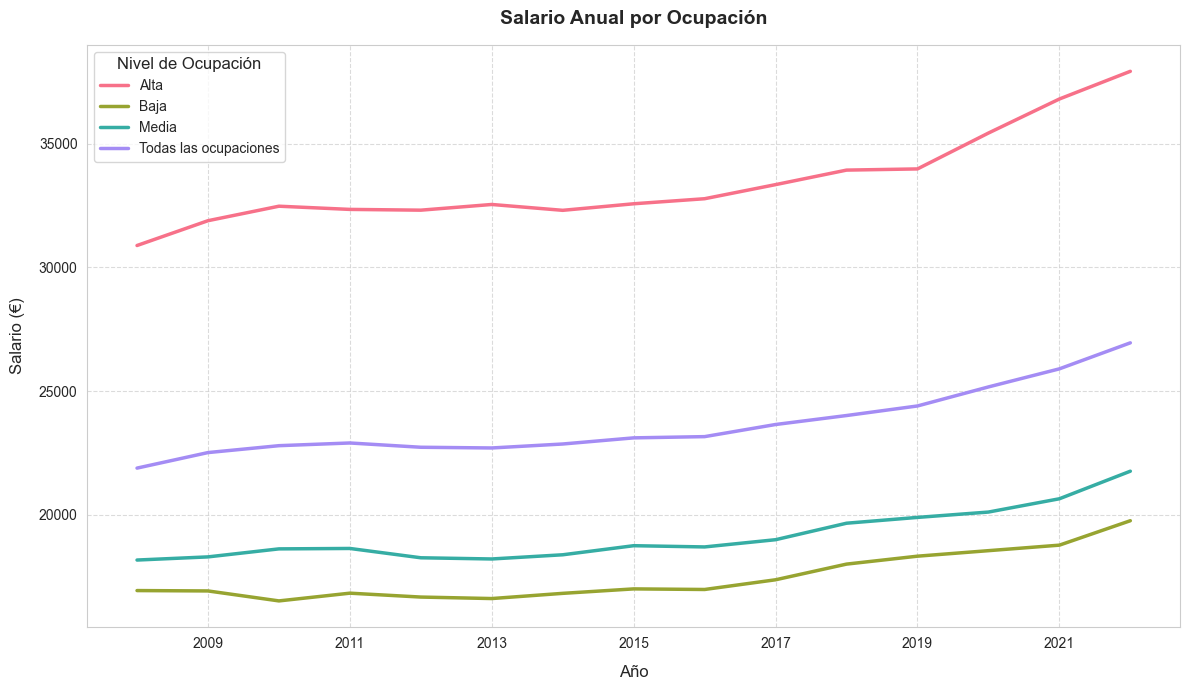

In [13]:
salarios_ocupacion = pd.read_csv("../../processed_data/salarios/ocupacion.csv")
salarios_ocupacion_nacional = salarios_ocupacion[(salarios_ocupacion['ccaa'] == "Total Nacional") & 
                                                 (salarios_ocupacion['sexo'] == "Ambos sexos")]
p.create_multi_category_plot(salarios_ocupacion_nacional, "periodo", "salario_año", "ocupacion",
                            xlabel="Año", ylabel="Salario (€)",label="Nivel de Ocupación" ,
                            xticks_rotation=0, style="whitegrid", figsize=(12, 7),
                            title= "Salario Anual por Ocupación")

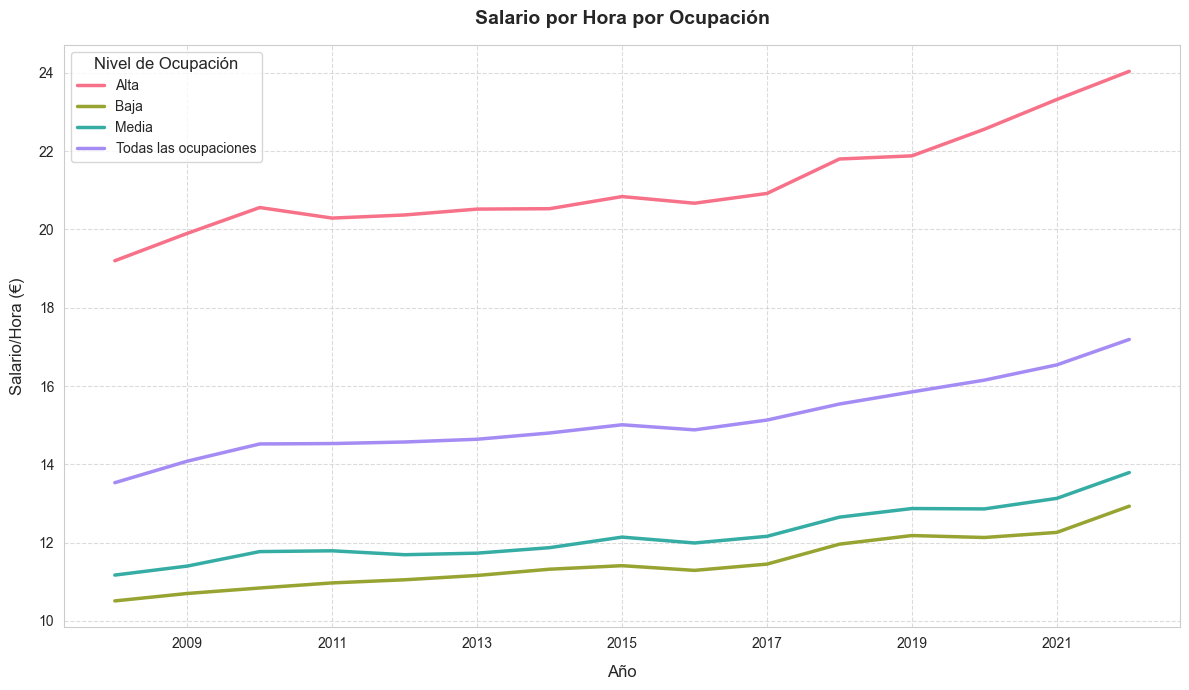

In [14]:
p.create_multi_category_plot(salarios_ocupacion_nacional, "periodo", "salario_hora", 
                           "ocupacion", xlabel="Año", ylabel="Salario/Hora (€)",label="Nivel de Ocupación" ,
                           xticks_rotation=0, style="whitegrid", figsize=(12, 7), title= "Salario por Hora por Ocupación")

Observamos que no hay una diferencia particular en términos de crecimiento salarial, lo que a priori puede indicar que no hay ningún grupo especialmente afectado por el salario mínimo. Veamos como evoluciona el salario de la ocupación más baja respecto al SMI.

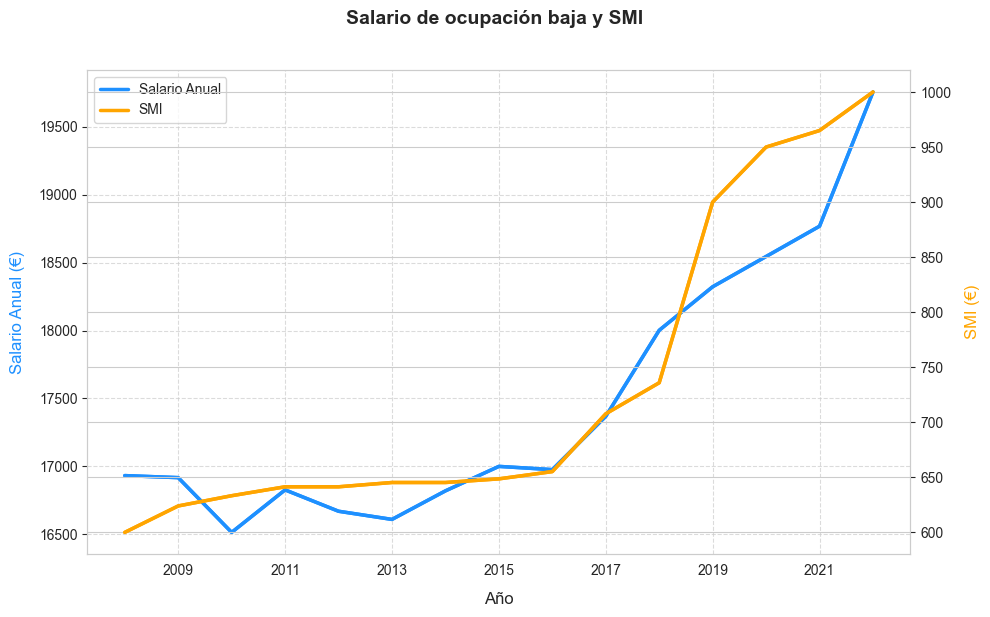

In [15]:
salario_oc_nacional_baja_smi = salarios_ocupacion_nacional[salarios_ocupacion_nacional['ocupacion'] == "Baja"].merge(smi, how="left", on="periodo")
p.create_dual_plot(salario_oc_nacional_baja_smi['periodo'], salario_oc_nacional_baja_smi['salario_año'], salario_oc_nacional_baja_smi['smi_14'], 
                 xlabel="Año", ylabel1="Salario Anual (€)", ylabel2="SMI (€)" ,label1= "Salario Anual", label2="SMI", title="Salario de ocupación baja y SMI",
                 xticks_rotation=0, style="whitegrid", figsize=(10, 6), marker1=None, marker2=None, secondary_y=True)

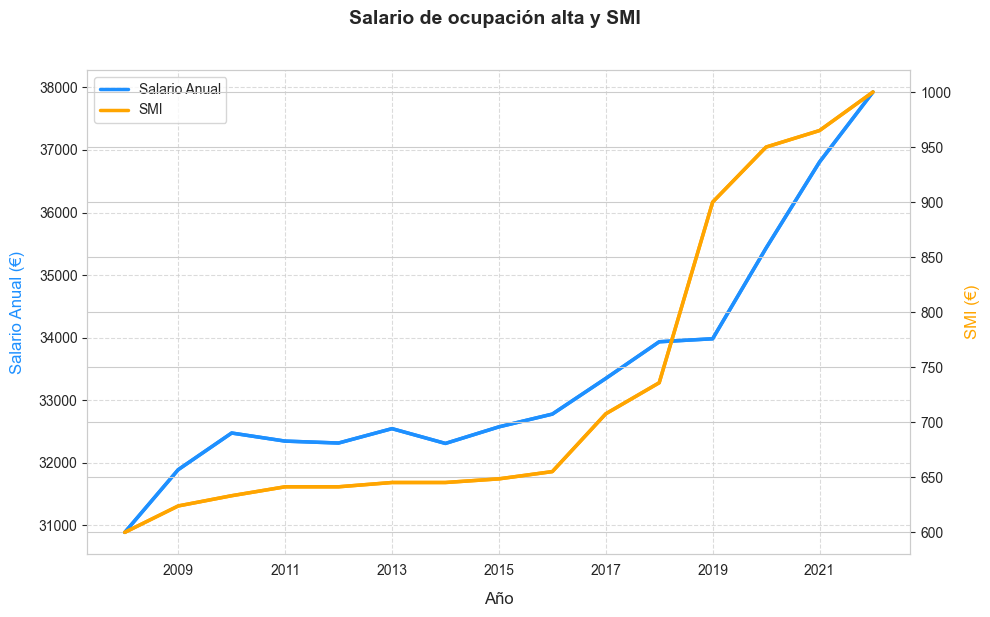

In [16]:
salario_oc_nacional_alta_smi = salarios_ocupacion_nacional[salarios_ocupacion_nacional['ocupacion'] == "Alta"].merge(smi, how="left", on="periodo")
p.create_dual_plot(salario_oc_nacional_alta_smi['periodo'], salario_oc_nacional_alta_smi['salario_año'], salario_oc_nacional_alta_smi['smi_14'], 
                 xlabel="Año", ylabel1="Salario Anual (€)", ylabel2="SMI (€)" ,label1= "Salario Anual", label2="SMI", title="Salario de ocupación alta y SMI",
                 xticks_rotation=0, style="whitegrid", figsize=(10, 6), marker1=None, marker2=None, secondary_y=True )

Aunque la evolución del salario de ocupacion baja parezca correlacionado con el salario mínimo, también lo parece así el de la ocupación alta, lo que puede descartar una causalidad. No obstante, hemos de tener en cuenta que las ocupaciones bajas corresponden a puestos que serán en general menos productivos y cuya productividad también crecerá en general más despacio, por lo que es posible que el crecimiento de los salarios en en sectores de nivel de ocupación alta vaya más relacionado con la productividad y la de la ocupación baja más relacionado con el movimiento del salario mínimo.

También es importante tener en cuenta que a nivel político la propuesta de subida del salario mínimo gira en torno a llegar al 60% del salario medio, lo que implica algo de causalidad entre el nivel de salarios y la subida de salarios mínimos a realizar, si bien es cierto que al depender esta medida más de cuestiones políticas que de cuestiones económicas es precipitado dar por supuesta esta relación.

Veamos también cómo evoluciona el salario de las ocupaciones bajas en las comunidades autónomas que hemos mostrado antes:

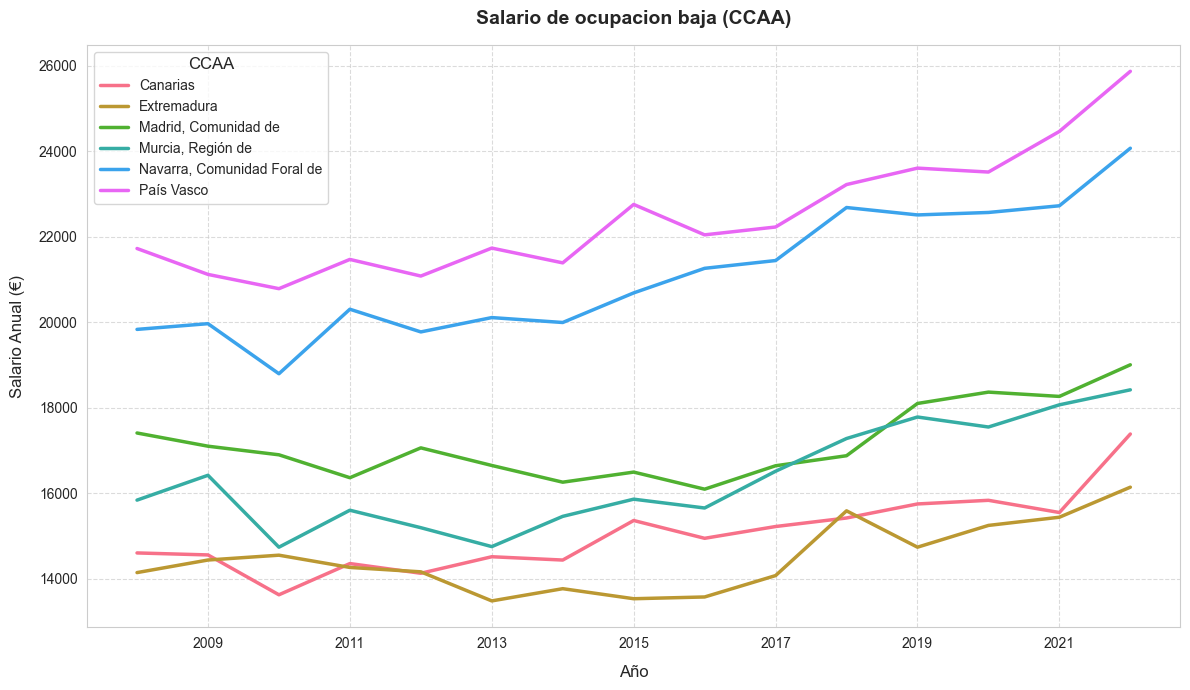

In [17]:
salarios_ocupacion_ccaa = salarios_ocupacion[(salarios_ocupacion['ccaa'] != "Total Nacional") &
                                              (salarios_ocupacion['sexo'] == "Ambos sexos")]
salarios_oc_baja_ccaa = salarios_ocupacion_ccaa[(salarios_ocupacion_ccaa['ocupacion'] == "Baja") & 
                                                (salarios_ocupacion_ccaa['ccaa'].isin(CCAA_mostrar))]
p.create_multi_category_plot(data = salarios_oc_baja_ccaa, x_col="periodo", y_col="salario_año", label = "CCAA",
                           category_col="ccaa", xlabel="Año", ylabel="Salario Anual (€)", title="Salario de ocupacion baja (CCAA)", 
                           xticks_rotation=0, style="whitegrid", figsize=(12, 7))

Es interesante observar que en País Vasco y Navarra los salarios están en constante creciemiento, mientras que para las otras comunidades mostradas la tendencia es relativamente plana hasta 2015, a partir de cuando se empieza a ver un crecimiento más sólido, coincidiendo con el comienzo de los incrementos del salario mínmo más fuertes, lo que nos indica que no todas las comunidades autónomas siguen una correlación similar.

Es importante que de 2018 a 2019 (donde se produjo el mayor incremento de salario mínimo hasta la fecha) no necesariamente tenemos que ver un gran incremento del salario, puesto que una reducción del número de horas trabajadas amortiguaría el incremento.

Es interesante también, para enconctrar posibles grupos afectados, estudiar la evolución de los salarios en función de la jornada y del contrato.

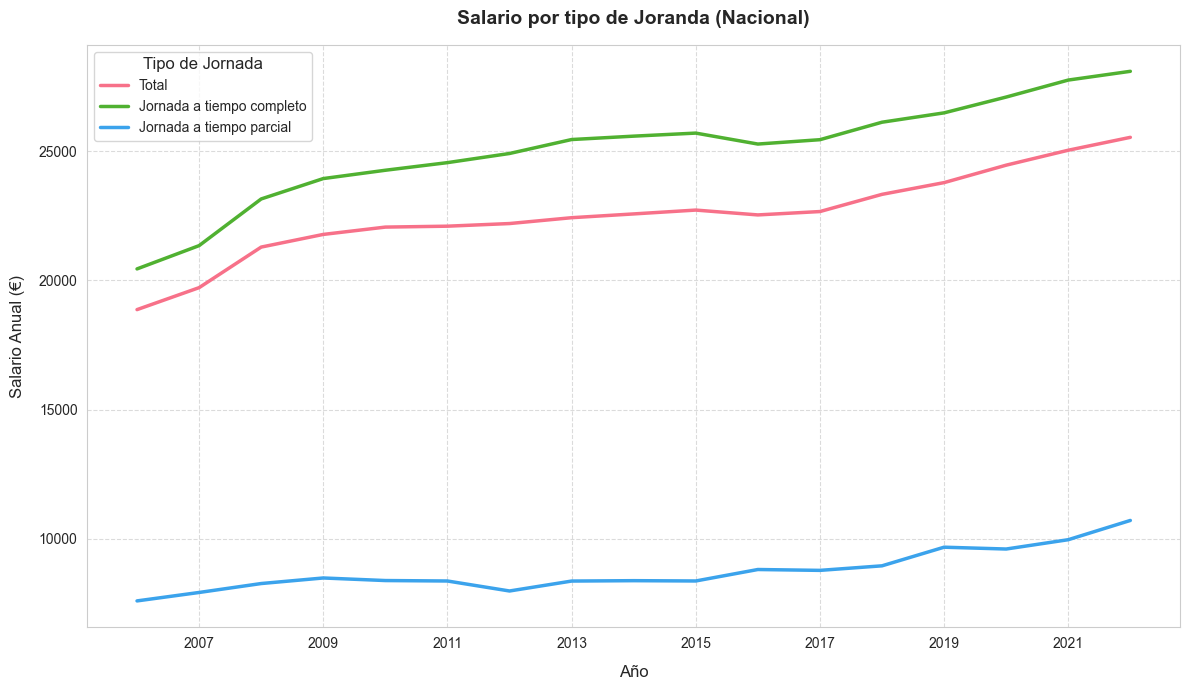

In [18]:
salarios_jornada = pd.read_csv("../../processed_data/salarios/jornada.csv")
salarios_jornada["salario_año"] = salarios_jornada['salario_mes']*12
salarios_jornada_nacional = salarios_jornada[(salarios_jornada['ccaa'] == "Total Nacional") 
                                             & (salarios_jornada['decil'] == "Total decil")]
p.create_multi_category_plot(data = salarios_jornada_nacional, x_col="periodo", y_col="salario_año", 
                           label = "Tipo de Jornada",category_col="jornada", xlabel="Año", ylabel="Salario Anual (€)", 
                           title="Salario por tipo de Joranda (Nacional)", xticks_rotation=0, style="whitegrid", 
                           figsize=(12, 7))

De nuevo se puede extraer una conclusión similar a la que comentábamos previamente, atendiendo a que el crecimiento de los sueldos se empieza a notar después de 2015 para los trabajadores a jornada parcial. Veamos si se puede apreciar algo por sector.

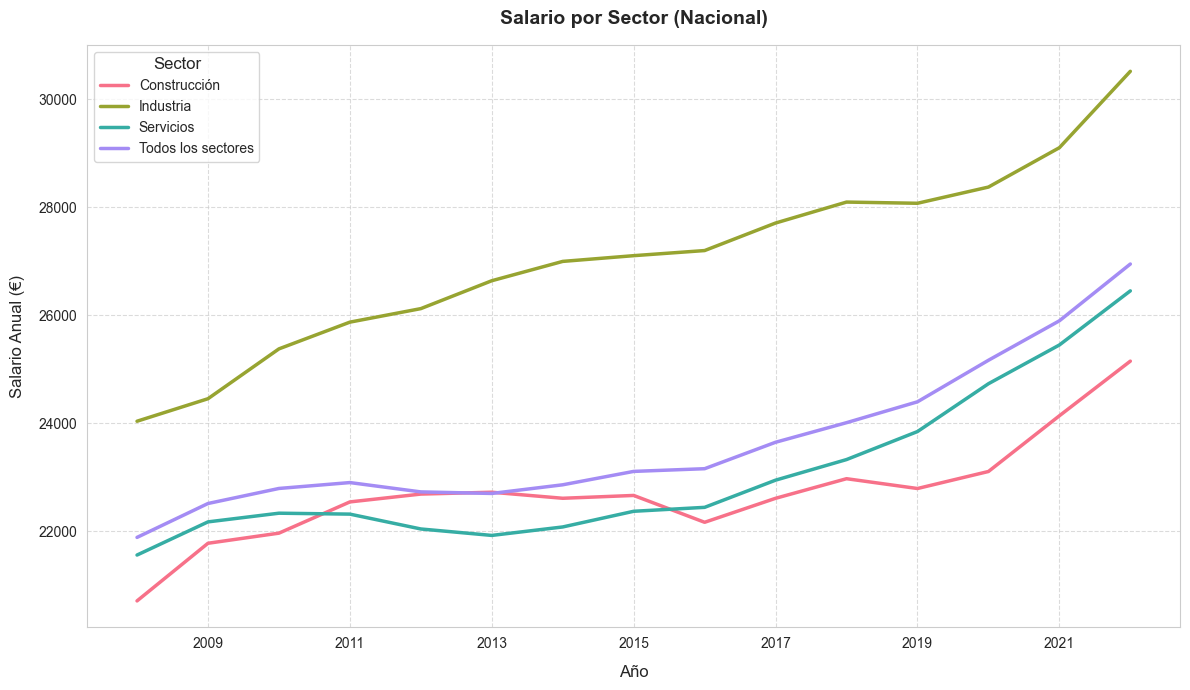

In [19]:
salarios_sector = pd.read_csv("../../processed_data/salarios/sector.csv")
salarios_sector_nacional = salarios_sector[(salarios_sector['ccaa'] == "Total Nacional") 
                                             & (salarios_sector['sexo'] == "Ambos sexos")]
p.create_multi_category_plot(data = salarios_sector_nacional, x_col="periodo", y_col="salario_año", 
                           label = "Sector",category_col="sector", xlabel="Año", ylabel="Salario Anual (€)", 
                           title="Salario por Sector (Nacional)", xticks_rotation=0, style="whitegrid", 
                           figsize=(12, 7))

De nuevo, observamos que los conjuntos de salarios más bajos empiezan a tener un crecimiento sostenido tras 2015, mientras que en sectores mejor pagados como la industria el crecimiento es más continuado en todo el periodo analizado.

Aprovechando la información de la agencia tributaria, podemos echar un vistazo a la evolución de los salarios comprendidos entre un número de SMIs dados.

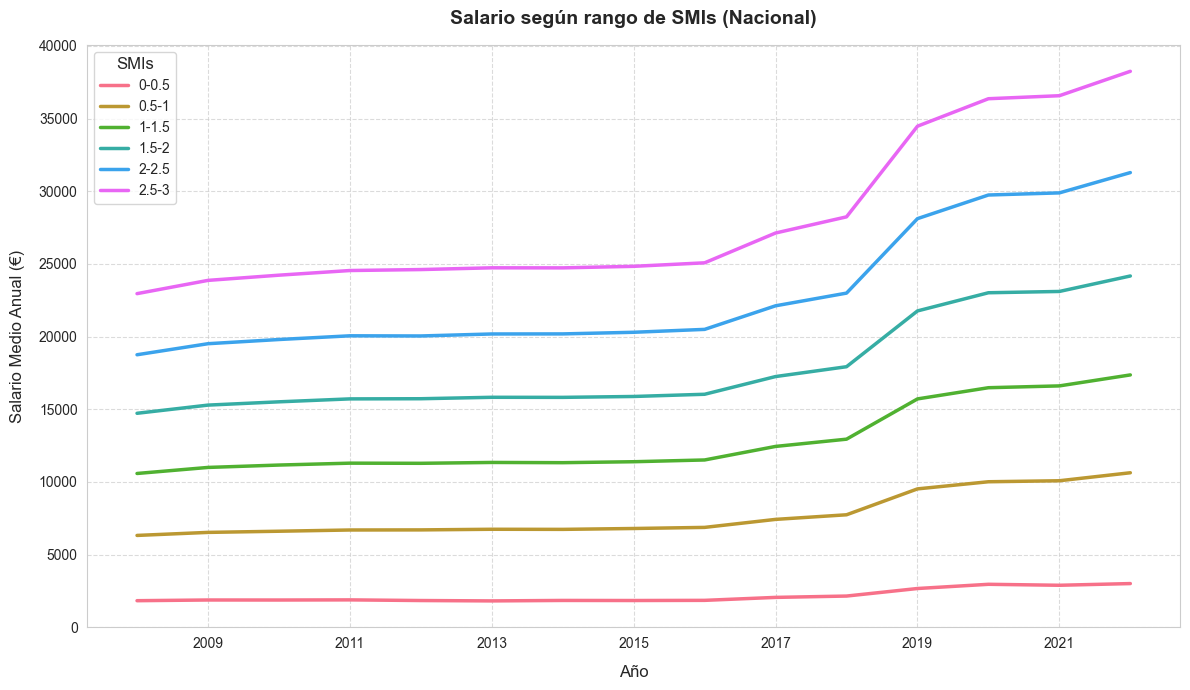

In [20]:
salarios_smis = pd.read_csv("../../processed_data/salarios/salarios_smis_aeat.csv")
smis_to_plot = ['0-0.5', '0.5-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3']
salarios_smis_nacional = salarios_smis[(salarios_smis['ccaa'] == "Total") & 
                                       (salarios_smis['smi'].isin(smis_to_plot))]
p.create_multi_category_plot(data = salarios_smis_nacional, x_col="periodo", y_col="sma", 
                           label = "SMIs",category_col="smi", xlabel="Año", ylabel="Salario Medio Anual (€)", 
                           title="Salario según rango de SMIs (Nacional)", xticks_rotation=0, 
                           style="whitegrid", figsize=(12, 7))

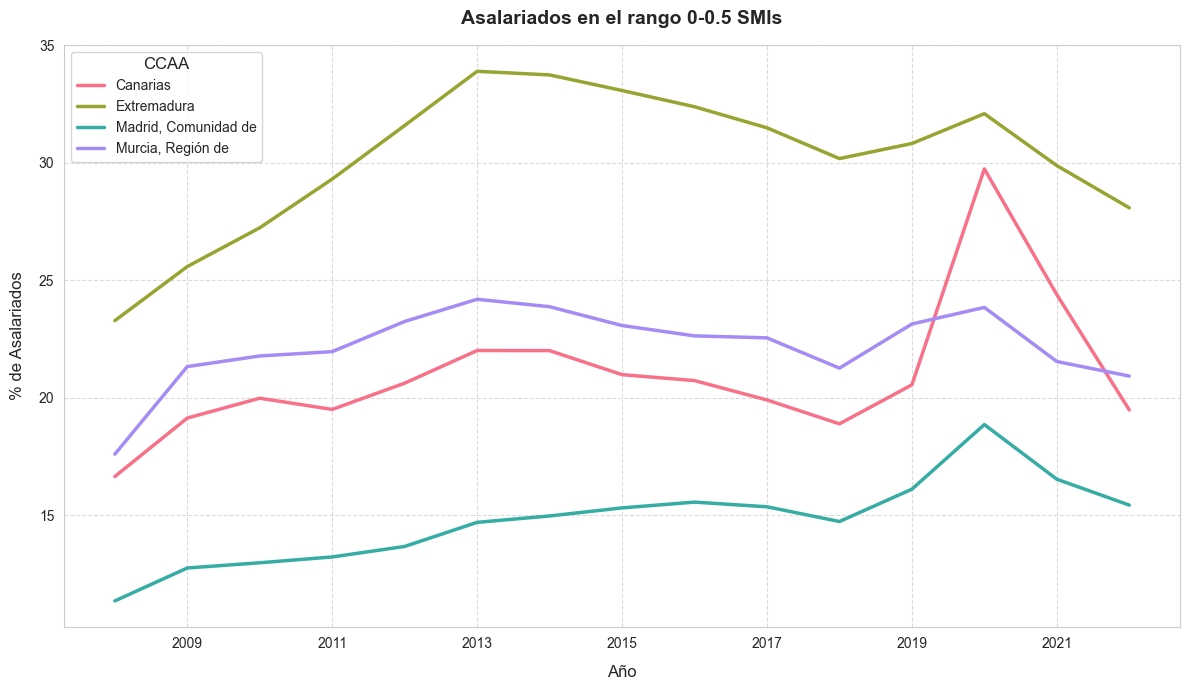

In [21]:
smis_to_plot = ['0-0.5']
salarios_smis_ccaa = salarios_smis[(salarios_smis['ccaa'].isin(CCAA_mostrar)) & 
                                   (salarios_smis['smi'].isin(smis_to_plot))]
salarios_smis_ccaa_total = salarios_smis[(salarios_smis['ccaa'].isin(CCAA_mostrar)) & 
                                         (salarios_smis['smi']=="Total")].rename(columns={'asalariados': 'asalariados_total'})
salarios_smis_ccaa = salarios_smis_ccaa.merge(salarios_smis_ccaa_total, 
                                              how="left", on=["periodo", "ccaa"])
salarios_smis_ccaa['prop_0_05'] = salarios_smis_ccaa['asalariados']/salarios_smis_ccaa['asalariados_total']*100

p.create_multi_category_plot(data = salarios_smis_ccaa, x_col="periodo", y_col="prop_0_05", label = "CCAA",
                           category_col="ccaa", xlabel="Año", 
                           ylabel="% de Asalariados", title="Asalariados en el rango 0-0.5 SMIs", 
                           xticks_rotation=0, style="whitegrid", figsize=(12, 7))

Como era esperado, la evolución es igual en todos los estratos, ya que a medida que aumenta el salario mínimo por definición el salario medio de un rango en salarios mínimos subirán. En lo que respecta a las comunidades autónoma se aprecian diferencias nada despreciables en el porcentaje de trabajadores que cobran en cierto rango de salarios mínimos.

Esta variable tiene algo de limitaciones, pues no contiene información de País Vasco y Navarra debido a su régimen particular, pero nos aporta información muy útil de los posibles afectados por la subida del salario mínimo.

### Empleos
<a id="Empleos"></a>

El número de ocupados es otra de las métricas que puede ser afectadas por un incremento del salario mínimo, por lo que es importante estudiar el cambio de estos en el tiempo.

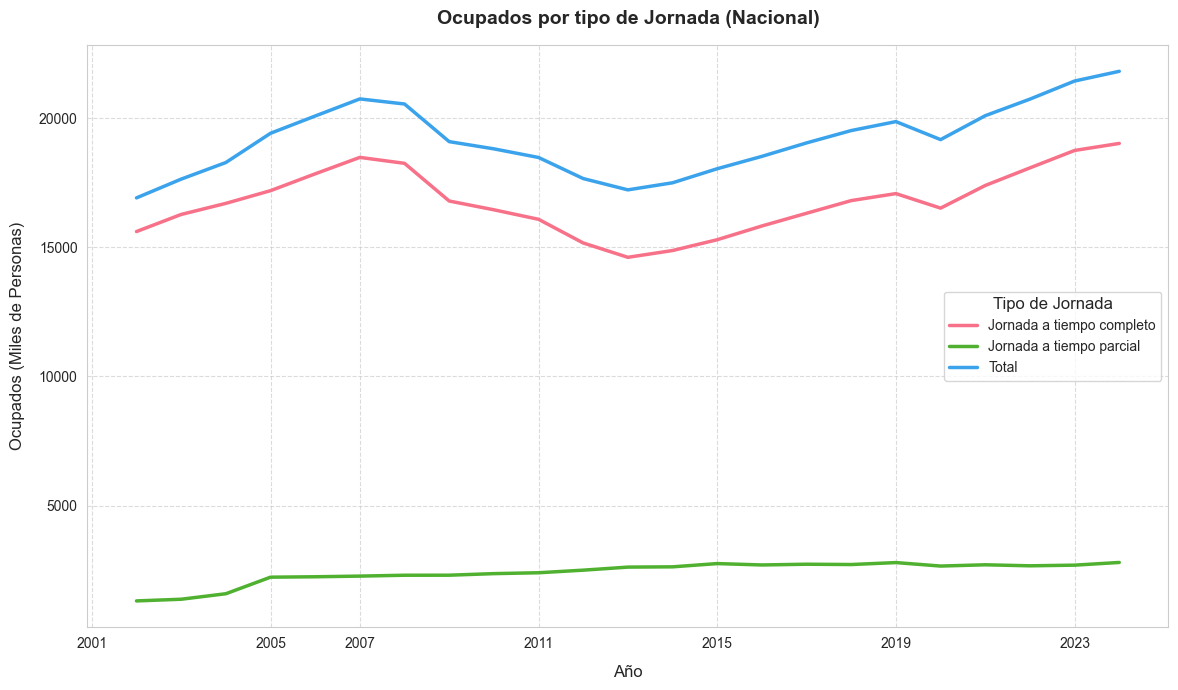

In [22]:
ocupados_jornada = pd.read_csv("../../processed_data/trabajo/ocupados_jornada.csv")
#Agrupamos por año haciendo la media
ocupados_jornada = ocupados_jornada.groupby(['sexo', 'ccaa', 'tipo_jornada', 'unidad', 'periodo'], as_index=False).mean(numeric_only=True)
ocupados_jornada_nacional = ocupados_jornada[(ocupados_jornada['ccaa'] == "Total Nacional") & (ocupados_jornada['sexo'] == "Ambos sexos")
                                             & (ocupados_jornada['unidad'] == "Valor absoluto")]
p.create_multi_category_plot(data = ocupados_jornada_nacional, x_col="periodo", y_col="Total", 
                           label = "Tipo de Jornada",category_col="tipo_jornada", xlabel="Año", 
                           ylabel="Ocupados (Miles de Personas)", title="Ocupados por tipo de Jornada (Nacional)", 
                           xticks_rotation=0, style="whitegrid", figsize=(12, 7))

Se aprecia de manera clara que el número de ocupados crece especialmente en tiempo completo, siendo el crecimiento del trabajo a tiempo parcial algo más residual en el tiempo, si bien es cierto qu elos porcentajes de cada uno sobre el total tienen una mayor variación. Veamos cómo evoluciona el porcentaje de ocupados a tiempo parcial dentro de cada comunidad autónoma.

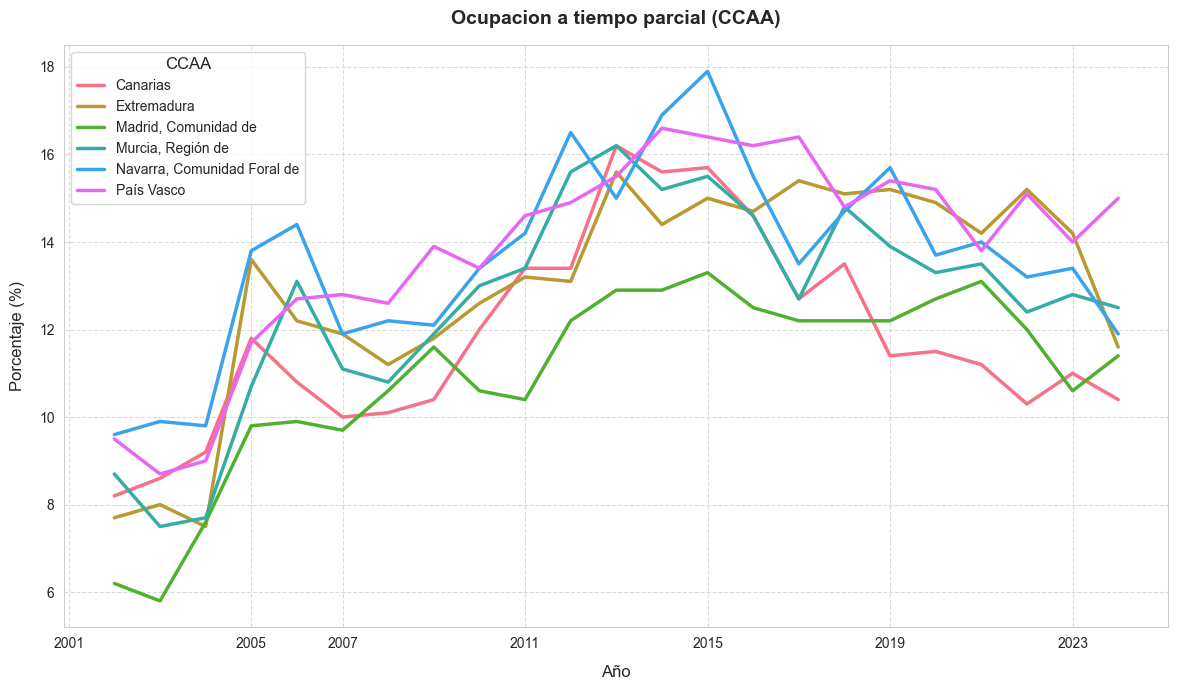

In [23]:
ocupados_jornada_ccaa = ocupados_jornada[(ocupados_jornada['ccaa'].isin(CCAA_mostrar)) & 
                                         (ocupados_jornada['sexo'] == "Ambos sexos")
                                             & (ocupados_jornada['unidad'] == "Porcentaje") & 
                                             (ocupados_jornada['tipo_jornada'] == "Jornada a tiempo parcial")]
p.create_multi_category_plot(data = ocupados_jornada_ccaa, x_col="periodo", y_col="Total", label = "CCAA",
                           category_col="ccaa", xlabel="Año", ylabel="Porcentaje (%)", 
                           title="Ocupacion a tiempo parcial (CCAA)", xticks_rotation=0,
                           style="whitegrid", figsize=(12, 7))

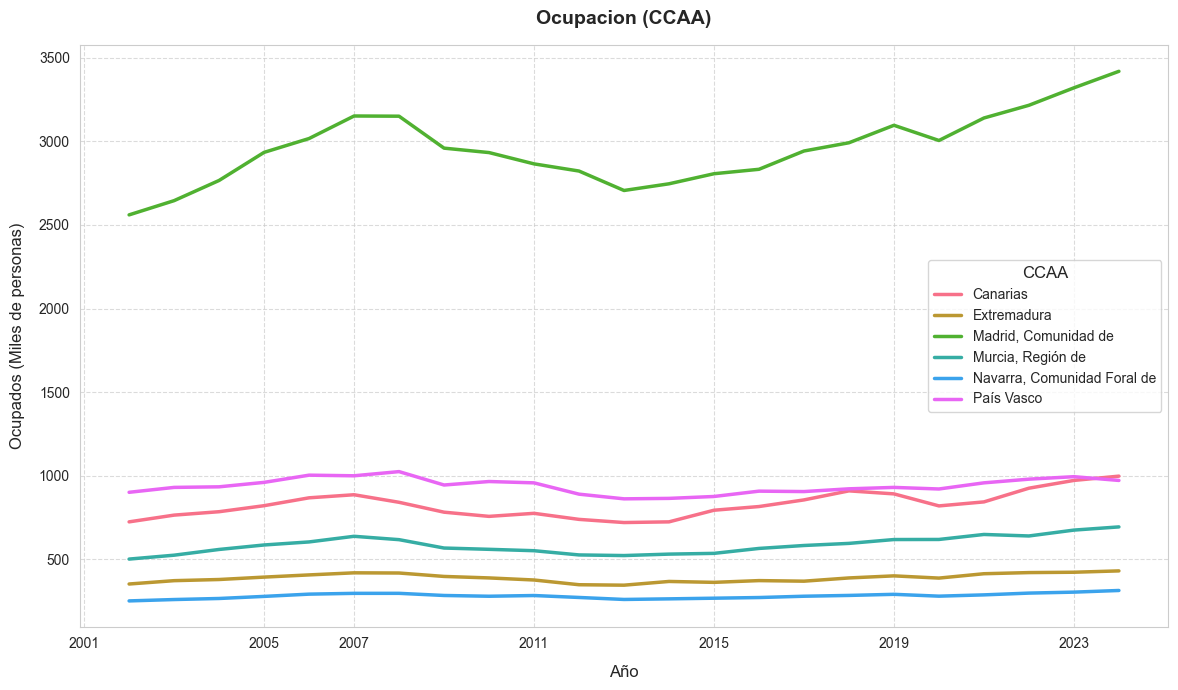

In [24]:
ocupados_jornada_ccaa = ocupados_jornada[(ocupados_jornada['ccaa'].isin(CCAA_mostrar)) & 
                                         (ocupados_jornada['sexo'] == "Ambos sexos") & 
                                         (ocupados_jornada['unidad'] == "Valor absoluto") & 
                                         (ocupados_jornada['tipo_jornada'] == "Total")]
p.create_multi_category_plot(data = ocupados_jornada_ccaa, x_col="periodo", y_col="Total", label = "CCAA",
                           category_col="ccaa", xlabel="Año", ylabel="Ocupados (Miles de personas)", 
                           title="Ocupacion (CCAA)", xticks_rotation=0, style="whitegrid", 
                           figsize=(12, 7))

De nuevo, la tendencia es conjunta, pero la diferencia entre comunidades autónomas es notable. En los años de mayores subida del salario mínimo no se observa a priori ninguna variación que nos pueda indicar un impacto del salario mínimo en dichos años. El número total de ocupados tampoco parece indicarnos nada concreto.

### PIB
<a id="PIB"></a>

El producto interior bruto (PIB), aparte de ser un buen indicador del tamaño de la región, es útil para determinar la riqueza de dicha región al dividirlo entre su número de habitantes (lo que sería el PIB per cápita).

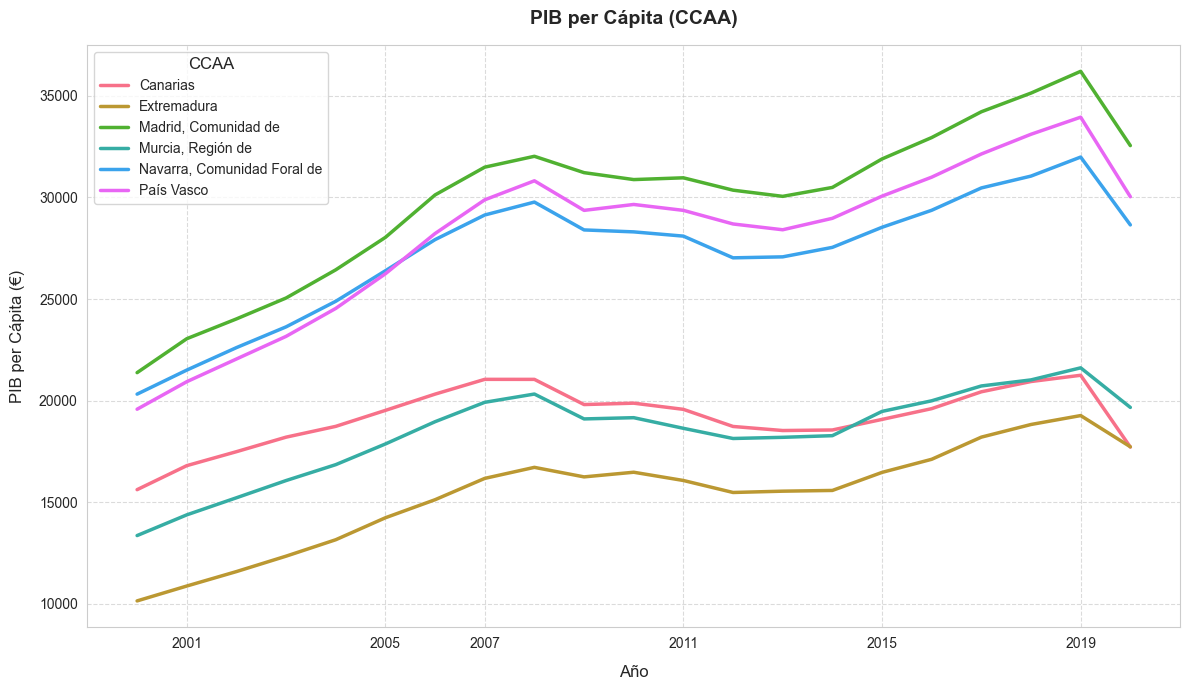

In [25]:
pib_abs = pd.read_csv("../../processed_data/pib/pib_abs.csv")
pib_per_capita = pd.read_csv("../../processed_data/pib/pib_per_capita.csv")
pib_per_capita_ccaa = pib_per_capita[pib_per_capita['ccaa'].isin(CCAA_mostrar) & 
                                     (pib_per_capita['tipo_dato'] == "Valor")]
p.create_multi_category_plot(data = pib_per_capita_ccaa, x_col="periodo", y_col="valor", label = "CCAA",
                           category_col="ccaa", xlabel="Año", ylabel="PIB per Cápita (€)", title="PIB per Cápita (CCAA)", 
                           xticks_rotation=0, style="whitegrid", figsize=(12, 7))

Observamos que las diferencias entre comunidades autónomas no son nada despreciables, pues Madrid dobla a lo largo de todo el periodo el PIB per capita de extremadura. Así mismo se ve además que el crecimiento de estas regiones más pobres es claramente inferior.

### Paro
<a id="Paro"></a>

El paro nos indica el número de personas que no tienen empleo pero que estás buscando empleo activamente. Esta variable es de utilidad, pues variaciones en el paro pueden ser un buen predictor que acompañe al salario mínimo así como un buen resultado a estudiar a consecuencia de un incremento del SMI.

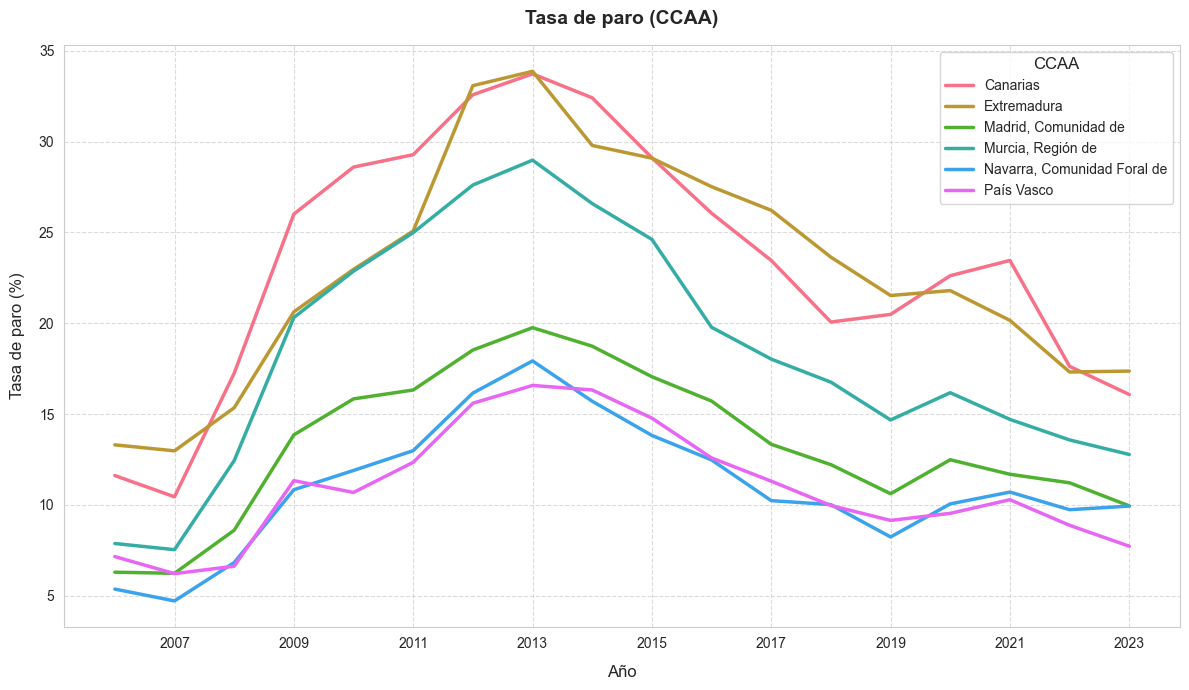

In [26]:
paro = pd.read_csv("../../processed_data/paro/parados.csv")
paro_ccaa = paro[(paro['ccaa'].isin(CCAA_mostrar)) & 
                 (paro['sexo'] == "Ambos sexos") & 
                 (paro['edad'] == "Total")]
p.create_multi_category_plot(data = paro_ccaa, x_col="periodo", y_col="tasa_paro_total", 
                           label = "CCAA",category_col="ccaa", xlabel="Año", ylabel="Tasa de paro (%)", 
                           title="Tasa de paro (CCAA)", xticks_rotation=0, style="whitegrid", 
                           figsize=(12, 7))

De nuevo, las diferencias entre comunidades autónomas son destacables. Aprovechando que tenemos el desglose por por edad y sexo, veamos cómo ha evolucionado el paro según estas dos variables.

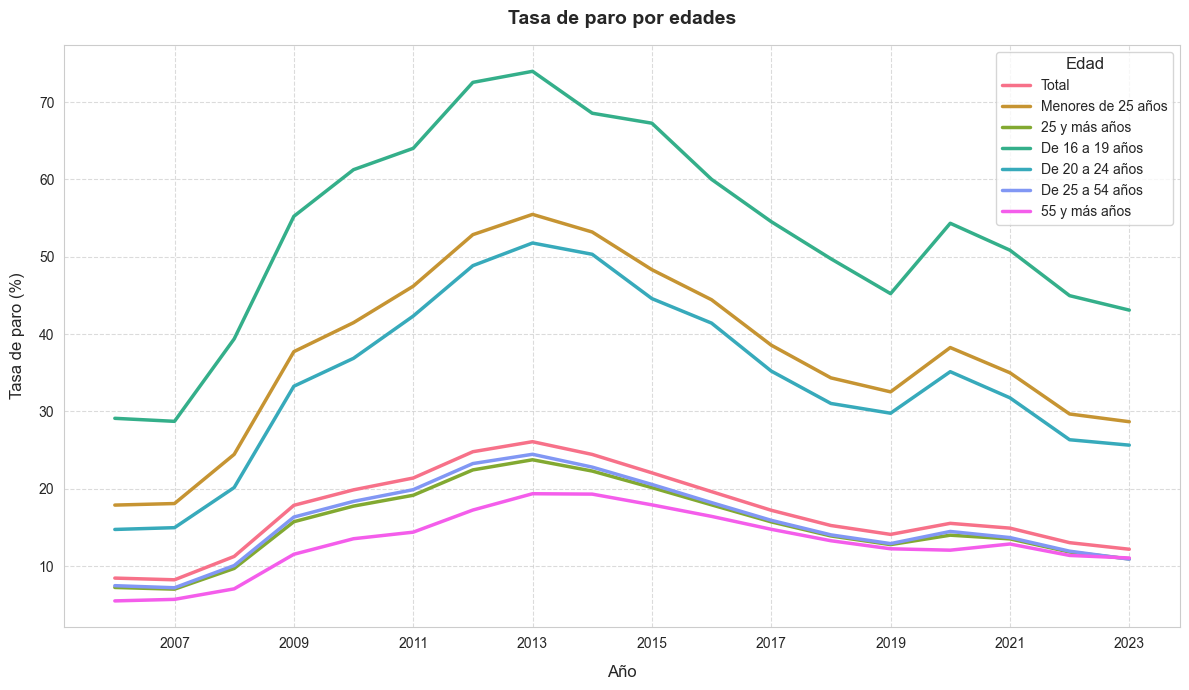

In [27]:
paro_edad = paro[(paro['ccaa']=="Total Nacional") & 
                 (paro['sexo'] == "Ambos sexos") ]
p.create_multi_category_plot(data = paro_edad, x_col="periodo", y_col="tasa_paro_total", 
                           label = "Edad",category_col="edad", xlabel="Año", ylabel="Tasa de paro (%)", 
                           title="Tasa de paro por edades", xticks_rotation=0, style="whitegrid", 
                           figsize=(12, 7))

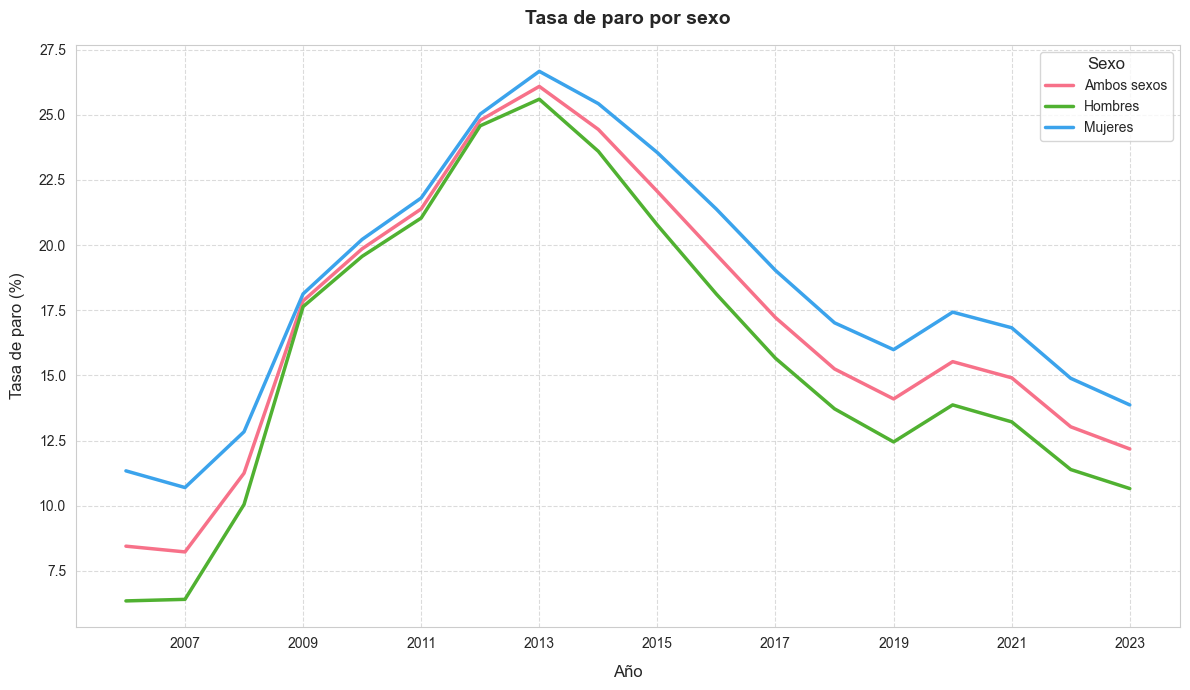

In [28]:
paro_sexo = paro[(paro['ccaa']=="Total Nacional") & 
                 (paro['edad'] == "Total") ]
p.create_multi_category_plot(data = paro_sexo, x_col="periodo", y_col="tasa_paro_total", 
                           label = "Sexo",category_col="sexo", xlabel="Año", ylabel="Tasa de paro (%)", 
                           title="Tasa de paro por sexo", xticks_rotation=0, style="whitegrid", 
                           figsize=(12, 7))

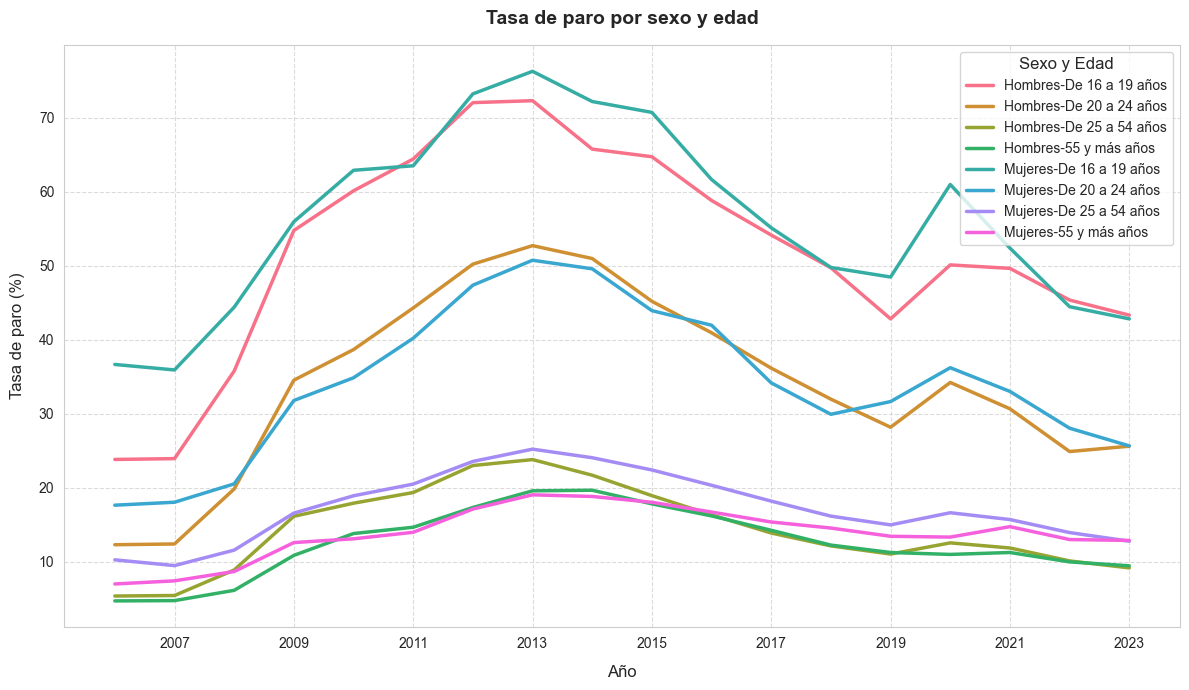

In [29]:
paro['sexo-edad'] = paro['sexo'] + "-" + paro['edad']
paro_sexo_edad = paro[(paro['ccaa']=="Total Nacional") & 
                      (paro['sexo'].isin(['Hombres', 'Mujeres'])) & 
                      (paro['edad'].isin(['De 16 a 19 años', 'De 20 a 24 años', 'De 25 a 54 años', '55 y más años'])) ]
p.create_multi_category_plot(data = paro_sexo_edad, x_col="periodo", 
                            y_col="tasa_paro_total", label = "Sexo y Edad",
                           category_col="sexo-edad", xlabel="Año", 
                           ylabel="Tasa de paro (%)", title="Tasa de paro por sexo y edad", 
                           xticks_rotation=0, style="whitegrid", figsize=(12, 7))

Parece claro que los jóvenes son los más afectados por el desempleo, sufriendo los incrementos más grandes a lo largo del tiempo, y alcanzando los valores más altos. A priori este debería ser de los posibles grupos afectados por el salario mínimo, pues un incremento en el mismo podría provocar una mayor dificultad de inserción en el mercado laboral.

En lo que respesta a sexo, parece que el grupo más afectado son las mujeres dentro de todas las edades.

Otro factor relevante a tener en cuenta en el análisis es qué porcentaje de parados son de larga duración, algo que puede pasar desapercibido en un análisis superficial y que puede ser un indicativo de efectos a más largo plazo como la dificultad de reinserción.

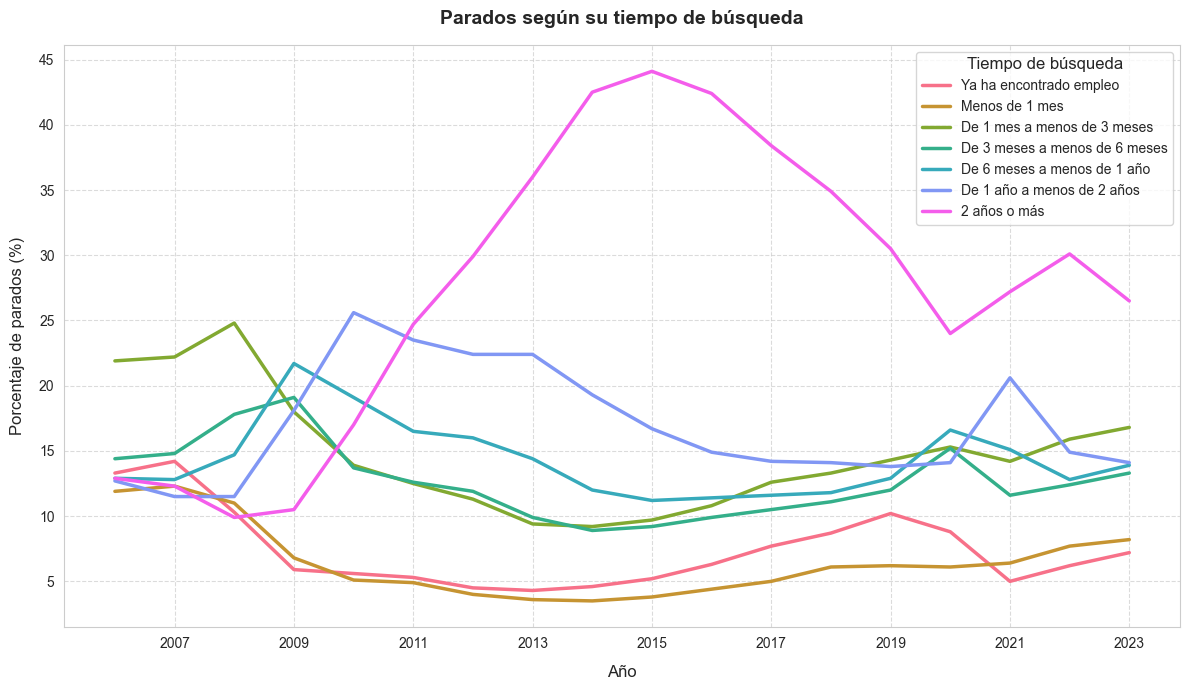

In [30]:
paro_duracion = pd.read_csv("../../processed_data/paro/parados_tiempo.csv")
paro_tiempo_busqueda = paro_duracion[(paro_duracion['ccaa']=="Total Nacional") & 
                                     (paro_duracion['sexo'] == "Ambos sexos") & 
                                     (paro_duracion['tiempo_busqueda']!="Total")]
p.create_multi_category_plot(data = paro_tiempo_busqueda, x_col="periodo", y_col="porcentaje_tipo_paro", 
                           label = "Tiempo de búsqueda",category_col="tiempo_busqueda", xlabel="Año", 
                           ylabel="Porcentaje de parados (%)", title="Parados según su tiempo de búsqueda", 
                           xticks_rotation=0, style="whitegrid", figsize=(12, 7))

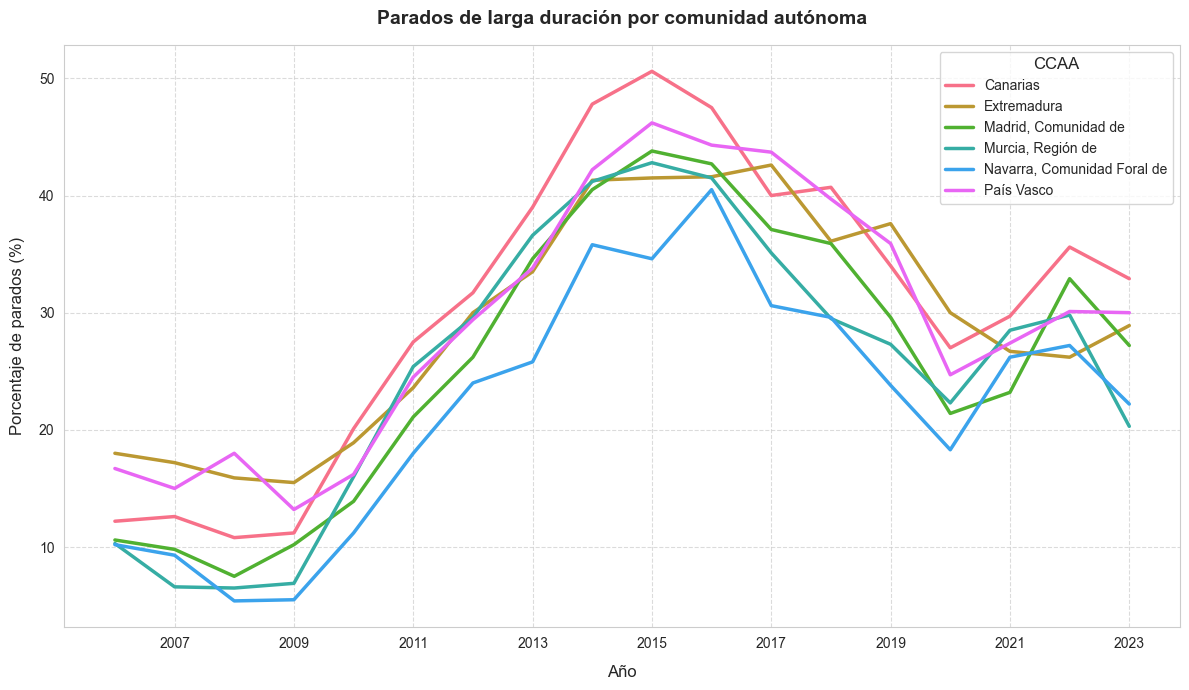

In [31]:
paro_tiempo_largo_ccaa= paro_duracion[(paro_duracion['ccaa'].isin(CCAA_mostrar)) & 
                                      (paro_duracion['sexo'] == "Ambos sexos") 
                                      & (paro_duracion['tiempo_busqueda']=="2 años o más")]
p.create_multi_category_plot(data = paro_tiempo_largo_ccaa, x_col="periodo", y_col="porcentaje_tipo_paro", label = "CCAA",category_col="ccaa",
                            xlabel="Año", ylabel="Porcentaje de parados (%)", 
                           title="Parados de larga duración por comunidad autónoma", xticks_rotation=0, style="whitegrid", 
                           figsize=(12, 7))

Al igual que con todas las variables previamente observadas, vemos que la evolución por comunidad autónoma sigue la misma tendencia, aunque las diferencias entre cada una no se pueden pasar por alto.

### Productividad
<a id="productividad"></a>

La productividad es un factor importante al estudiar el salario mínimo. Una alta productividad da más margen para incrementos salariales, mientras que una baja productividad puede fomentar una mayor cantidad de despidos.

El dataset escogido de productividad, obtenido del Observatorio de Productividad y Competitividad de España (OPCE) contiene además información útil sobre qué componentes son los que contribuyen a la productividad

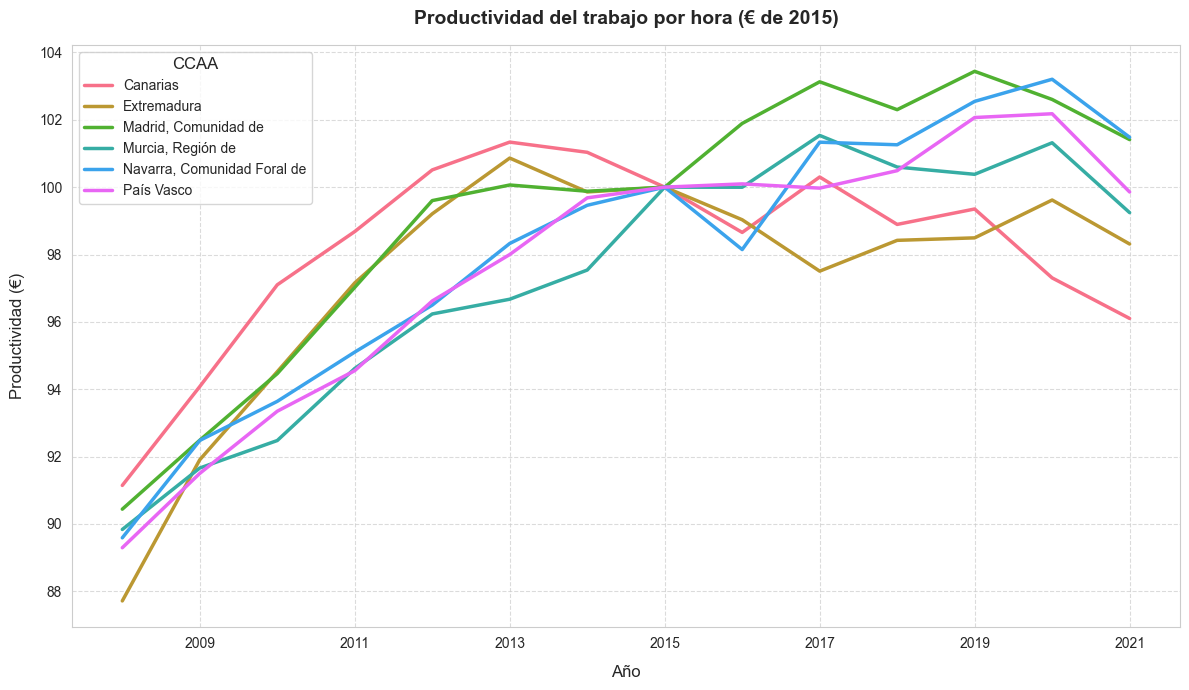

In [32]:
productividad = pd.read_csv("../../processed_data/productividad/productividad_ccaa.csv")
productividad = productividad[productividad.periodo>=2008]
productividad_hora = productividad[(productividad['variable'] == 'Productividad del trabajo por hora trabajada') & 
                                   (productividad.unidad == "Euros de 2015 por hora trabajada")]
productividad_hora_ccaa = productividad_hora[productividad_hora['ccaa'].isin(CCAA_mostrar)]
p.create_multi_category_plot(data = productividad_hora_ccaa, x_col="periodo", y_col="total", label = "CCAA"
                           ,category_col="ccaa", xlabel="Año", ylabel="Productividad (€)", 
                           title="Productividad del trabajo por hora (€ de 2015)", xticks_rotation=0,
                           style="whitegrid", figsize=(12, 7))

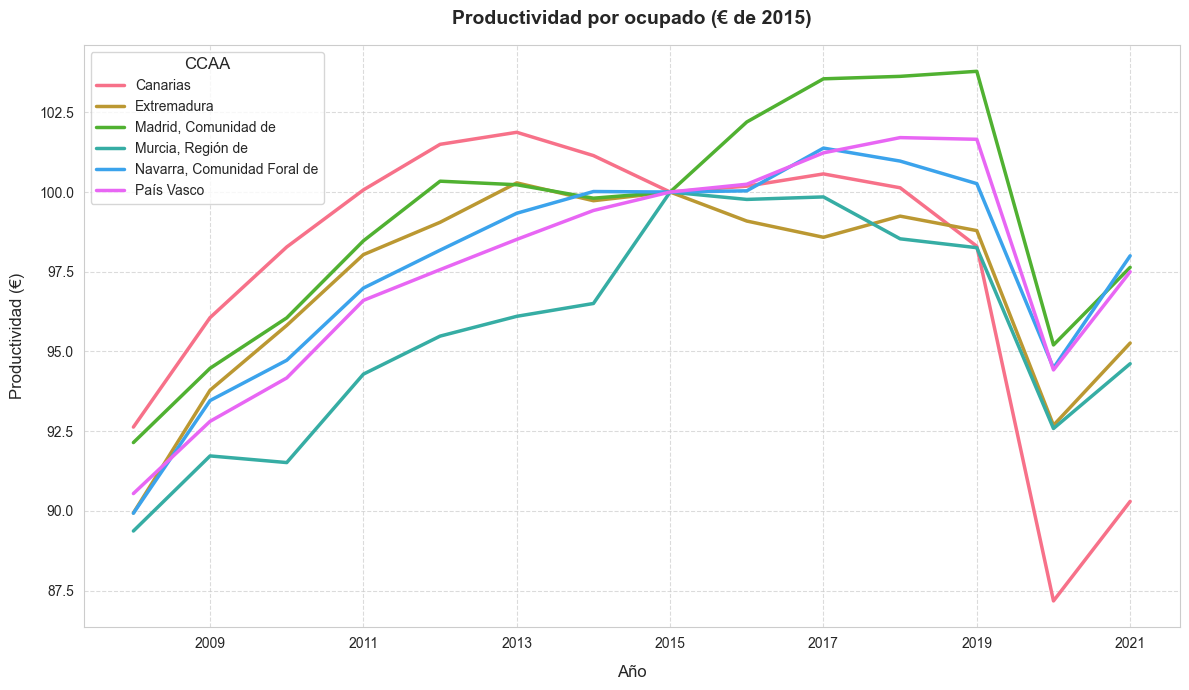

In [33]:
productividad_ocupado = productividad[(productividad['variable'] == 'Productividad del trabajo por ocupado') & 
                                      (productividad.unidad == "Euros de 2015 por persona ocupada")]
productividad_ocupado_ccaa = productividad_ocupado[productividad_ocupado['ccaa'].isin(CCAA_mostrar)]
p.create_multi_category_plot(data = productividad_ocupado_ccaa, x_col="periodo", y_col="total", label = "CCAA",category_col="ccaa", 
                           xlabel="Año", ylabel="Productividad (€)", 
                           title="Productividad por ocupado (€ de 2015)", 
                           xticks_rotation=0, style="whitegrid", figsize=(12, 7))

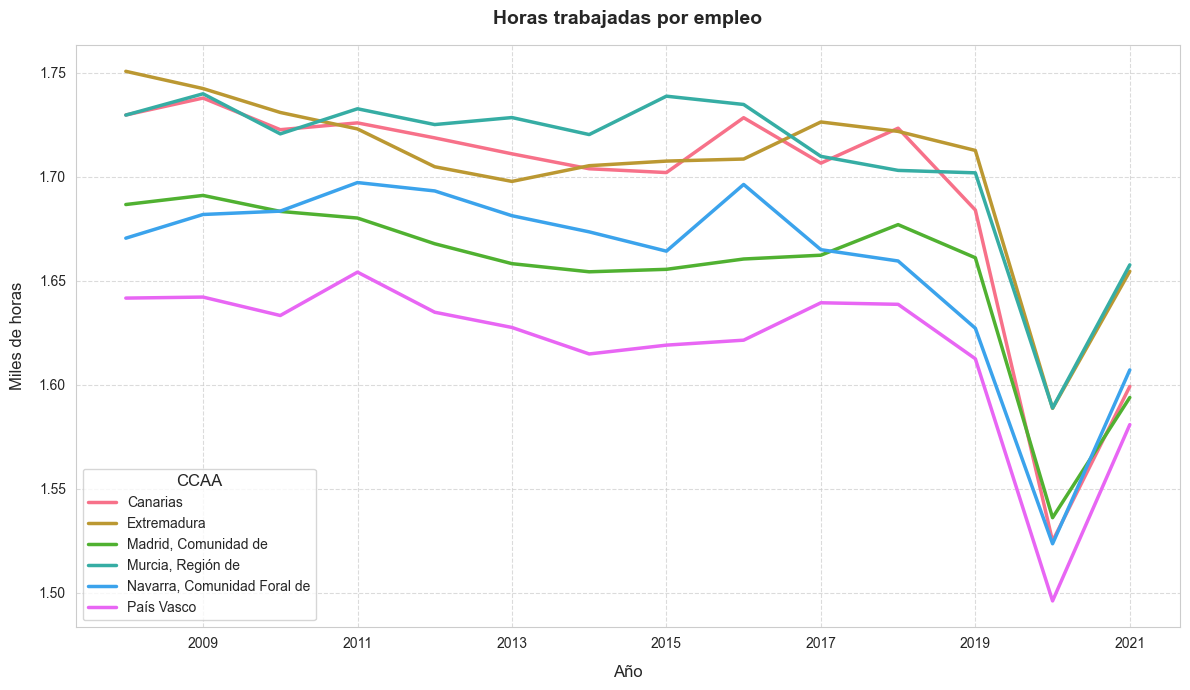

In [34]:
#Obtenemos el promedio de horas por empleo para ver la evolución
empleo = (productividad[(productividad.variable == "Empleo total") & 
                       (productividad.unidad == "Miles de personas")]
                       .drop(['variable', 'unidad'], axis=1)
                       .rename(columns = {'total': 'empleo'}))
horas_trabajadas = (productividad[(productividad.variable == "Horas trabajadas totales") & 
                                 (productividad.unidad == "Millones de horas")]
                                 .drop(['variable', 'unidad'], axis=1)
                                 .rename(columns = {'total': 'horas_trabajadas'}))

empleo_hora = pd.merge(empleo, horas_trabajadas, on=['periodo', 'ccaa'])
empleo_hora['empleo_hora'] = empleo_hora.horas_trabajadas/empleo_hora.empleo
p.create_multi_category_plot(data = empleo_hora[empleo_hora['ccaa'].isin(CCAA_mostrar)], 
                             x_col="periodo", y_col="empleo_hora", label = "CCAA",category_col="ccaa", 
                           xlabel="Año", ylabel="Miles de horas", title="Horas trabajadas por empleo", 
                           xticks_rotation=0, style="whitegrid", figsize=(12, 7))

De estas gráficas se puede extraer la conclusión de que comunidades autónomas como Canarias tienen una mayor proporción de empleo poco productivo, pues pese a trabajar de media más horas que un vasco la productividad por hora trabajada a partir de 2015 acaba siendo menor.

### Empresas
<a id="empresas"></a>

Las empresas y tamaño nos pueden informar de qué tan resistente puede ser una economía dada a un incremento del salario mínimo, pues empresas pequeñas con menos recursos tendrán menos capacidad de hacer frente a los gastos necesarios y consecuentemente podrán optar más por el despido o por cerrar.

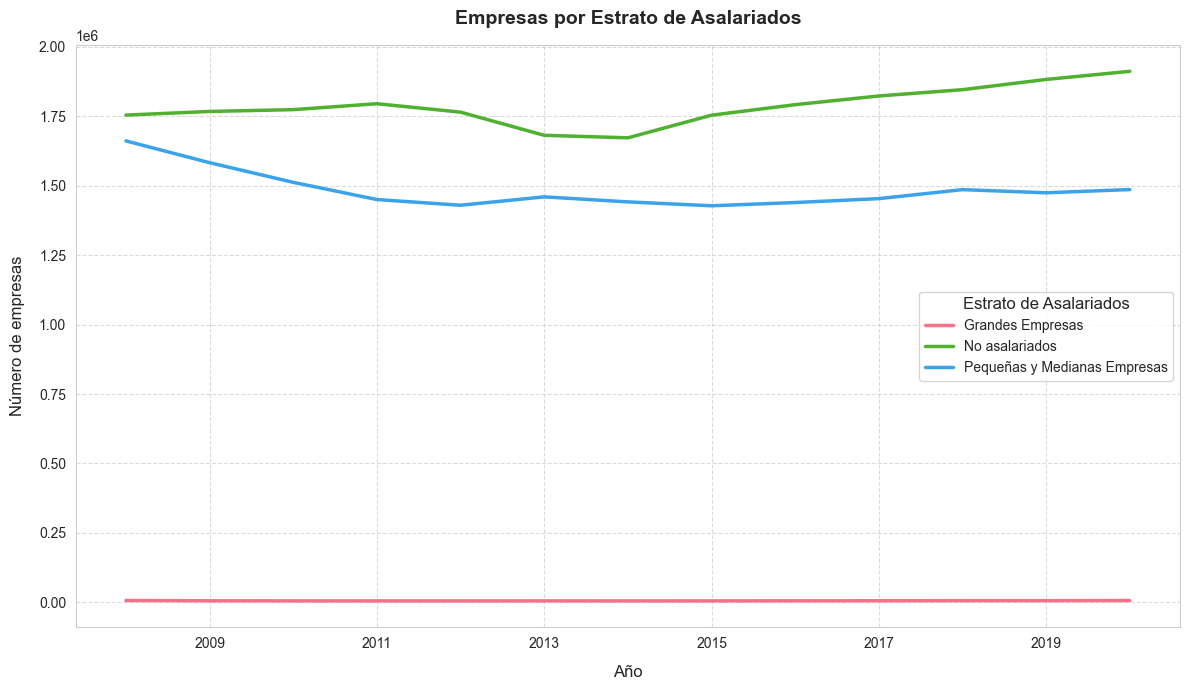

In [35]:
empresas = pd.read_csv("../../processed_data/empresas/empresas.csv")
empresas_todo = (empresas[(empresas.ccaa == "Total Nacional") & 
                         (empresas.actividad_principal == "Total CNAE")
                           & (empresas.estrato_asalariados != "Total")]
                           .groupby(['periodo', 'estrato_asalariados_grupo'], 
                                    as_index=False).agg({'total_empresas': 'sum'}))
p.create_multi_category_plot(data = empresas_todo, x_col="periodo", 
                             y_col="total_empresas", 
                             label = "Estrato de Asalariados",
                           category_col="estrato_asalariados_grupo", 
                           xlabel="Año", ylabel="Número de empresas", 
                           title="Empresas por Estrato de Asalariados", 
                           xticks_rotation=0, style="whitegrid", figsize=(12, 7))

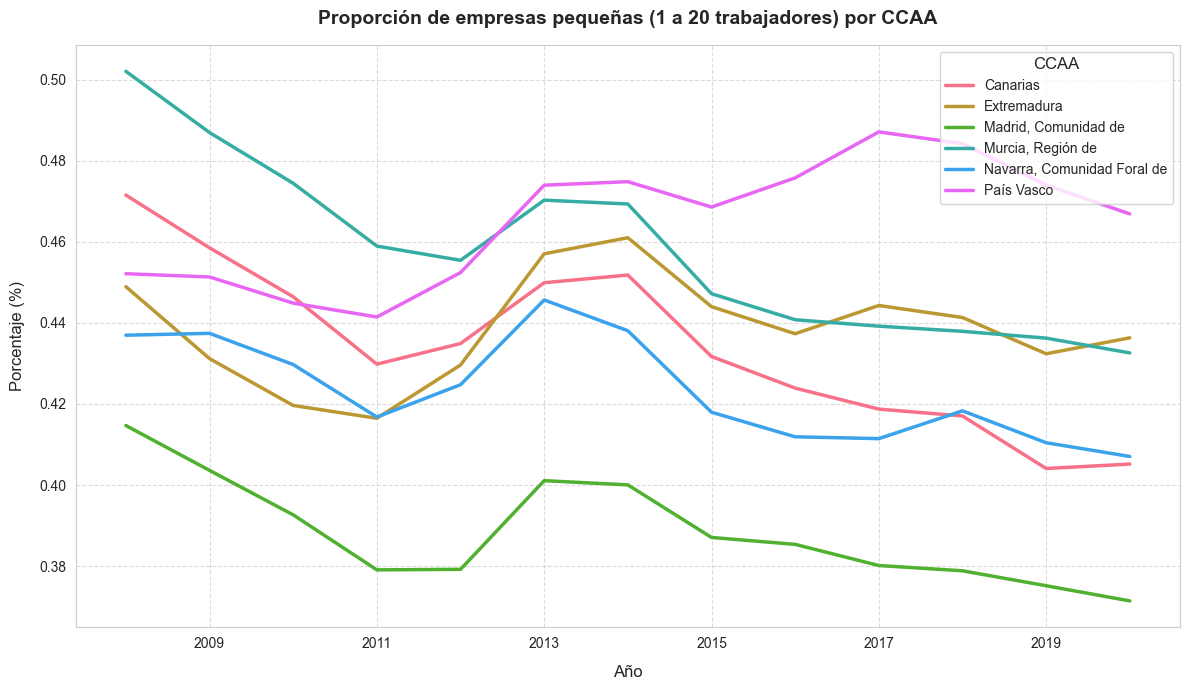

In [36]:
empresas_pequeñas_ccaa = (empresas[empresas.ccaa.isin(CCAA_mostrar) & 
                                  (empresas.estrato_asalariados.isin(['De 1 a 2', 'De 3 a 5', 'De 6 a 9', 'De 10 a 19'])) 
                                  & (empresas.actividad_principal == "Total CNAE")]
                                  .groupby(['periodo', 'ccaa'], as_index=False)
                                  .agg({'total_empresas': 'sum'}))
total_empresas = (empresas[(empresas.estrato_asalariados == "Total") & 
                          (empresas.actividad_principal == "Total CNAE") ]
                          .rename(columns={'total_empresas': 'total_empresas_total'}))
empresas_pequeñas_ccaa = empresas_pequeñas_ccaa.merge(total_empresas, 
                                                      on = ['periodo', 'ccaa'], 
                                                      how="left")
empresas_pequeñas_ccaa['porcentaje_empresas_pequeñas'] = empresas_pequeñas_ccaa['total_empresas']/empresas_pequeñas_ccaa['total_empresas_total']
p.create_multi_category_plot(data = empresas_pequeñas_ccaa, x_col="periodo", 
                             y_col="porcentaje_empresas_pequeñas", 
                             label = "CCAA",category_col="ccaa", 
                           xlabel="Año", ylabel="Porcentaje (%)", 
                           title="Proporción de empresas pequeñas (1 a 20 trabajadores) por CCAA", 
                           xticks_rotation=0, style="whitegrid", 
                           figsize=(12, 7))

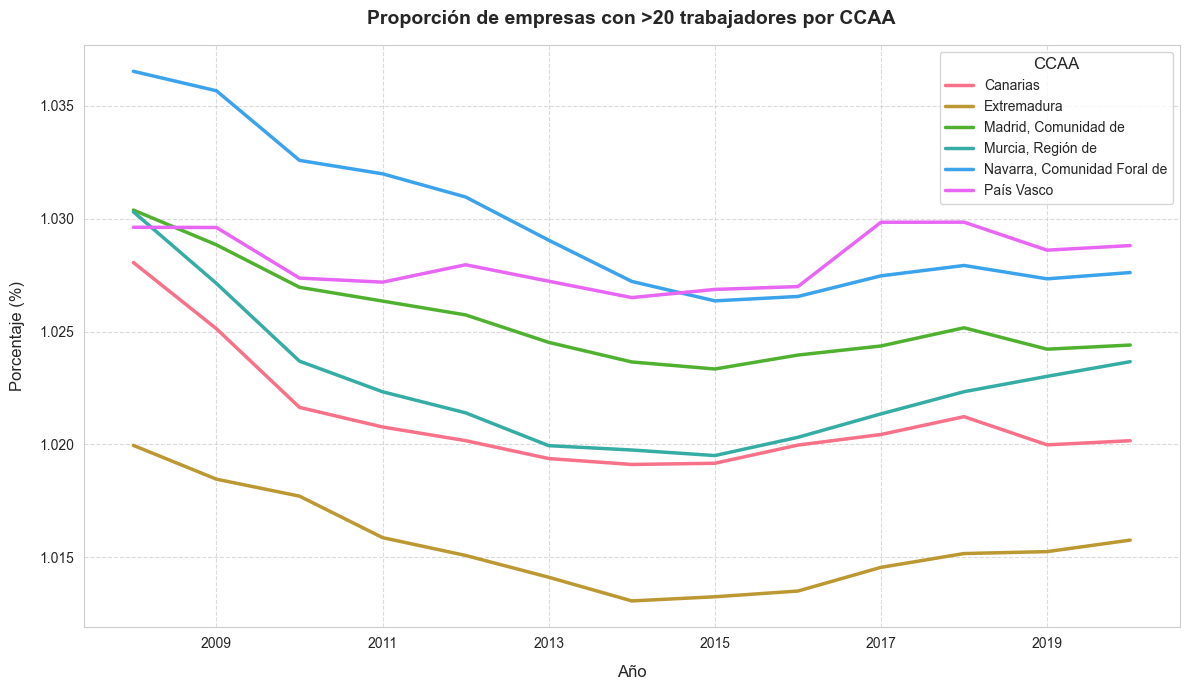

In [37]:
empresas_pequeñas_ccaa = (empresas[empresas.ccaa.isin(CCAA_mostrar) & 
                            ~(empresas.estrato_asalariados.isin(['Sin asalariados',
                                                                  'De 1 a 2', 
                                                                  'De 3 a 5', 
                                                                  'De 6 a 9', 
                                                                  'De 10 a 19']))  
                                 & (empresas.actividad_principal == "Total CNAE")]
                                  .groupby(['periodo', 'ccaa'], as_index=False)
                                  .agg({'total_empresas': 'sum'}))
total_empresas = (empresas[(empresas.estrato_asalariados == "Total") 
                          & (empresas.actividad_principal == "Total CNAE") ]
                          .rename(columns={'total_empresas': 'total_empresas_total'}))
empresas_pequeñas_ccaa = empresas_pequeñas_ccaa.merge(total_empresas, on = ['periodo', 'ccaa'], how="left")
empresas_pequeñas_ccaa['porcentaje_empresas_pequeñas'] = empresas_pequeñas_ccaa['total_empresas']/empresas_pequeñas_ccaa['total_empresas_total']
p.create_multi_category_plot(data = empresas_pequeñas_ccaa, 
                             x_col="periodo", y_col="porcentaje_empresas_pequeñas", 
                           label = "CCAA",category_col="ccaa", 
                           xlabel="Año", ylabel="Porcentaje (%)", 
                           title="Proporción de empresas con >20 trabajadores por CCAA", 
                           xticks_rotation=0, style="whitegrid", 
                           figsize=(12, 7))

Se observa que el mercado está dominado por pequeñas y medianas empresas y por empresas sin asalariados, mientras que las grandes empresas tienen una presencia prácticamente despreciable. A nivel de comunidad autónoma se aprecia que la proporción de empresas con pocos empleados es dispar entre comunidades autónomas, y que esta disparidad no guarda un ordenamiento parecido al que hayamos observado en el pib o la productividad.

En lo que respecta a las empresas con más de 20 empleados, estas suponen un valor residual que no explica el decrecimiento porcentual de las empresas pequeñas a partir de 2015, y este vendría principalmente explicado por el incremento de empresas sin asalariados.

### Pobreza y Desigualdad
<a id="pobreza"></a>

La pobreza y la desigualdad suponen dos factores que nivel conceptual no deberían tener efecto como variable de entrada en un modelo en ninguna de las variables mencionadas previamente, pero sí que son una variable de salida interesante a estudiar, pues los incrementos de salario mínimo se justifican bajo la promeso de reducir desigualdad y pobreza.

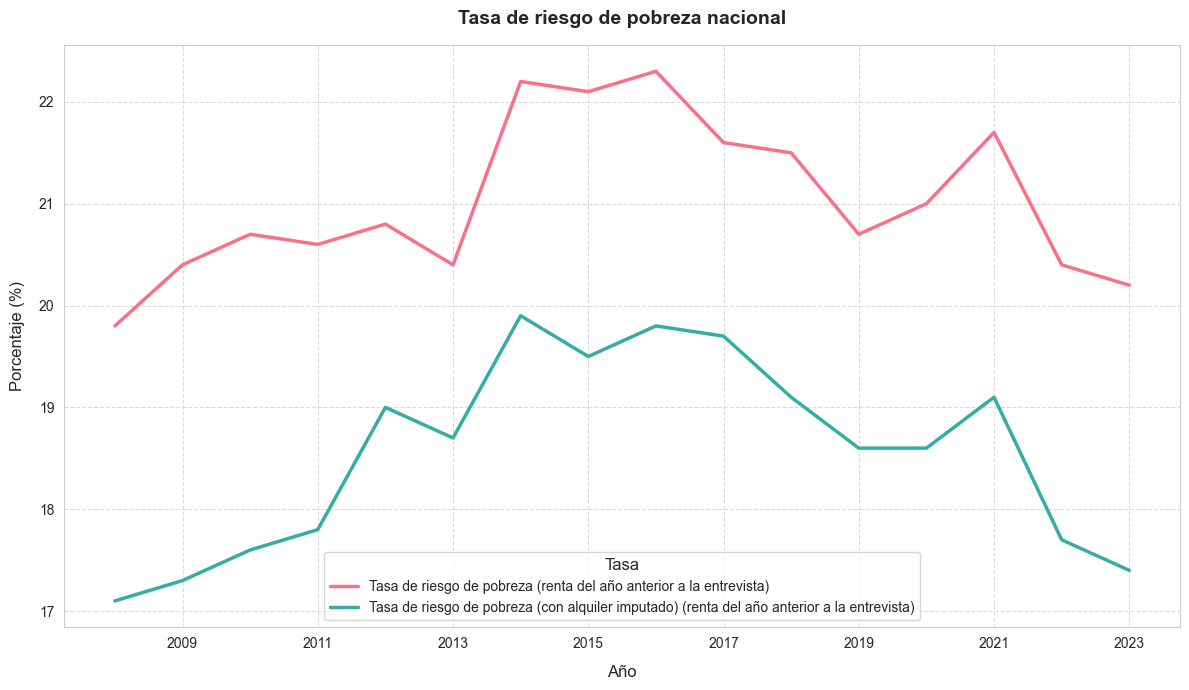

In [38]:
pobreza = pd.read_csv("../../processed_data/pobreza/riesgo_pobreza.csv")
pobreza_nacional = pobreza[pobreza['ccaa'] == "Total Nacional"]
p.create_multi_category_plot(data = pobreza_nacional, x_col="periodo", y_col="total", 
                           label = "Tasa",category_col="riesgo_pobreza", 
                           xlabel="Año", ylabel="Porcentaje (%)", 
                           title="Tasa de riesgo de pobreza nacional", 
                           xticks_rotation=0, style="whitegrid", figsize=(12, 7))

Vemos que a nivel nacional el riesgo de pobreza parece no tener relación con las subidas de salario mínimo. De hecho, tras 2015 comienza una tendencia decreciente (exceptuando por 2021, que corresponde al riesgo de pobreza en el año de pandemia), coincidiendo con la tendencia creciente del salario mínimo.

Veamos cómo es la evolución a nivel de comunidad autónoma con alquiler imputado.

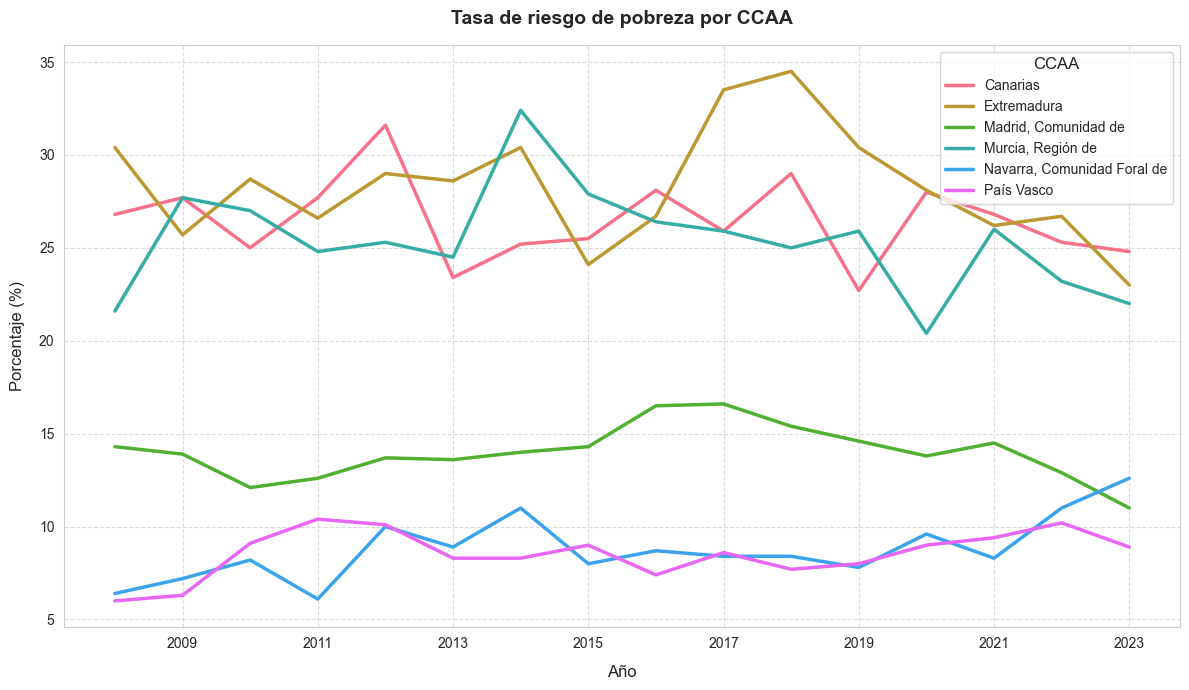

In [40]:
pobreza_ccaa = pobreza[(pobreza['riesgo_pobreza'] == "Tasa de riesgo de pobreza (con alquiler imputado) (renta del año anterior a la entrevista)")
                        & (pobreza['ccaa'].isin(CCAA_mostrar))]
p.create_multi_category_plot(data = pobreza_ccaa, x_col="periodo", y_col="total", label = "CCAA",category_col="ccaa", 
                           xlabel="Año", ylabel="Porcentaje (%)", title="Tasa de riesgo de pobreza por CCAA", 
                           xticks_rotation=0, style="whitegrid", figsize=(12, 7))

Es interesante observar que las comunidades más pobres no solo tienen tasas más altas, sino que estas son considerablemente más volátiles en el tiempo.

Veamos cómo evoluciona la desigualdad medida en :

- **Índice de Gini:** Mide cuán distribuido está la renta a través de la curva de Lorenz, siendo 0 una perfecta igualdad y 100 el caso en el que una persona tiene toda la riqueza evaluada.

- **Índice S80/S20**: Es el cociente entre el ingreso del 20% más rico de la población entre el 20% más pobre de la población. Se diferencia del índice Gini en que es más específico para ver la diferencia entre clases más ricas y más pobres en lugar de analizar una distribución global.

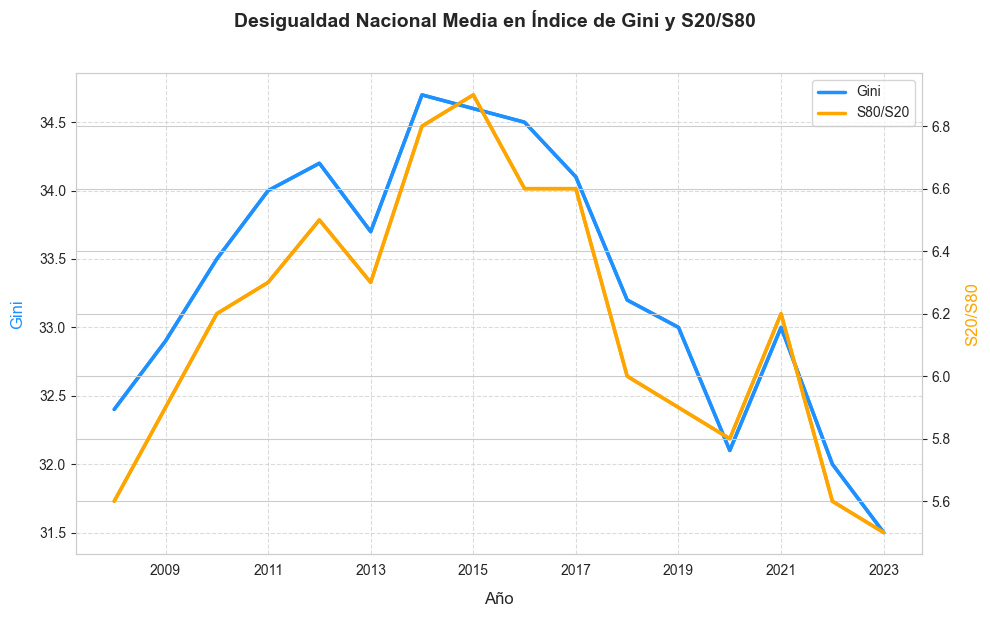

In [41]:
desigualdad = pd.read_csv("../../processed_data/pobreza/desigualdad.csv")
desigualdad_nacional_gini = desigualdad[(desigualdad['ccaa'] == "Total Nacional") & 
                                        (desigualdad['desigualdad'] == "Gini")]
desigualdad_nacional_8020 = desigualdad[(desigualdad['ccaa'] == "Total Nacional") & 
                                        (desigualdad['desigualdad'] == "Distribución de la renta S80/S20")]
p.create_dual_plot(desigualdad_nacional_gini['periodo'], desigualdad_nacional_gini['total'], 
                 desigualdad_nacional_8020['total'], 
                 xlabel="Año", ylabel1="Gini", ylabel2="S20/S80" ,
                 label1= "Gini", label2="S80/S20", 
                 title="Desigualdad Nacional Media en Índice de Gini y S20/S80",
                 xticks_rotation=0, style="whitegrid", figsize=(10, 6), marker1=None, 
                 marker2=None, secondary_y=True )

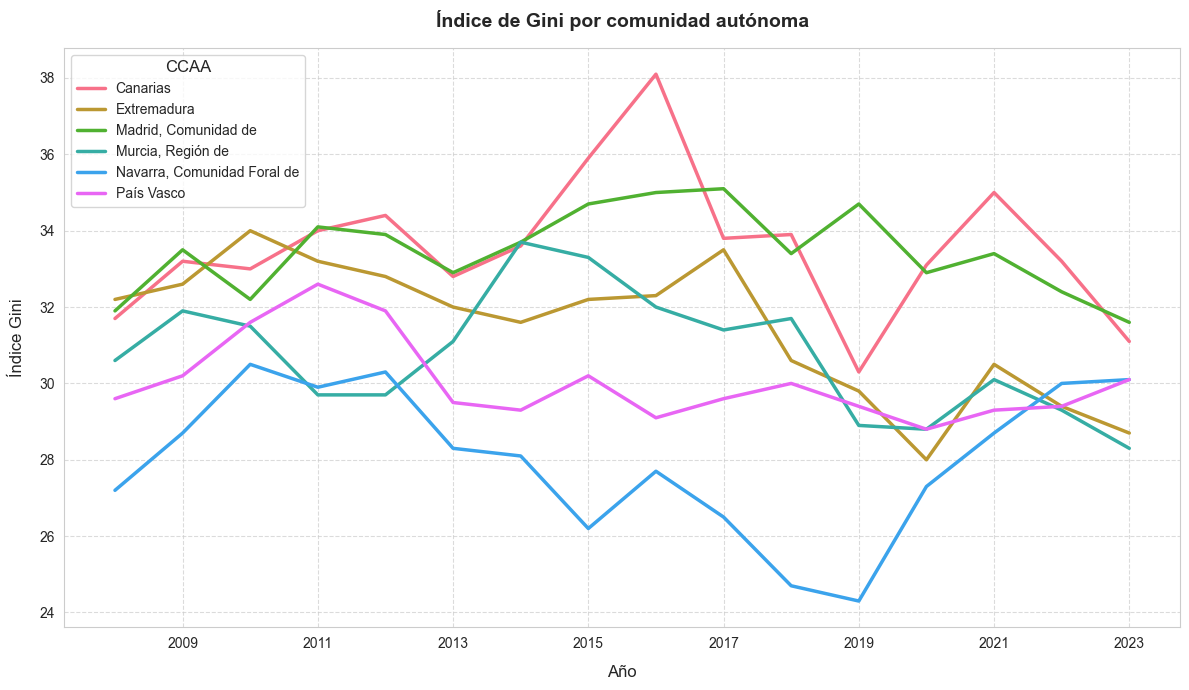

In [42]:
desigualdad_gini_ccaa = desigualdad[(desigualdad['desigualdad'] == "Gini") 
                                    & (desigualdad['ccaa'].isin(CCAA_mostrar))]
p.create_multi_category_plot(data = desigualdad_gini_ccaa, x_col="periodo", 
                             y_col="total", label = "CCAA",category_col="ccaa", 
                           xlabel="Año", ylabel="Índice Gini", 
                           title="Índice de Gini por comunidad autónoma", 
                           xticks_rotation=0, style="whitegrid", figsize=(12, 7))

Los dos índices tienen un evolución muy diferenciada: el índice de Gini muestra una evolución algo más plana o a veces decreciente para comunidades como Navarra, mientras que en el caso del índice S80/S20 a partir de 2015 tiene correlación inversa con el salario mínimo. Estos resultados podrían llevarnos rápidamente a concluir que el salario mínimo disminuye la desigualdad, pues la evolución del salario mínimo real está inversamente correlado con la desigualdad, si bien es cierto que a nivel autonómico la variabilidad es alta. No obstante hay que tener en cuenta dos matices:

- La desigualdad nos indica la brecha entre ricos y pobres, pero no nos da una idea clara de cómo viven estos últimos, lo que en última instancia tendría más peso que la desigualdad en sí.
- El resto de factores económicos puede estar condicionando también la evolución positiva de la desigualdad: mayor productividad, mayor PIB per cápita o menor paro pueden conducir también a la reducción de la desigualdad, por lo que debemos ser precavidos con estos resultados iniciales.

Con el fin de resolver la primera cuestión, podemos echar un vistazo a la carencia material, que nos indica el porcentaje de personas que sufren de determinadas carencias como incapacidad de mantener la viviend a una temperatura adecuada o inpagos en sus facturas.

Plot saved to ../../images/carencia_nacional.png


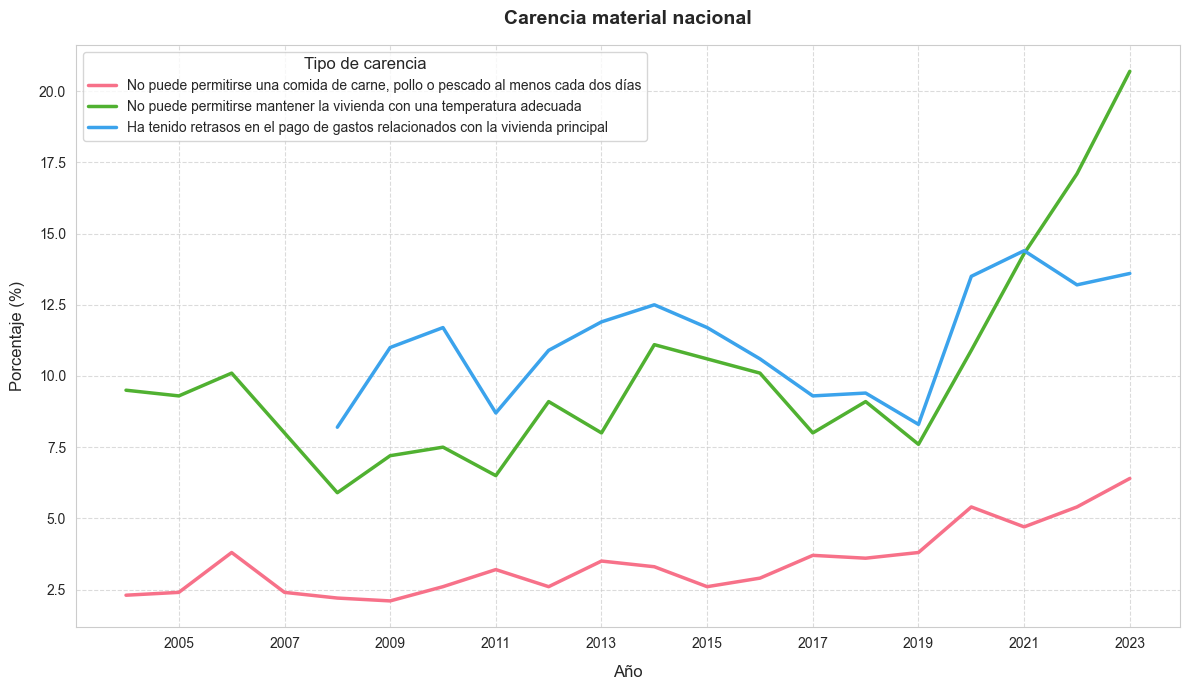

In [43]:
carencia = pd.read_csv("../../processed_data/pobreza/carencia_material.csv")
carencias_severas = ['No puede permitirse mantener la vivienda con una temperatura adecuada',
                      'No puede permitirse una comida de carne, pollo o pescado al menos cada dos días',
                        'Ha tenido retrasos en el pago de gastos relacionados con la vivienda principal (hipoteca o alquiler, recibos de gas, comunidad...) o en compras a plazos en los últimos 12 meses']
carencia_nacional = carencia[(carencia['ccaa'] == "Total Nacional") & 
                             (carencia['carencia_material'].isin(carencias_severas))]
carencia_nacional['carencia_material'] = carencia_nacional['carencia_material'].replace('Ha tenido retrasos en el pago de gastos relacionados con la vivienda principal (hipoteca o alquiler, recibos de gas, comunidad...) o en compras a plazos en los últimos 12 meses',
                                                                                       'Ha tenido retrasos en el pago de gastos relacionados con la vivienda principal')
p.create_multi_category_plot(data = carencia_nacional, x_col="periodo", y_col="total", label = "Tipo de carencia",
                           category_col="carencia_material", 
                           xlabel="Año", ylabel="Porcentaje (%)",
                           title="Carencia material nacional",
                           xticks_rotation=0, style="whitegrid", figsize=(12, 7), 
                           save_path="../../images/carencia_nacional.png")

Observamos entonces que ciertas carencias como mantener la vivienda a una temperatura adecuada o tener retrasos en pagos tiende a decrecer de forma medianamente aparejada al incremento del salario mínimo a partir de 2015, pero otras carencias como no poder permitirse comer carne, pollo y pescado cada dos días tienden a crecer con el tiempo, duplicándose entre 2015 y 2020.

## Creación de ratios y selección de variables para el modelo
<a id="variables_independientes"></a>

Tras haber analizado las variables involucradas para crear un estado de partida y evaluar los posibles resultados debemos escoger las variables más adecuadas y representativas que nos permitan extraer la máxima información del estado para hacer las predicciones. 


La primera cuestión a tener en cuenta en tal menester es que, dado que el objetivo es utilizar las economías de las comunidades autónomas para hacer comparativas bajo diferentes circunstancias, es preciso tener magnitudes comparables entre las mismas. Los valores absolutos no son adecuados, pues no permiten una generalización posterior y necesaria para los propósitos del análisis. En consecuencia hemos de definir las variables a utilizar en concepto de ratios o incrementos porcentuales (o su equivalente como factor multiplicativo). Las variables propuestas de las cuales se seleccionarán las más relevantes en el análisis posterior son:


- **SMI_VIDA**: Definido como el ratio entre el coste medio de vivienda y alimentos básicos de una familia en un año dado y el SMI; es decir, cuantos SMIs son necesarios para cubrir estos gastos básicos en un territorio dado.


- **SMI_MEDIO**: Salario mínimo interprofesional dividido entre el salario medio de la región. nos indica qué tan cerca está el salario mínimo en una región dada del salario medio de dicha región.


- **EMPRESAS_10, EMPRESAS_20, EMPRESAS_50**: Porcentaje de empresas con un número de trabajadores entre 1 y 9, entre 10 y 19 y entre 20 y 49 respectivamente. Nos dan una idea de la estructura empresarial general de un territorio dado.


- **PARO_1_AÑO**: Porcentaje de parados que han estado parados buscando empleo por más de un año. Nos permite entender la distribución de parados en el mercado.


- **EMP_1_5**: Porcentaje de trabajadores sobre el total que cobran entre 0 y 1,5 salarios mínimos. Es una variable que nos puede indicar el posible número de afectados por el incremento del salario mínimo.


- **PARO_25**: El ratio entre el porcentaje de paro de los trabajadores menores de 25 años y la tasa total de paro. Nos puede dar una idea de la rigidez del mercado laboral en un momento determinado.
 

- **OC_CONSTRUCCION, OC_SERVICIOS**: Porcentaje de ocupados en construcción y servicios. Al ser estos los sectores más bajos en términos de retribución, nos proporciona información sobre los posibles afectados por el salario mínimo. 
 


El resto de variables a probar serán ratios previamente observados en el análisis descriptivo, que serán:

- **PARO** : Tasa de paro.


- **PIB_CAPITA**: PIB per cápita.


- **PROD_HORA**: Productividad de cada trabajador por hora.


- **CARENCIA**: Porcentaje de personas que no puede permitirse comer pollo o pescado al menos cada dos días. Escogemos esta carencia en concreto porque supone una carencia relacionada con las necesidades más básicas, mientras que las otras se pueden ir intercambiado entre sí según las necesidades de las personas (p.ej alguien que decida no irse de vacaciones porque prefiere destinar sus pocos recursos a renovar sus muebles rotos).


- **RIESGO_POBREZA**: Riesgo de pobreza. Es una variable útil para entender tanto cuánta gente puede haber afectada por el incremento del salario mínimo como el posible impacto del mismo.


- **INC_SMI_REAL**: Incremento porcentual del SMI real año contra año en la región dada. Esta será la variable predictora fundamental que nos interesa evaluar.


- **DESIGUALDAD**: Desigualdad de ingresos medida mediante el índice S80/S20.


- **PARCIAL**: Porcentaje de trabajadores a jornada parcial dentro del total de trabajadores.


- **HORAS_TRABAJO**: Horas trabajadas por empleado. Nos puede ayudar a entender los cambios en la estructura del trabajo junto con el paro.


- **IPC**: Valor del IPC, nos ayudará a estudiar cómo afecta la subida de salarios mínimos a la inflación.


Notemos que a excepción de las variables derivadas del SMI el resto de variables son tanto predictoras como predecidas, pues como hemos mencionado antes, queremos conocer todo el estado posterior al incremento del salario mínimo para evaluar la totalidad de sus consecuencias. De cara a poder realizar análisis y correlaciones, utilizaremos los incrementos porcentuales de determinadas variables, que señalaremos con un sufijo "_delta1" para indicar que mirarmos el incremento año contra año. En el caso de la variable CARENCIA, al poder moverse entre valores muy bajos, medir el incremento porcentual puede dar lugar a valores muy grandes que pueden afectar al rendimiento final, por lo que para este caso particular mediremos el incremento porcentual absoluto año contra año.

Es importante destacar que no todas las variables definirán el estado que se tomará como base, pero sí pueden ser variables que sean predichas por ser de interés. Por ejemplo el índice S80/S20 podría no estar incluida entre las variables predictoras, pero es una variable que queremos predecir por ser uno de los principales focos de atención en otros estudios del salario mínimo.

Por último, todas las variables que estén evaluadas en euros serán ajustadas por inflación a precios del 2021 para que todos los análisis se hagan sobre bases similares. El ajuste se hará a nivel de comunidad autónoma.

In [44]:
#Creamos la tabla final con todas las variables
total_merge = dformat.combinar_tablas(gasto_basico, smi, pobreza, desigualdad,
                                      salarios_ocupacion, salarios_smis, empresas,
                                      ipc, pib_per_capita, productividad_hora,
                                      carencia, empleo_hora, paro,
                                      paro_duracion, ocupados_jornada)

#Creamos las variables restantes y ajustamos las que correspondan al IPC
#Preservamos solo las columnas de interés
variables = ['ccaa', 'periodo', 'SMI_VIDA', 'SMI_MEDIO',
              'EMPRESAS_10', 'EMPRESAS_20',
              'EMPRESAS_50', 'PARO_1_AÑO', 
              'EMP_1_5', 'PARO_25', 'OC_CONSTRUCCION', 
              'OC_SERVICIOS', 'PARO', 'PIB_CAPITA', 
              'PROD_HORA', 'CARENCIA', 'RIESGO_POBREZA', 
              'INC_SMI_REAL', 'DESIGUALDAD', 'PARCIAL', 
              'IPC', 'HORAS_TRABAJO']

df = dformat.format_total_merge(total_merge, variables)


In [45]:
print("Valores nulos por columnas: ", sep="\n")
display(df.isna().sum())

Valores nulos por columnas: 


ccaa                0
periodo             0
SMI_VIDA            0
SMI_MEDIO           0
EMPRESAS_10         0
EMPRESAS_20         0
EMPRESAS_50         0
PARO_1_AÑO          0
EMP_1_5            26
PARO_25             0
OC_CONSTRUCCION     0
OC_SERVICIOS        0
PARO                0
PIB_CAPITA          0
PROD_HORA           0
CARENCIA            0
RIESGO_POBREZA      0
INC_SMI_REAL        0
DESIGUALDAD         0
PARCIAL             0
IPC                 0
HORAS_TRABAJO       0
dtype: int64

Vemos que tenemos valores faltantes en EMP_1_5, esto se debe a que no tenemos disponibles los valores para País Vasco y Navarra. Dado que el resto de columnas está disponible y la cantidad de datos que tenemos es escasa no es factible descartar las filas debido a la falta de estos valores. En la siguiente sección donde estudiamos las correlaciones veremos cuál es la manera conveniente de imputar estos valores.

Una vez con las variables principales a estudiar, observemos los posibles outliers que estaremos tratando.

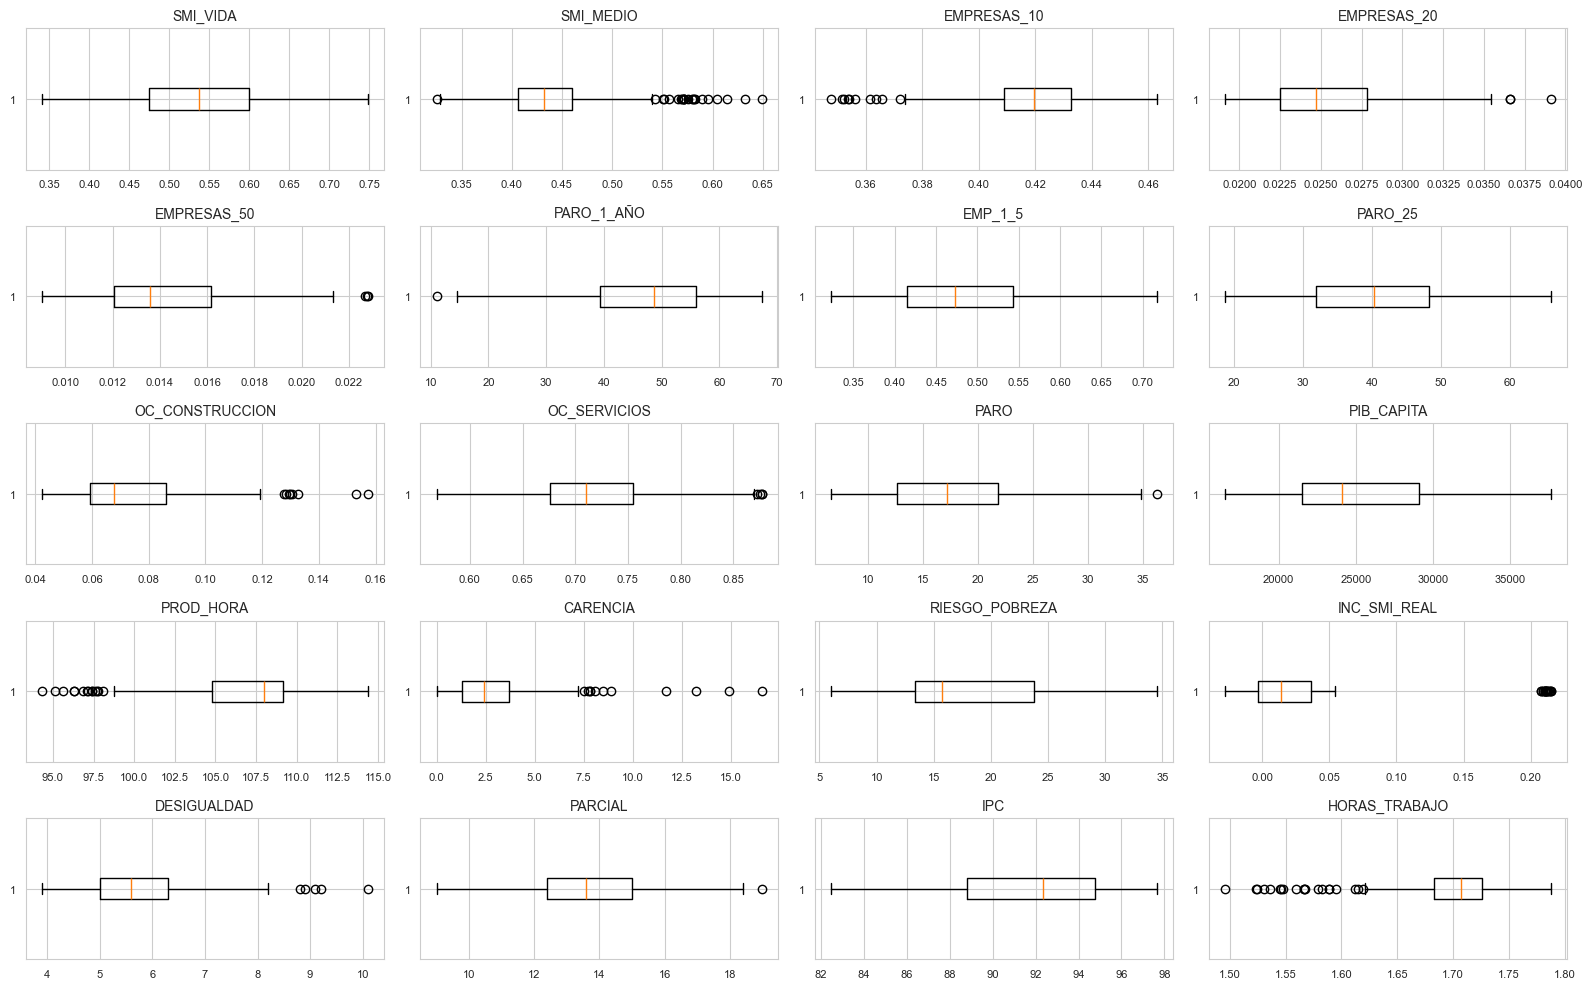

In [46]:
df_num = df[['SMI_VIDA', 'SMI_MEDIO', 'EMPRESAS_10', 'EMPRESAS_20',
              'EMPRESAS_50', 'PARO_1_AÑO', 'EMP_1_5', 'PARO_25', 
              'OC_CONSTRUCCION', 'OC_SERVICIOS', 'PARO', 
              'PIB_CAPITA', 'PROD_HORA', 'CARENCIA', 'RIESGO_POBREZA', 
              'INC_SMI_REAL', 'DESIGUALDAD', 'PARCIAL', 
              'IPC', 'HORAS_TRABAJO']]

p.box_plot_var(df_num,nrows=5, ncols=4)

En el presente estudio, se ha optado por no eliminar ni tratar los outliers debido a que estos representan situaciones económicas reales y relevantes. La presencia de valores atípicos en variables como las horas trabajadas por empleo o la productividad por hora refleja disparidades regionales o sectoriales importantes que pueden influir significativamente en los efectos del salario mínimo. Excluir estos datos podría llevar a una pérdida de información crítica y limitar la capacidad del análisis para captar plenamente las dinámicas del mercado laboral. Por ello, se consideran fundamentales para ofrecer una visión más completa y realista del fenómeno estudiado.

## Correlaciones y Selección de Variables
<a id="variables_independientes"></a>


### Correlaciones
<a id="correlaciones"></a>

Es importante notar que la cantidad de información es limitada. Suponiendo que usaremos 17 comunidades autónomas y el periodo de intersección de las variables de datos disponibles es entre 2008 y 2019, tendríamos algo menos de 190 filas para llevar a cabo el análisis, tomando además en cuenta que tendremos que hacer una separación test y control. Por ello es de vital importancia reducir lo máximo posible el número de variables empleadas para evitar problemas con la dimensionalidad.

Empecemos analizando la correlación de pearson para entender qué variables se mueven de manera más similar.

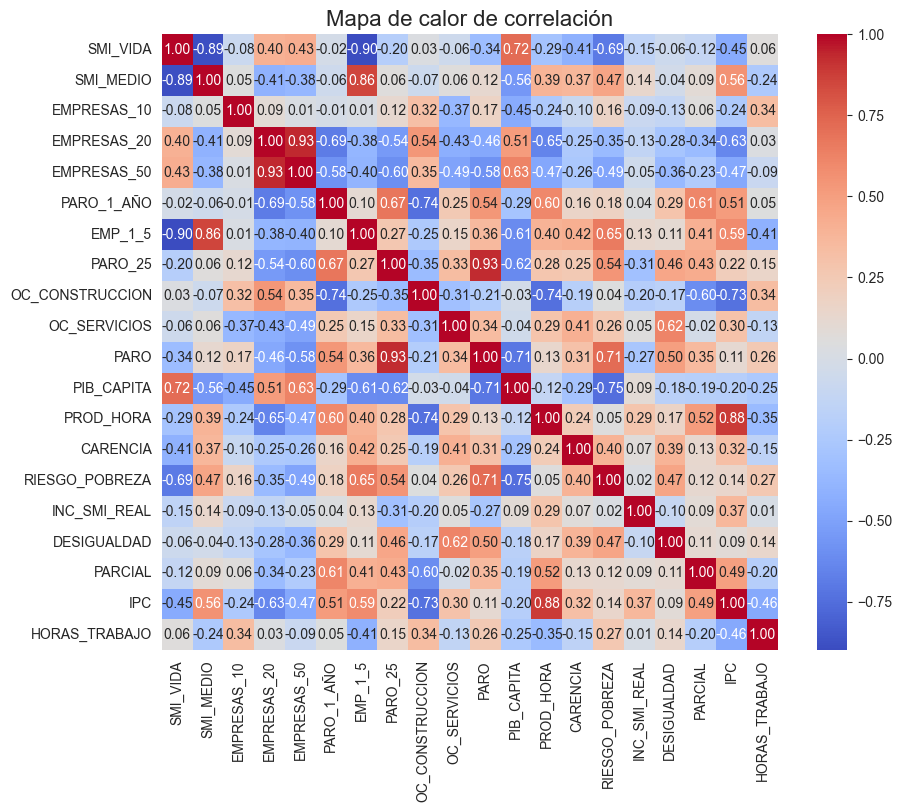

In [47]:
# Calcular la matriz de correlación
num_var = ['SMI_VIDA', 'SMI_MEDIO', 'EMPRESAS_10', 'EMPRESAS_20',
              'EMPRESAS_50', 'PARO_1_AÑO', 'EMP_1_5', 'PARO_25', 
              'OC_CONSTRUCCION', 'OC_SERVICIOS', 'PARO', 
              'PIB_CAPITA', 'PROD_HORA', 'CARENCIA', 
              'RIESGO_POBREZA', 'INC_SMI_REAL',
              'DESIGUALDAD', 'PARCIAL', 'IPC', 'HORAS_TRABAJO']
p.creat_corr_matrix(df, num_var)

A priori observamos varias correlaciones fuertes entre diversas variables. Se observa una correlación inversa esperada entre SMI_MEDIO y SMI_VIDA, ya que uno es proporcional al SMI y el otro es inversamente proporcional. Se observa también algunas correlaciones no esperadas, como lo es la correlación entre la productividad por hora y el IPC, así como la correlación entre IPC y porcentaje de trabajadores a jornada parcial (PARCIAL).

Sin embargo, lo interesante es observar cómo afecta una variación del salario mínimo a la variación de las variables año contra año que es lo que veremos a continuación. No obstante, recordemos que una de las variaciones de interés a observar es cómo afecta la variación del salario mínimo al resto de variables.

Antes de eso, y aprovechando las múltiples correlaciones que se dan en las variables haremos una imputación de la variable EMP_1_5 mediante vecinos cercanos.

In [48]:
# Creamos el imputador
knn_imputer = KNNImputer(n_neighbors=2)

# Realizamos la imputación
data_numeric = df.drop(columns=["ccaa", "periodo"])  # Excluir columnas no numéricas
data_imputed = knn_imputer.fit_transform(data_numeric)

# Convertir de nuevo a DataFrame
data_imputed_df = pd.DataFrame(data_imputed, columns=data_numeric.columns)
data_imputed_df["ccaa"] = df["ccaa"].values
data_imputed_df["periodo"] = df["periodo"].values

df = data_imputed_df.copy()


In [49]:
num_var_delta = ['SMI_VIDA', 'SMI_MEDIO', 'EMPRESAS_10', 'EMPRESAS_20',
              'EMPRESAS_50', 'PARO_1_AÑO', 'EMP_1_5', 'PARO_25', 'OC_CONSTRUCCION', 'OC_SERVICIOS',
              'PARO', 'PIB_CAPITA', 'PROD_HORA', 'CARENCIA', 'RIESGO_POBREZA',
              'DESIGUALDAD', 'PARCIAL', 'IPC', 'HORAS_TRABAJO']
df_delta = df.copy()
for var in num_var_delta:
    df_delta = dformat.atrasar_año(df_delta, var, year_col='periodo', region_col='ccaa', periodos=1, calc_delta=True, drop_period_var=True)

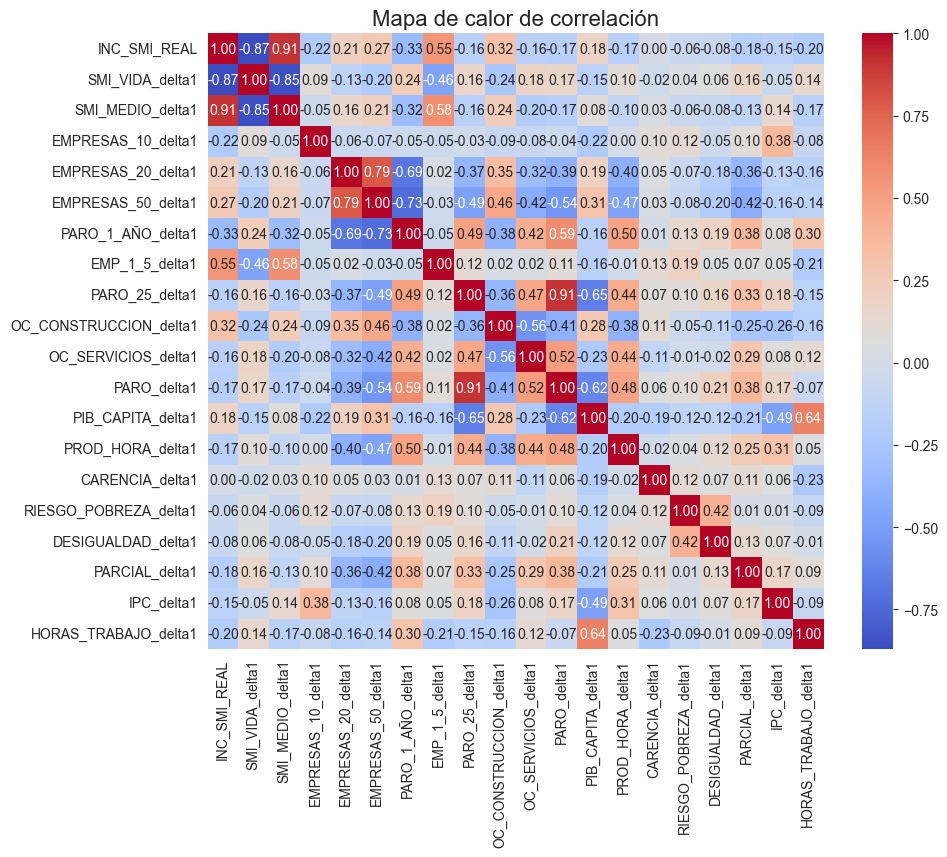

In [50]:
var_delta = ['INC_SMI_REAL']+[var for var in df_delta.columns if 'delta' in var]
p.creat_corr_matrix(df_delta, var_delta)

Aunque las correlaciones entre incrementos puede ser interesante, la única que nos interesa estudiar es la del salario mínimo contra el resto, pues es la única que podremos tocar para influir en los resultados del año que viene. Se aprecia de manera clara que la correlación de esta con las variables que no están relacionadas o construidas a partir del salario mínimo es relativamente baja.

### Selección de variables
<a id="seleccion_variables"></a>

Una vez observadas las correlaciones con las variables, procedamos a la selección de las más importantes. Como hemos mencionado, la cantidad de filas disponibles es escasa, por tanto es preciso seleccionar el conjunto más reducido posible de variables.

Para ello y dadas las correlaciones existentes utilizaremos el PCA para hacer nuestra selección de variables. Compararemos este método con la importancia de variables proporcionadas por el algoritmo random forest, que nos aportará información también en relación a las variables dependientes (que de base será la variación año contra año de todas las variables estudiadas). 

Número de componentes seleccionados: 8
Varianza explicada por estos componentes:
Componente 1: 27.70%
Componente 2: 15.12%
Componente 3: 10.30%
Componente 4: 7.34%
Componente 5: 6.87%
Componente 6: 5.26%
Componente 7: 4.26%
Componente 8: 3.92%
Varianza acumulada: 80.76%


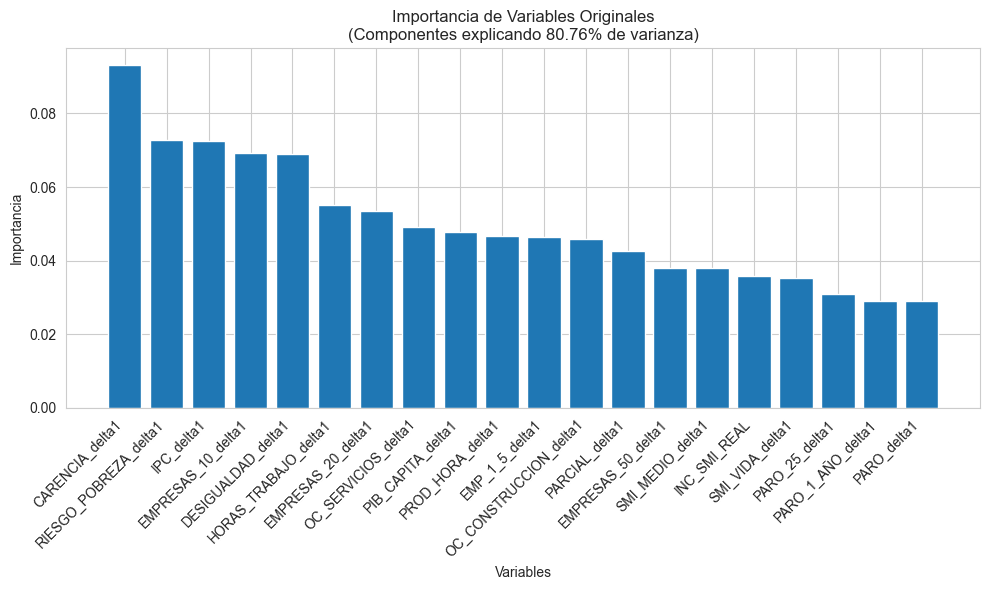

Variable  Importancia
14         CARENCIA_delta1     0.093148
15   RIESGO_POBREZA_delta1     0.072723
18              IPC_delta1     0.072462
3       EMPRESAS_10_delta1     0.069384
16      DESIGUALDAD_delta1     0.069039
19    HORAS_TRABAJO_delta1     0.055056
4       EMPRESAS_20_delta1     0.053449
10     OC_SERVICIOS_delta1     0.049254
12       PIB_CAPITA_delta1     0.047703
13        PROD_HORA_delta1     0.046652
7           EMP_1_5_delta1     0.046352
9   OC_CONSTRUCCION_delta1     0.045926
17          PARCIAL_delta1     0.042757
5       EMPRESAS_50_delta1     0.037889
2         SMI_MEDIO_delta1     0.037884
0             INC_SMI_REAL     0.035816
1          SMI_VIDA_delta1     0.035365
8           PARO_25_delta1     0.030980
6        PARO_1_AÑO_delta1     0.029129
11             PARO_delta1     0.029032

In [51]:
df_num= df[num_var].copy()
smod.obtener_importancia_variables(df_delta[var_delta].dropna(), umbral_varianza=0.8)

Observamos que CARENCIA es la variable más importante, ya que no tiene correlación prácticamente con ninguna otra variable, similar a lo que ocurre con los siguientes puestos en importancia como es la variación del IPC y del riesgo de pobreza.

Comparemos ahora el resultado con la importancia de las variables dentro del árbol de decisión.

Variable añadida para la columna:  RIESGO_POBREZA_delta1
Variable añadida para la columna:  PARCIAL_delta1


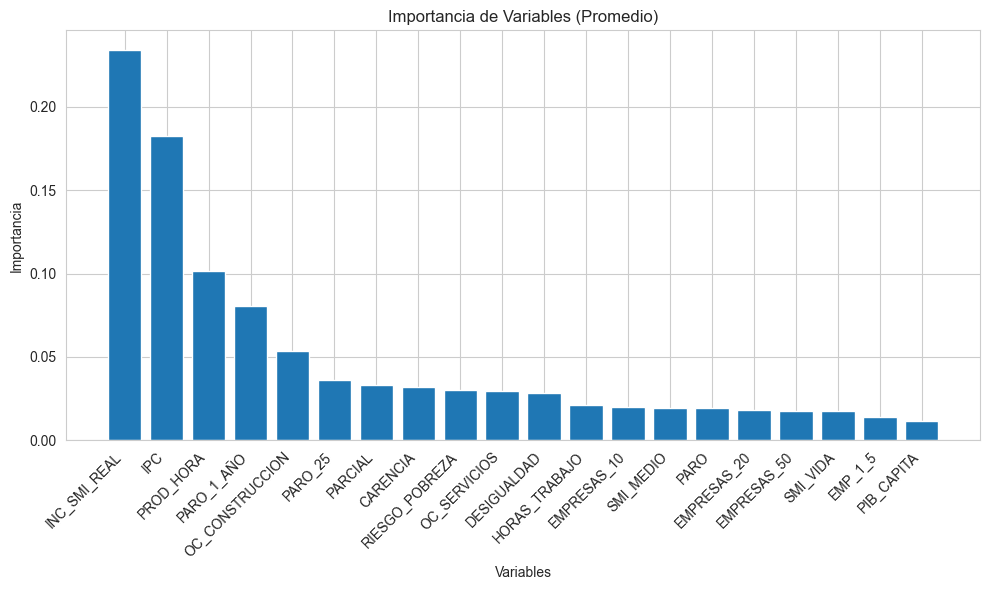

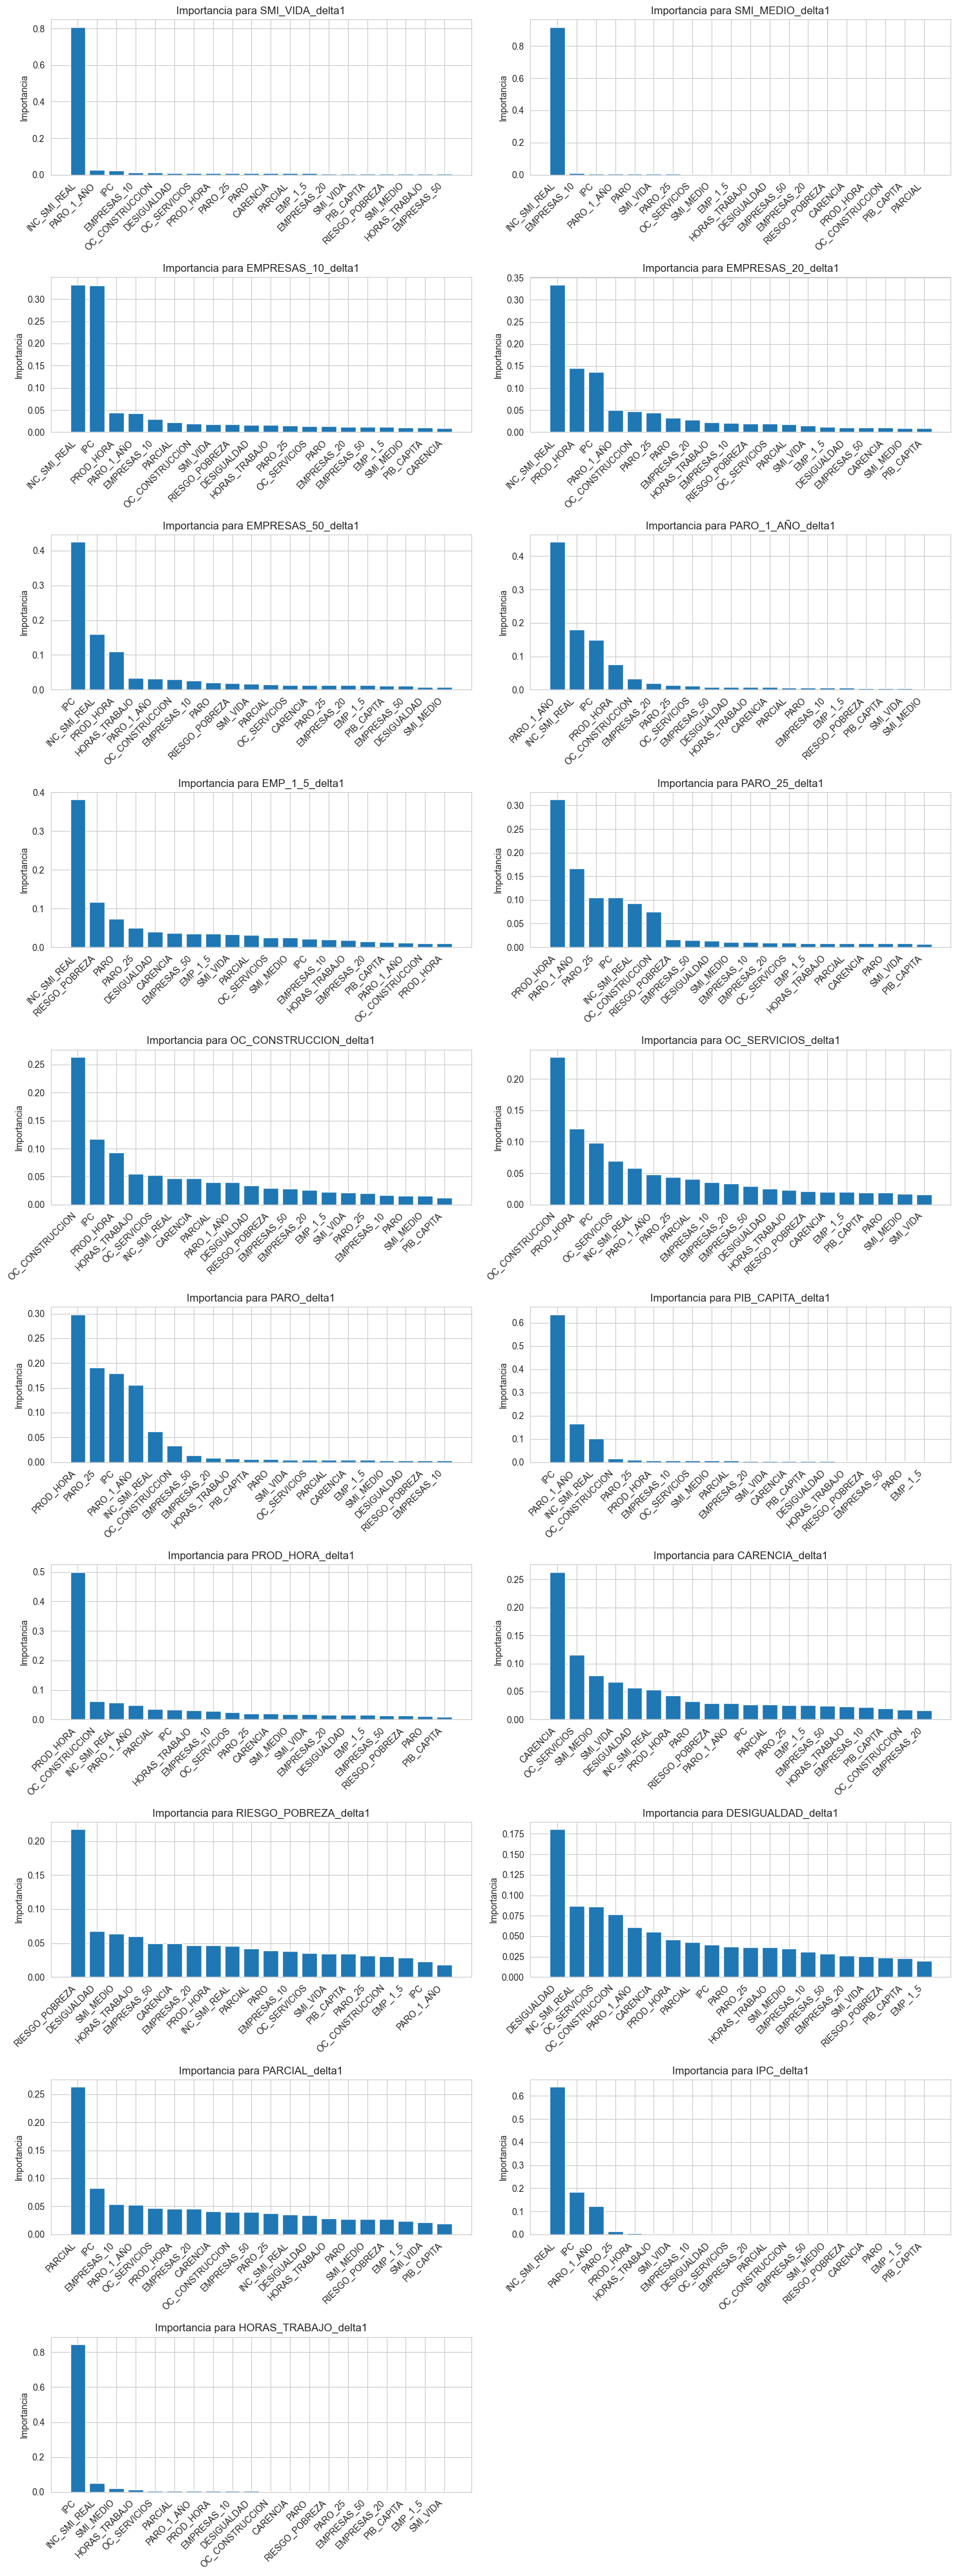

In [52]:
#Las variables X serán las seleccionadas originalmente y las y serán los incrementos de cara al año siguiente, 
# solo podemos coger hasta 2019 porque si no tendremos nulos
cond = df_delta['periodo']<=2019
X = df_delta[cond][num_var]
y = df_delta[cond][[var for var in df_delta.columns if 'delta' in var]]
df_importancia_rf, importancia_variables, variables_importantes = smod.obtener_importancia_variables_rf(X,y, mostrar_subplots=True, 
                                                                                                   umbral_importancia=0.95, num_variables=8, columnas_subplots = 2,
                                                                                                   variables_forzadas= ['INC_SMI_REAL'])

Vemos que ahora la importancia es mucho más variable y diferenciada, tanto el promedio final como el la distribución para cada una de las variables objetivo. Se observa que en varios casos la variable más importante para la predicción del incremento de una variable es la propia variable.

Dado el Random Forest nos ofrece una selección más adecuada a la variable objetivo a predecir, nos quedaremos con este modelo para escoger las variables.

La diferencia de presencia para cada variable en las diferentes predicciones nos forzará a crear un modelo con diferentes variables para cada predicción que vayamos a hacer. Para cada variable nos quedaremos con el conjunto de variables que supongan el 95% de la importancia de cada variable o las 8 más importantes, lo que llegue primero. Se añadirá la variable INC_SMI_REAL en caso de que no aparezca incluida en este conjunto de variables.

## Modelos

A continuación se hará la selección del modelo a emplear para la predicción de las características utilizadas. Estudiaremos 6 posibles modelos, que evaluaremos mediante validación cruzada para cada una de las variables que queremos predecir.

### Regresión Lineal

La regresión lineal es uno de los modelos más simples y ampliamente utilizados en el análisis de relaciones entre variables. En este trabajo, se utiliza como un modelo base para explorar la relación entre las variaciones en el salario mínimo y su impacto en variables económicas como el PIB o la carencia material. A pesar de su simplicidad, la regresión lineal permite establecer una primera aproximación a los datos y sirve como referencia para comparar el rendimiento de modelos más complejos.

La regresión lineal asume que existe una relación lineal entre la variable dependiente y una o más variables independientes. El modelo busca ajustar una recta que minimice la suma de los errores cuadráticos, proporcionando un coeficiente que indica la fuerza y dirección de esta relación. Es un modelo fácil de interpretar y útil para obtener una visión inicial de cómo los cambios en el salario mínimo pueden influir en otras variables económicas.

In [53]:
results_df_r = em.evaluacion_modelo_simple(X, y, 
                                           variables_importantes, 
                                           LinearRegression())
display(results_df_r)

Variable Objetivo   Mean R²
0          SMI_VIDA_delta1  0.717986
1         SMI_MEDIO_delta1  0.805572
2       EMPRESAS_10_delta1  0.068285
3       EMPRESAS_20_delta1  0.412015
4       EMPRESAS_50_delta1  0.472386
5        PARO_1_AÑO_delta1  0.731343
6           EMP_1_5_delta1  0.278892
7           PARO_25_delta1  0.564756
8   OC_CONSTRUCCION_delta1  0.272410
9      OC_SERVICIOS_delta1  0.239297
10             PARO_delta1  0.659321
11       PIB_CAPITA_delta1  0.383170
12        PROD_HORA_delta1  0.401261
13         CARENCIA_delta1 -0.005807
14   RIESGO_POBREZA_delta1  0.035480
15      DESIGUALDAD_delta1  0.103064
16          PARCIAL_delta1  0.165365
17              IPC_delta1  0.203873
18    HORAS_TRABAJO_delta1  0.402046

Vemos que para este modelo los resultados en términos de coeficientes R2 son relativamente bajos para la mayoría de las variables, excepto para SMI_MEDIO, pues tiene una correlación muy directa con el SMI.

### Regresión Lasso

Dado que el conjunto de datos utilizado en este trabajo es relativamente pequeño (~200 observaciones), existe el riesgo de sobreajuste, lo que podría afectar la capacidad de generalización del modelo. La regresión Ridge y Lasso son variantes de la regresión lineal que incorporan técnicas de regularización, lo que ayuda a mitigar el sobreajuste y a mejorar la estabilidad y precisión del modelo, especialmente cuando se dispone de múltiples características.

La regresión Ridge y Lasso son formas de regresión lineal que aplican penalizaciones a los coeficientes de las variables para reducir la complejidad del modelo. La regresión Ridge utiliza una penalización L2, que limita el tamaño de los coeficientes, mientras que la regresión Lasso aplica una penalización L1, que no solo reduce el tamaño de los coeficientes, sino que también puede hacer que algunos se vuelvan cero, eliminando así variables menos relevantes. Estas técnicas ayudan a mejorar la generalización del modelo y a reducir la multicolinealidad, lo que las hace especialmente útiles cuando el número de variables es elevado.

In [54]:
results_df_rl = em.evaluacion_modelo_simple(X, y, 
                                            variables_importantes, 
                                            Lasso())
display(results_df_rl[['Variable Objetivo', 'Mean R²']])

Variable Objetivo   Mean R²
0          SMI_VIDA_delta1 -0.041823
1         SMI_MEDIO_delta1 -0.052622
2       EMPRESAS_10_delta1 -0.020857
3       EMPRESAS_20_delta1 -0.036210
4       EMPRESAS_50_delta1 -0.030413
5        PARO_1_AÑO_delta1  0.349116
6           EMP_1_5_delta1 -0.022176
7           PARO_25_delta1  0.340407
8   OC_CONSTRUCCION_delta1 -0.011867
9      OC_SERVICIOS_delta1 -0.009050
10             PARO_delta1  0.461257
11       PIB_CAPITA_delta1 -0.046437
12        PROD_HORA_delta1 -0.001072
13         CARENCIA_delta1 -0.070551
14   RIESGO_POBREZA_delta1 -0.003718
15      DESIGUALDAD_delta1 -0.053224
16          PARCIAL_delta1 -0.018889
17              IPC_delta1 -0.046092
18    HORAS_TRABAJO_delta1 -0.023125

Vemos que la regesión Lasso apenas aporta mejora al resultado final, por lo que a priori el problema no es el sobreajuste.

### Árbol de decisión

Los árboles de decisión son una herramienta poderosa para modelar relaciones no lineales y complejas entre variables. En el contexto de este trabajo, se emplean para capturar interacciones no lineales entre el salario mínimo y otros factores económicos. Aunque los árboles de decisión pueden ser propensos al sobreajuste, su simplicidad y capacidad para modelar relaciones complejas los convierte en una opción válida en este análisis.

Un árbol de decisión es un modelo que divide el espacio de características en diferentes regiones basándose en preguntas binarias sobre las variables. Cada nodo del árbol representa una pregunta sobre una variable, y las ramas representan las respuestas posibles. El objetivo es segmentar los datos de manera que cada región tenga características similares en cuanto a la variable dependiente. Este modelo es fácil de interpretar y puede capturar relaciones no lineales entre las variables, lo que lo hace adecuado cuando se espera que las variables interactúen de manera compleja.

In [55]:
#Definimos los parámetros a probar en el gridsearch
param_grid_ad = {
    'max_depth': [5, 10, 15, None],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras por hoja
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error'],  # Criterios de división
}
results_df_ad, best_params_dict_ad = em.evaluacion_modelo(X,y,variables_importantes, DecisionTreeRegressor(), param_grid_ad)
# Mostrar la tabla de resultados
display(results_df_ad)


Variable Objetivo   Best R²
0          SMI_VIDA_delta1  0.704378
1         SMI_MEDIO_delta1  0.909806
2       EMPRESAS_10_delta1  0.447868
3       EMPRESAS_20_delta1  0.482855
4       EMPRESAS_50_delta1  0.568933
5        PARO_1_AÑO_delta1  0.728087
6           EMP_1_5_delta1  0.266905
7           PARO_25_delta1  0.643060
8   OC_CONSTRUCCION_delta1  0.042178
9      OC_SERVICIOS_delta1  0.089477
10             PARO_delta1  0.796417
11       PIB_CAPITA_delta1  0.829071
12        PROD_HORA_delta1  0.245204
13         CARENCIA_delta1 -0.299569
14   RIESGO_POBREZA_delta1 -0.056993
15      DESIGUALDAD_delta1 -0.155428
16          PARCIAL_delta1 -0.211729
17              IPC_delta1  0.932263
18    HORAS_TRABAJO_delta1  0.741912

Vemos que ahora obtenemos mejoras sustanciales en variables como PIB_CAPITA e IPC, pero en otros como la carencia material y el riesgo de pobreza los resultados empeoran.

### Random Forest

El modelo Random Forest se utiliza para mejorar la precisión de los árboles de decisión individuales al combinarlos en un conjunto de árboles. Este enfoque reduce el riesgo de sobreajuste y mejora la capacidad de generalización del modelo. Dado que el conjunto de datos es relativamente pequeño, Random Forest ofrece una mayor robustez y precisión en la predicción del impacto del salario mínimo sobre las variables económicas, al combinar las predicciones de múltiples árboles de decisión entrenados con diferentes subconjuntos de los datos.

Random Forest es un modelo de aprendizaje basado en el ensamblaje de múltiples árboles de decisión. Cada árbol se entrena utilizando una muestra aleatoria de los datos y un subconjunto aleatorio de características, lo que introduce variabilidad y reduce el sobreajuste. La predicción final del modelo se obtiene mediante el promedio de las predicciones de todos los árboles. Este enfoque mejora la precisión y estabilidad del modelo al aprovechar la diversidad de los árboles individuales, siendo especialmente útil cuando se tienen muchas variables y se requiere capturar relaciones complejas y no lineales.

In [56]:
# Definir el espacio de parámetros a probar en el GridSearch para Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Número de árboles en el bosque
    'max_depth': [5, 10, 15, None],   # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],    # Número mínimo de muestras por hoja
    'criterion': ['squared_error', 'absolute_error'],  # Criterios de división
    'bootstrap': [True, False]        # Si se usa o no el muestreo bootstrap
}

results_df_rf, best_params_dict_rf = em.evaluacion_modelo(X,y, variables_importantes, RandomForestRegressor(), param_grid_rf)

# Mostrar la tabla de resultados
display(results_df_rf)


Variable Objetivo   Best R²
0          SMI_VIDA_delta1  0.779235
1         SMI_MEDIO_delta1  0.921084
2       EMPRESAS_10_delta1  0.626106
3       EMPRESAS_20_delta1  0.677624
4       EMPRESAS_50_delta1  0.699365
5        PARO_1_AÑO_delta1  0.814805
6           EMP_1_5_delta1  0.386298
7           PARO_25_delta1  0.747459
8   OC_CONSTRUCCION_delta1  0.302759
9      OC_SERVICIOS_delta1  0.253227
10             PARO_delta1  0.848125
11       PIB_CAPITA_delta1  0.864205
12        PROD_HORA_delta1  0.468929
13         CARENCIA_delta1  0.056056
14   RIESGO_POBREZA_delta1  0.088656
15      DESIGUALDAD_delta1  0.026319
16          PARCIAL_delta1  0.169404
17              IPC_delta1  0.938318
18    HORAS_TRABAJO_delta1  0.808209

En los resultados se observa una clara mejoría en el resultado final, si bien es cierto que para el caso de CARENCIA, RIESGO_POBREZA y GINI las predicciones siguen sin ser especialmente mejores que usar la media.

### Gradient Boosting

El modelo de Gradient Boosting es conocido por su capacidad para capturar relaciones complejas entre las variables y por su alto rendimiento predictivo. Dado que este trabajo se enfoca en un problema de predicción con un número limitado de datos, el uso de estos modelos permite obtener resultados altamente precisos, incluso cuando las relaciones entre las variables son no lineales y complejas.

Gradient Boosting es una técnica de aprendizaje que combina múltiples modelos débiles (normalmente árboles de decisión) de manera secuencial para corregir los errores cometidos en las predicciones anteriores. Los algoritmos XGBoost y LightGBM son implementaciones avanzadas de boosting que son especialmente eficientes en términos de tiempo de computación y capacidad de manejo de grandes volúmenes de datos. Estos modelos se optimizan iterativamente, lo que mejora la predicción en cada paso, y son particularmente eficaces cuando las relaciones entre las variables son complejas y no lineales.

In [57]:
# Definir el espacio de parámetros a probar en el GridSearch para Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],        # Número de árboles
    'learning_rate': [0.01, 0.1, 0.2],     # Tasa de aprendizaje
    'max_depth': [3, 5, 10],               # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],       # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],         # Número mínimo de muestras en una hoja
    'subsample': [0.8, 1.0]                # Proporción de muestras usadas para entrenar cada árbol
}

results_df_gb, best_params_dict_gb = em.evaluacion_modelo(X,y, variables_importantes, GradientBoostingRegressor(), param_grid_gb)
# Mostrar la tabla de resultados
display(results_df_gb)

Variable Objetivo   Best R²
0          SMI_VIDA_delta1  0.770852
1         SMI_MEDIO_delta1  0.921569
2       EMPRESAS_10_delta1  0.655831
3       EMPRESAS_20_delta1  0.680635
4       EMPRESAS_50_delta1  0.703799
5        PARO_1_AÑO_delta1  0.812996
6           EMP_1_5_delta1  0.338875
7           PARO_25_delta1  0.754338
8   OC_CONSTRUCCION_delta1  0.249949
9      OC_SERVICIOS_delta1  0.274759
10             PARO_delta1  0.838500
11       PIB_CAPITA_delta1  0.865254
12        PROD_HORA_delta1  0.442303
13         CARENCIA_delta1  0.040095
14   RIESGO_POBREZA_delta1  0.096588
15      DESIGUALDAD_delta1 -0.007075
16          PARCIAL_delta1  0.152460
17              IPC_delta1  0.952963
18    HORAS_TRABAJO_delta1  0.804420

Similar al caso anterior, se observa mejoría, pero las variables que estaban a bajos valores de $R^2$ lo siguen estando

### SVM

Las Máquinas de Soporte Vectorial para regresión (SVR) son útiles cuando se tienen datos con relaciones no lineales complejas. En este trabajo, SVR se emplea debido a su capacidad para encontrar una línea de ajuste que minimice los errores de predicción mientras maximiza el margen de tolerancia para los puntos de datos. Dado que el conjunto de datos es relativamente pequeño, SVR es particularmente útil cuando se busca una solución precisa y robusta para modelar las relaciones no lineales entre el salario mínimo y los efectos económicos.

Las máquinas de soporte vectorial (SVR) son un enfoque de aprendizaje supervisado que busca encontrar el mejor hiperplano que minimice los errores de predicción dentro de un margen de tolerancia determinado. A través del uso de kernels, SVR puede manejar relaciones no lineales entre las variables. Este modelo es eficaz en escenarios con pocos datos y cuando las relaciones entre las variables no pueden ser capturadas adecuadamente por modelos lineales. SVR es especialmente adecuado cuando se busca una alta precisión en modelos que incluyen características complejas.

In [58]:
# Definir el espacio de parámetros a probar en el GridSearch para SVR
param_grid_svm = {
    'C': [0.1, 1, 2, 5, 10, 100, 200, 500],                 # Parámetro de regularización
    'kernel': ['rbf', 'linear', 'sigmoid'],     # Tipos de kernel
    'gamma': ['scale', 'auto'],              # Parámetro de kernel ('rbf', 'poly')
}

results_df_svm, best_params_dict_svm = em.evaluacion_modelo(X, y, variables_importantes, SVR(), param_grid_svm)

# Mostrar la tabla de resultados
print("\nResultados de GridSearchCV para SVR:")
display(results_df_svm)



Resultados de GridSearchCV para SVR:


Variable Objetivo   Best R²
0          SMI_VIDA_delta1 -0.443526
1         SMI_MEDIO_delta1 -0.059896
2       EMPRESAS_10_delta1 -0.572743
3       EMPRESAS_20_delta1  0.000310
4       EMPRESAS_50_delta1  0.309427
5        PARO_1_AÑO_delta1  0.831229
6           EMP_1_5_delta1  0.030032
7           PARO_25_delta1  0.611790
8   OC_CONSTRUCCION_delta1  0.248385
9      OC_SERVICIOS_delta1 -0.035127
10             PARO_delta1  0.731158
11       PIB_CAPITA_delta1 -0.113922
12        PROD_HORA_delta1 -0.307339
13         CARENCIA_delta1 -0.046094
14   RIESGO_POBREZA_delta1  0.056512
15      DESIGUALDAD_delta1  0.105005
16          PARCIAL_delta1  0.154788
17              IPC_delta1 -0.075466
18    HORAS_TRABAJO_delta1 -3.012158

Para el caso de Support Vector Machines está claro que el rendimiento en general es inferior al obtenido en los modelos previos.

### Selección de Modelo

Habiendo realizado las pruebas pertienentes para todos los modelos, vamos que no es posible elegir un modelo único con mismos parámetros para todas las variables objetivos, por lo que escogeremos el mejor modelo y los mejores parámetros para cada uno.

In [59]:
#Renombramos las columnas y combinamos todos los resultados
final_df_results = results_df_r[['Variable Objetivo']]
for model,df_res in {'Regresión Lineal': results_df_r, 'Regresión Lasso': results_df_rl, 'Árbol de decisión': results_df_ad, 
                     'Random Forest': results_df_rf, 'Gradient Boosting': results_df_gb, 'SVM': results_df_svm}.items():
    if 'Best R²' in df_res.columns:
        res = df_res[["Variable Objetivo", "Best R²"]]
        res.rename(columns = {"Best R²":f"Best R2 {model}"}, inplace = True)
    else:
        res = df_res[["Variable Objetivo", "Mean R²"]]
        res.rename(columns = {"Mean R²":f"Best R2 {model}"}, inplace = True)
    final_df_results = final_df_results.merge(res, on = ['Variable Objetivo'])
# Encontrar el mejor R² y el modelo correspondiente para cada fila
final_df_results['Mejor R2'] = final_df_results.iloc[:, 1:].max(axis=1)
final_df_results['Modelo'] = final_df_results.iloc[:, 1:].idxmax(axis=1)

# Crear la tabla final con las tres columnas deseadas
final_summary = final_df_results[['Variable Objetivo', 'Mejor R2', 'Modelo']]
final_summary['Modelo'] = final_summary['Modelo'].str.replace('Best R2 ', '')
# Mostrar el resultado
display(final_summary)


Variable Objetivo  Mejor R2             Modelo
0          SMI_VIDA_delta1  0.779235      Random Forest
1         SMI_MEDIO_delta1  0.921569  Gradient Boosting
2       EMPRESAS_10_delta1  0.655831  Gradient Boosting
3       EMPRESAS_20_delta1  0.680635  Gradient Boosting
4       EMPRESAS_50_delta1  0.703799  Gradient Boosting
5        PARO_1_AÑO_delta1  0.831229                SVM
6           EMP_1_5_delta1  0.386298      Random Forest
7           PARO_25_delta1  0.754338  Gradient Boosting
8   OC_CONSTRUCCION_delta1  0.302759      Random Forest
9      OC_SERVICIOS_delta1  0.274759  Gradient Boosting
10             PARO_delta1  0.848125      Random Forest
11       PIB_CAPITA_delta1  0.865254  Gradient Boosting
12        PROD_HORA_delta1  0.468929      Random Forest
13         CARENCIA_delta1  0.056056      Random Forest
14   RIESGO_POBREZA_delta1  0.096588  Gradient Boosting
15      DESIGUALDAD_delta1  0.105005                SVM
16          PARCIAL_delta1  0.169404      Random Forest
17              IPC_delta1  0.952963  Gradient Boosting
18    HORAS_TRABAJO_delta1  0.808209      Random Forest

Observamos que en la mayoría de los casos el mejor modelo es o bien Random Forest o bien Gradient Boosting, exceptuando el caso del índice de Gini, donde la regresión lineal es el modelo más adecuado; y los parados por más de un año, donde SVM obtiene mejores resultados. Dado que para un estudio del salario mínimo de cara a hacer predicciones para el año que viene no es preciso obtener resultados rápidamente o en tiempo real el tiempo de entrenamiento pasa a segundo plano y podemos seleccionar el mejor modelo basándonos en su capacidad predictiva. En la tabla a continuación podemos ver cuál es el mejor modelo para cada variable objetivo.

## Interpretación de variables

Dado que el objetivo de este estudio es analizar el impacto de una subida del salario mínimo sobre cada variable objetivo en esta sección nos centraremos en estudiar la importancia de este, así como estudiar cómo varía la predicción de la variable objetivo si cambiamos la variable objetivo.

In [60]:
#Creamos el diccionario con cada variable objetivo y sus mejores modelos
best_models = {}

for target_variable, best_model in zip(final_summary['Variable Objetivo'], final_summary['Modelo']):
    if best_model == "Regresión Lineal":
        model = LinearRegression()
        model.fit(X[variables_importantes[target_variable]], y[target_variable])
    elif best_model == "Regresión Lasso":
        model = Lasso()
        model.fit(X[variables_importantes[target_variable]], y[target_variable])
    elif best_model == "Árbol de decisión":
        model = DecisionTreeRegressor(**best_params_dict_ad[target_variable])
        model.fit(X[variables_importantes[target_variable]], y[target_variable])
    elif best_model == "Random Forest":
        model = RandomForestRegressor(**best_params_dict_rf[target_variable])
        model.fit(X[variables_importantes[target_variable]], y[target_variable])
    elif best_model == "Gradient Boosting":
        model = GradientBoostingRegressor(**best_params_dict_gb[target_variable])
        model.fit(X[variables_importantes[target_variable]], y[target_variable])
    elif best_model == "SVM":
        model = SVR(**best_params_dict_svm[target_variable])
        model.fit(X[variables_importantes[target_variable]], y[target_variable])
    best_models[target_variable] = model

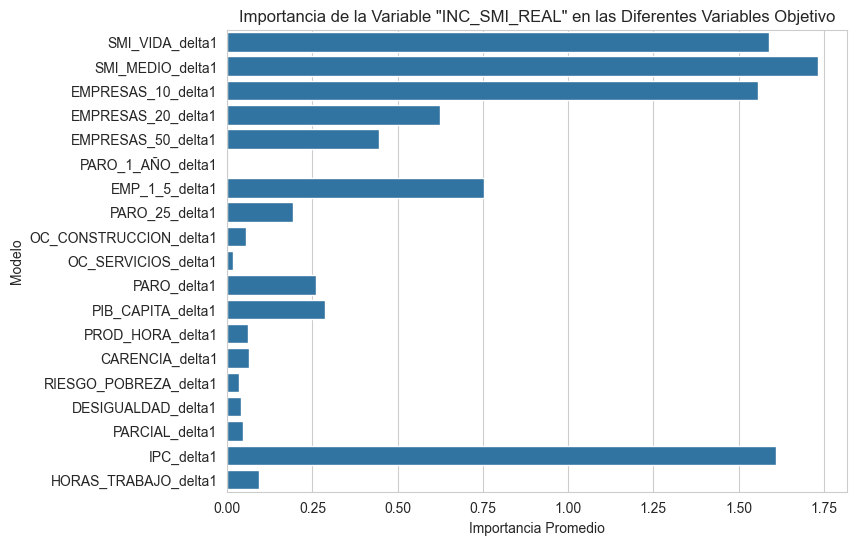

In [61]:
p.plot_importancia_univariable(best_models, X, y, variables_importantes)

CAMBIAR GINI

Contrario a lo que se esperaría y a lo observado en otros estudios, el índice GINI no se ve influenciado por las variaciones del salario mínimo, lo que resulta claramente contraintuitivo teniendo en cuenta que esperaríamos una clara contribución a reducir la desigualdad de ingresos.

Para estudiar cómo afecta el salario mínimo a cada una de los variables, realizaremos dos simulaciones básicas. Estas simulaciones consistirán en escoger unas variables de partida que no alteraremos y variaremos el salario mínimo para estudiar cómo cambia la variable objetivo según el valor del salario mínimo. Para poder apreciar el contraste utilizaremos datos de 2015 para Madrid (una de la comunidades autónomas más ricas) y Extremadura (una de las comunidades autónomas más pobres)

In [62]:
#Seleccionamos los dos sets de valores a utilizar
df_sets = df[variables]
ccaa_1 = "Madrid, Comunidad de"
ccaa_2 = "Extremadura"
periodo = 2015
df_set_1 = df_sets[(df_sets['ccaa'] == ccaa_1) & (df_sets['periodo'] == periodo)][num_var]
df_set_2 = df_sets[(df_sets['ccaa'] == ccaa_2) & (df_sets['periodo'] == periodo)][num_var]

In [63]:
#Calculamos las predicciones para cada variable objetivo en cada set
rango_incrementos = np.linspace(-0.15,0.3,200)
dfs_variables_1 = {}
dfs_variables_2 = {}
df_set_1c = df_set_1.copy()
df_set_2c = df_set_2.copy()
for target_variable, model in best_models.items():
    #Calculamos la predicción de la variable para cada caso
    var_data_1 = []
    var_data_2 = []
    for inc in rango_incrementos:
        df_set_1c['INC_SMI_REAL'] = inc
        df_set_2c['INC_SMI_REAL'] = inc
        var_data_1.append(model.predict(df_set_1c[variables_importantes[target_variable]])[0])
        var_data_2.append(model.predict(df_set_2c[variables_importantes[target_variable]])[0])
    dfs_variables_1['INC_SMI_REAL'] = list(rango_incrementos)
    dfs_variables_2['INC_SMI_REAL'] = list(rango_incrementos)
    dfs_variables_1[target_variable] = var_data_1
    dfs_variables_2[target_variable] = var_data_2

df_res_1 = pd.DataFrame(dfs_variables_1)
df_res_2 = pd.DataFrame(dfs_variables_2)

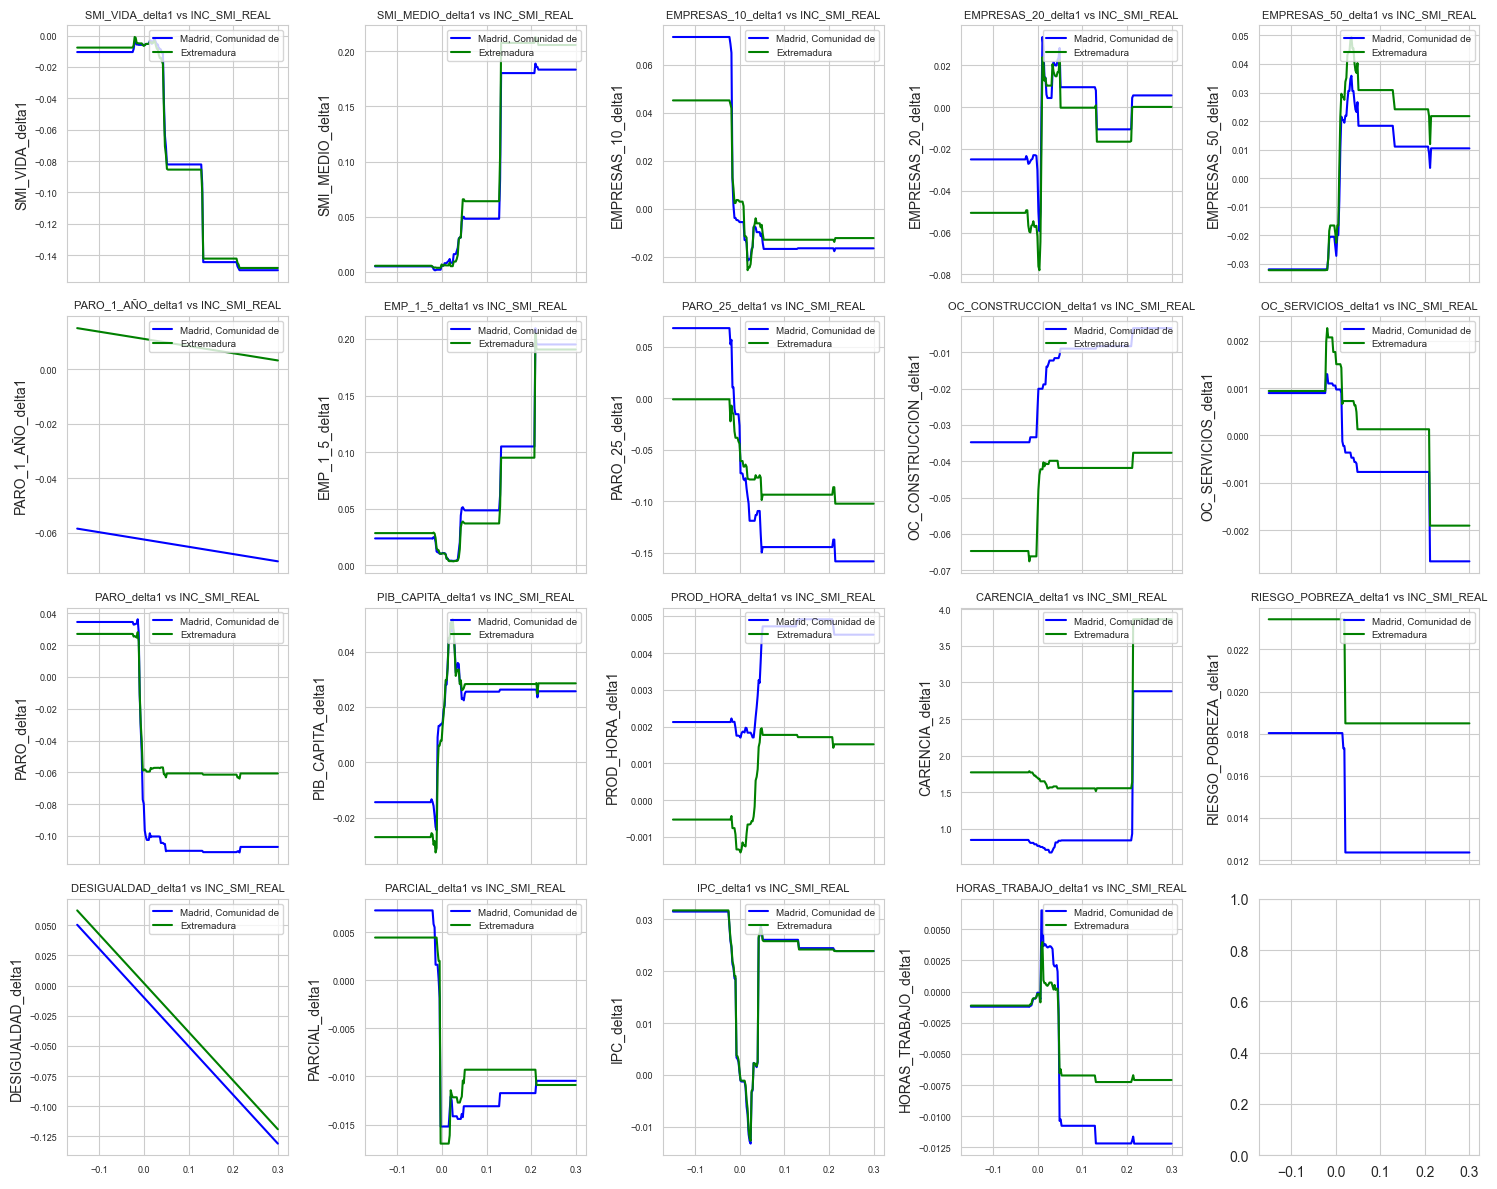

In [64]:
p.plot_simulacion(df_res_1, df_res_2, ccaa_1, ccaa_2, variables)

Observamos que el posible cambio porcentual en cada variable según la variación del salario mínimo es, si bien igual en forma (algo esperable con los modelos utilizados) distintos en sus magnitudes debido a las diferencias en el resto de variables.

La interpretación de estos resultados es algo complicada pues para muchos casos hay una alta volatilidad que se puede observar en los grandes escalones en determinadas variables. Tomemos por ejemplo el caso del IPC. Vemos que si incrementamos un 4% el salario mínimo tendríamos una deflación de algo más del 1.5%, mientras que subir el salario mínimo un 7% resultaría en una inflación de alrededor del 3% y subirlo un 30% resultaría solo en una inflación del 2.8%, algo que podría justificarse mediante la suposición de ajustes de mercado para bajos incrementos y traslado del IPC en regiones altas en las que podemos introducir el factor de despidos, si bien es cierto que probar esta causalidad no es trivial.


Esta y otras relaciones que se observan no son necesariamente inconsistentes, pues no es extraño que bajo ciertas circunstancias una ligerta diferencia produzca un cambio brusco en los resultados finales, y más en un sistema económico que depende de múltiples factores.

La escasez de datos en el rango 8-20% se hace bastante patente en el modelo, ya que se aprecian zonas planas en las variables que no utilizan modelos de regresión lineal, muestra de una mala extrapolación a esta zona. Dado esto, es más interesante observar las variaciones en el rango -2% a 5% de incremento, pues es del que más datos disponemos.

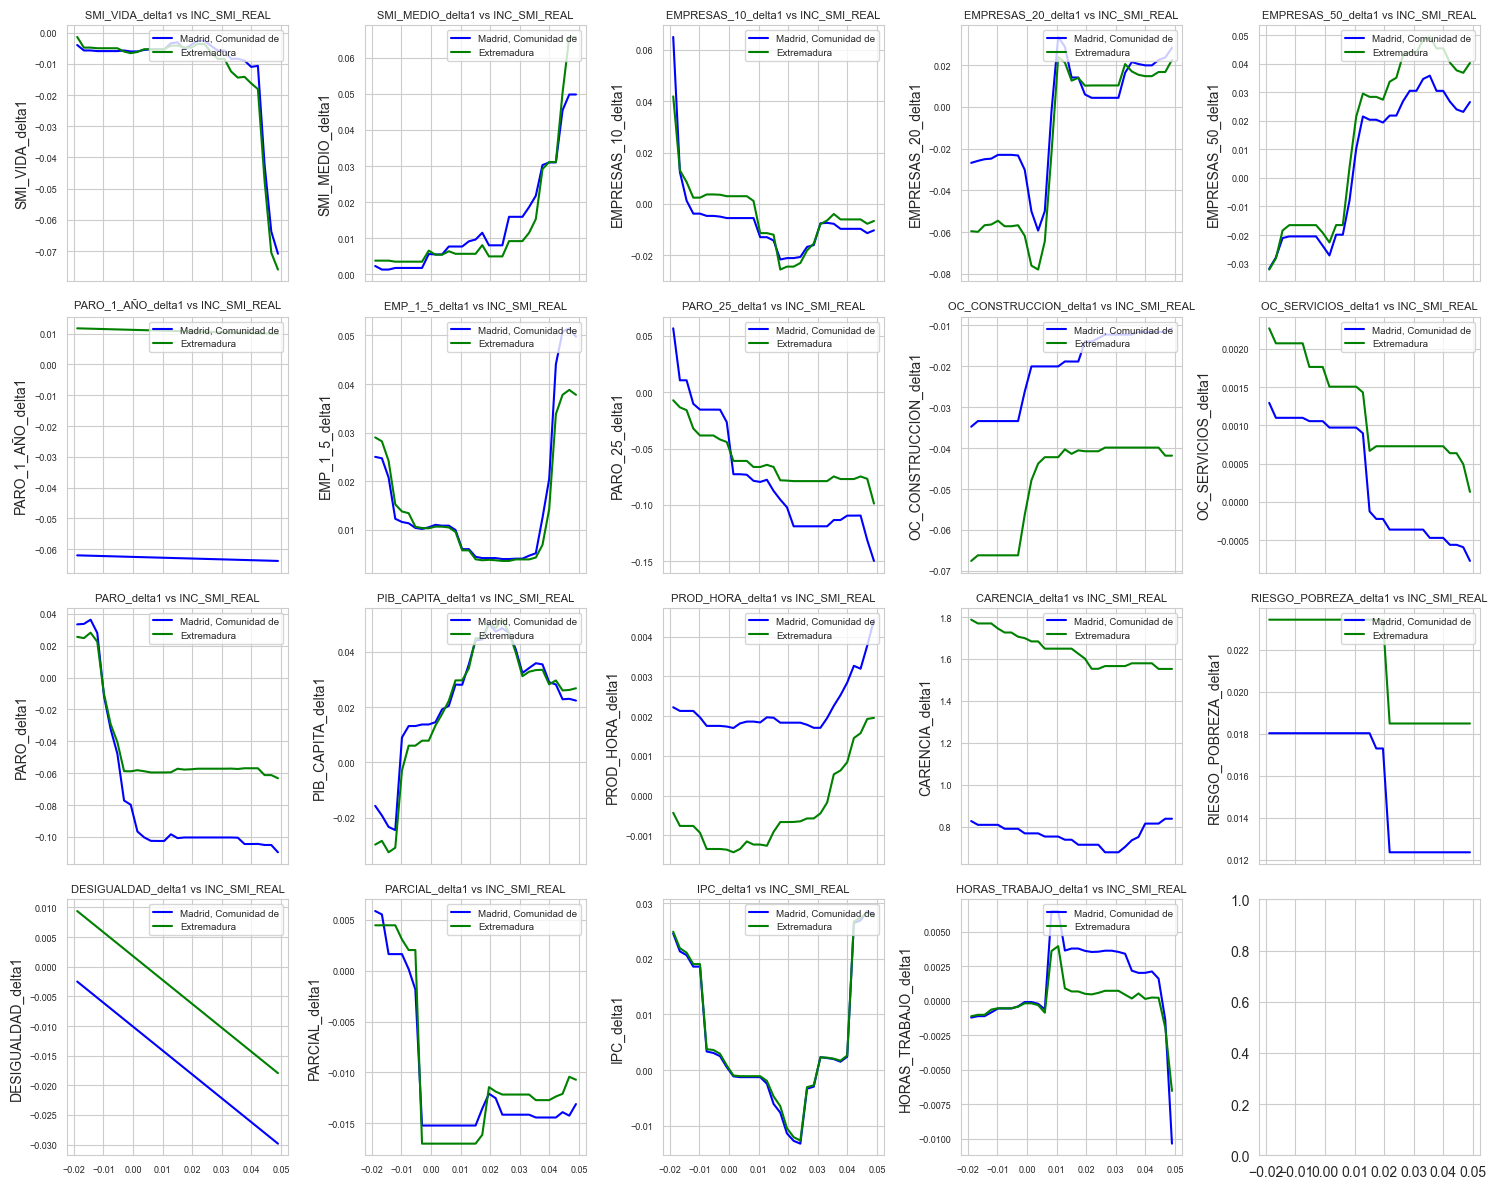

In [65]:
cond_1 = (-0.02 <= df_res_1['INC_SMI_REAL']) & (df_res_1['INC_SMI_REAL'] <= 0.05)
cond_2 = (-0.02 <= df_res_2['INC_SMI_REAL']) & (df_res_2['INC_SMI_REAL'] <= 0.05)
p.plot_simulacion(df_res_1[cond_1], df_res_2[cond_2], ccaa_1, ccaa_2, variables, n_columns=5)

En esta ventana se pueden observar relaciones, que, si bien siguen siendo volátiles, siguen una tendencia más clara y más sencilla de explicar. Por ejemplo, para el caso de todas las variables de paro y para el porcentaje de trabajadores de jornada parcial se produce un descenso mayor a mayor incremento del SMI, lo que puede explicarse como que en bajos rangos un incremento puede suponer un incentivo mayor para empezar a trabajar o incrementar el número de horas que se trabaja.

Por otro lado y atendiendo a uno de los principales objetivos de este estudio, nos interesa saber cómo llegar a un determinado nivel de salario mínimo de la manera más óptima, es decir, causando el menor perjuicio posible en determinadas variables. Como se puede observar a simple vista esta tarea no es trivial, ya lo que para algunas variables supone el mínimo (máximo) valor, en otras puede alcanzarse el máximo o quedarse en una zon intermedia.

Aunque obtener un escenario ideal donde todos los resultados mejoran no es factible, sí que es posible, en base a determinados pesos, usar una función, que, maximizándola, nos permita obtener una guía de cómo mejorar los resultados en determinadas variables. A continuación haremos una simulación a 4 años para el caso de Madrid desde 2015, y lo compararemos con la evolución real. Para ello supondremos que querremos centrarnos en incrementar lo más posible la productividad por hora y el pib a la vez que reducimos el IPC y el paro en los jóvenes menores de 25 años, utilizando la siguiente función:

$f(SMI) = 0.5\cdot \Delta PIB\_ CAPITA + 0.5\cdot \Delta PROD\_HORA - 0.5 \cdot \Delta PARO\_ 25  - 0.5\cdot \Delta IPC$


In [ ]:
def fun_opt(inc_smi, df_set_1, best_models, variables_importantes):
    x = sim.model_prediction(inc_smi, df_set_1, best_models, variables_importantes)
    return (0.5*x['PIB_CAPITA_delta1']+0.5*x['PROD_HORA_delta1']-0.5*x['PARO_25_delta1']-0.5*x['IPC_delta1'])
evol_df = sim.simulacion_smi(0, 0.1, df_set_1, fun_opt, best_models, variables_importantes, 5)

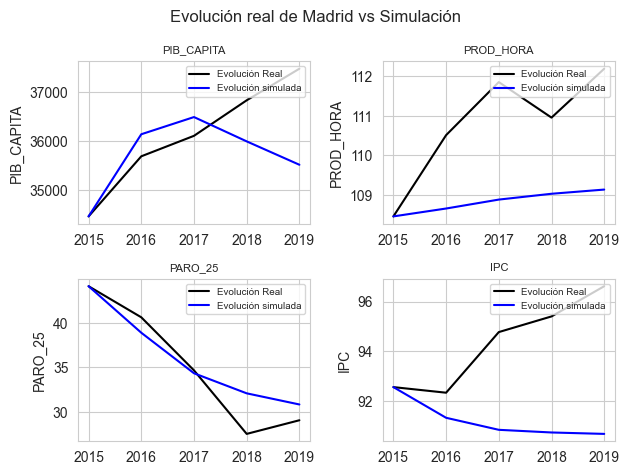

In [ ]:
#Comparamos los resultados con la evolución real de Madrid
df_madrid = df_sets[(df_sets['ccaa'] == 'Madrid, Comunidad de') & (df_sets['periodo'] >= 2015) & (df_sets['periodo'] <= 2019)]
var_plot = ['PIB_CAPITA', 'HORAS_TRABAJO', 'PARO_25', 'IPC']
p.plot_real_vs_simulacion(df_madrid, evol_df, variables, var_plot)


In [68]:
#Mostramos los incrementos reales vs simulados
print("Incrementos del SMI aplicados:")
pd.concat([df_madrid.reset_index()['INC_SMI_REAL'], 
           evol_df.rename(columns={'INC_SMI_REAL': 'INC_SMI_REAL_sim'}).reset_index()[['INC_SMI_REAL_sim']]], axis=1)

Incrementos del SMI aplicados:


INC_SMI_REAL  INC_SMI_REAL_sim
0      0.012649          0.023490
1      0.052239          0.016779
2      0.032959          0.017450
3      0.207562          0.016107
4      0.045728          0.016107

Observamos para el IPC se obtienen resultados exitosos, mientras que el paro tiene unos resultados algo peores que los reales y los de productividad real y pib per cápita son sustancialmente peores. Esto es en parte esperado dada la importancia que tiene el incremento del SMI para el IPC y la poca influencia que tiene esta misma variable en el PIB per cápita y en la productividad por hora.

Si quisiésemos obtener mejores resultados en predicciones de variables cuyo incremento está poco condicionado con el salario mínimo requeriríamos de predicciones a largo plazo, en la que tendríamos que hallar qué variables podemos alterar mediante el salario mínimo para poder crear las condiciones ideales que permitan obtener los mejores resultados para la variable que queremos tratar, lo que requeriría de un cálculo mucho más complejo que dependería además de la ventana temporal a usar (predicción a 3, 5, 10 años etc.) y en la que es posible que no exista una solución óptima.

Mirando el caso del PIB per cápita se observa que una de las variables más importantes es el valor del IPC, lo que implica que IPCs más bajos resultan en valores más bajos del PIB per cápita. Esto resulta en dificultades a largo plazo para la mejora simultánea de ambas variables, pues una mayor inflación o deflación resultaría eventualmente en unas malas condiciones para el incremento del PIB. Para casos como este, es posible hacer redeficiones de las funciones que permitan capturar estas particularidades. Por ejemplo, podemos sustituir el componente del IPC por un componente que sume un valor fijo si la inflación está entre el 0% y el 2%, de manera que demos más margen al resto de variables:

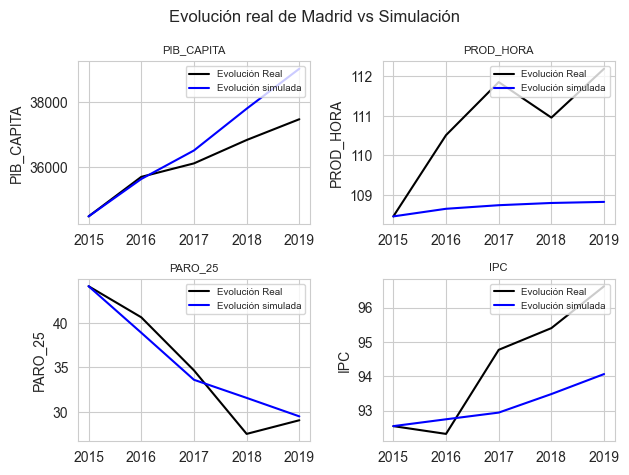

In [96]:
def fun_opt(inc_smi, df_set_1, best_models, variables_importantes):
    x = sim.model_prediction(inc_smi, df_set_1, best_models, variables_importantes)
    if 0 < x['IPC_delta1'] < 0.02:
        plus = 0.05
    else:
        plus = 0
    return (0.5*x['PIB_CAPITA_delta1']+0.5*x['PROD_HORA_delta1']-0.5*x['PARO_25_delta1']+plus)
evol_df = sim.simulacion_smi(0, 0.1, df_set_1, fun_opt, best_models, variables_importantes, 5)
df_madrid = df_sets[(df_sets['ccaa'] == 'Madrid, Comunidad de') & (df_sets['periodo'] >= 2015) & (df_sets['periodo'] <= 2019)]
var_plot = ['PIB_CAPITA', 'PROD_HORA', 'PARO_25', 'IPC']
p.plot_real_vs_simulacion(df_madrid, evol_df, variables, var_plot)

Ahora vemos que la evolución es mucho mejor para el PIB per cápita, si bien es cierto que para poder obtener mejor resultados en todas las variables (aún a corto plazo) puede ser preciso incluir reglas muy complejas en la función para capturar todos los tejemanejes entre la realización de los objetivos y la relación que tiene el modelo con las variables.

# Conclusiones

En el presente trabajo se han desarrollado modelos específicos para cada variable de interés con el fin de analizar y explicar su evolución frente a incrementos del salario mínimo. Estos modelos no pretenden justificar de manera categórica las decisiones de aumentar o reducir el salario mínimo, ni afirmar con rotundidad los efectos que estos cambios pueden tener en un sistema económico y social complejo, donde convergen múltiples factores. Sin embargo, permiten identificar patrones relevantes que deben ser considerados en el diseño de políticas públicas.

Los resultados obtenidos sugieren que los modelos son efectivos a la hora de capturar las diferencias en la evolución de las variables económicas entre comunidades autónomas con distintos niveles de desarrollo. Aunque existen similitudes en los patrones observados entre las regiones más prósperas y aquellas con economías más frágiles, también se evidencian diferencias notables en cuanto a magnitud y dinámica. Estas divergencias se deben a las condiciones iniciales de cada región y a su capacidad para absorber los efectos de un aumento del salario mínimo.

Estos hallazgos indican que una estrategia adecuada para unas comunidades podría no serlo para otras, lo que sugiere que una aplicación más granular del salario mínimo podría ser beneficiosa a nivel nacional. Así, es posible establecer unas condiciones de partida y una función que refleje la importancia y el peso de las variables a optimizar, obteniendo así una estimación orientativa del incremento del salario mínimo ideal para maximizar dicha función y lograr los mejores resultados en un horizonte de un año.

No obstante, es importante señalar que, aunque se han seleccionado variables representativas del contexto económico de la época, el análisis no logra capturar completamente todas las dinámicas subyacentes. En particular, la relación entre las variaciones del IPC y el salario mínimo parece estar influenciada por el periodo analizado (2008-2014), caracterizado por una profunda crisis económica. Durante esos años, los aumentos reales del salario mínimo fueron limitados o inexistentes, lo que podría explicar el comportamiento deflacionario inicial del IPC ante incrementos salariales moderados. Por el contrario, los aumentos más sustanciales del salario mínimo ocurrieron en años posteriores, reflejándose en un comportamiento más inflacionario del IPC para incrementos de mayor magnitud.

En conclusión, las simulaciones realizadas permiten identificar estrategias óptimas para implementar subidas del salario mínimo, maximizando los beneficios y minimizando los efectos adversos. Estas estrategias ofrecen una guía preliminar para la formulación de políticas laborales, proporcionando un marco que pondera la relevancia de las distintas variables económicas en juego. De este modo, se puede avanzar hacia un diseño de políticas más equilibrado y adaptado a las realidades socioeconómicas de cada región.